In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
%matplotlib inline 

In [2]:
DW = pd.read_csv('use-of-force-DW.csv',sep=',')

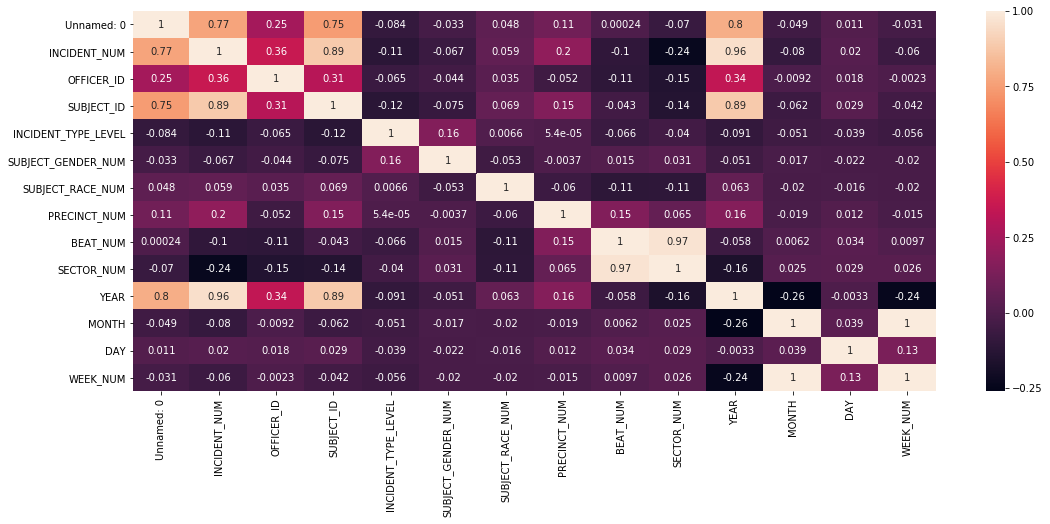

In [3]:
plt.figure(figsize=(18,7))
sns.heatmap(DW.corr(),annot=True)

In [4]:
DW.describe()

,Unnamed: 0,INCIDENT_NUM,OFFICER_ID,SUBJECT_ID,INCIDENT_TYPE_LEVEL,SUBJECT_GENDER_NUM,SUBJECT_RACE_NUM,PRECINCT_NUM,BEAT_NUM,SECTOR_NUM,YEAR,MONTH,DAY,WEEK_NUM
count,8061.000000,8061.000000,8061.000000,8061.000000,8061.000000,8061.000000,8061.000000,8061.000000,8061.000000,8061.000000,8061.000000,8061.000000,8061.000000,8061.000000
mean,4030.000000,10988.216598,1545.556383,7608.108299,1.235951,1.797792,4.699913,3.254311,26.293016,10.403052,2015.833023,6.243890,15.535914,24.918993
std,2327.154593,7880.628574,560.138654,5218.218703,0.424618,0.401672,1.537016,1.618161,14.589945,5.401193,1.356779,3.261675,9.022036,14.230956
min,0.000000,178.000000,7.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2014.000000,1.000000,1.000000,0.000000
25%,2015.000000,4034.000000,1172.000000,2888.000000,1.000000,2.000000,3.000000,2.000000,12.000000,6.000000,2015.000000,4.000000,7.000000,14.000000
50%,4030.000000,10057.000000,1651.000000,6779.000000,1.000000,2.000000,6.000000,3.000000,25.000000,10.000000,2016.000000,6.000000,16.000000,24.000000
75%,6045.000000,16258.000000,1820.000000,12226.000000,1.000000,2.000000,6.000000,5.000000,40.000000,15.000000,2017.000000,9.000000,23.000000,36.000000
max,8060.000000,31876.000000,4883.000000,17489.000000,2.000000,2.000000,6.000000,6.000000,53.000000,20.000000,2018.000000,12.000000,31.000000,52.000000


<Figure size 1296x504 with 0 Axes>

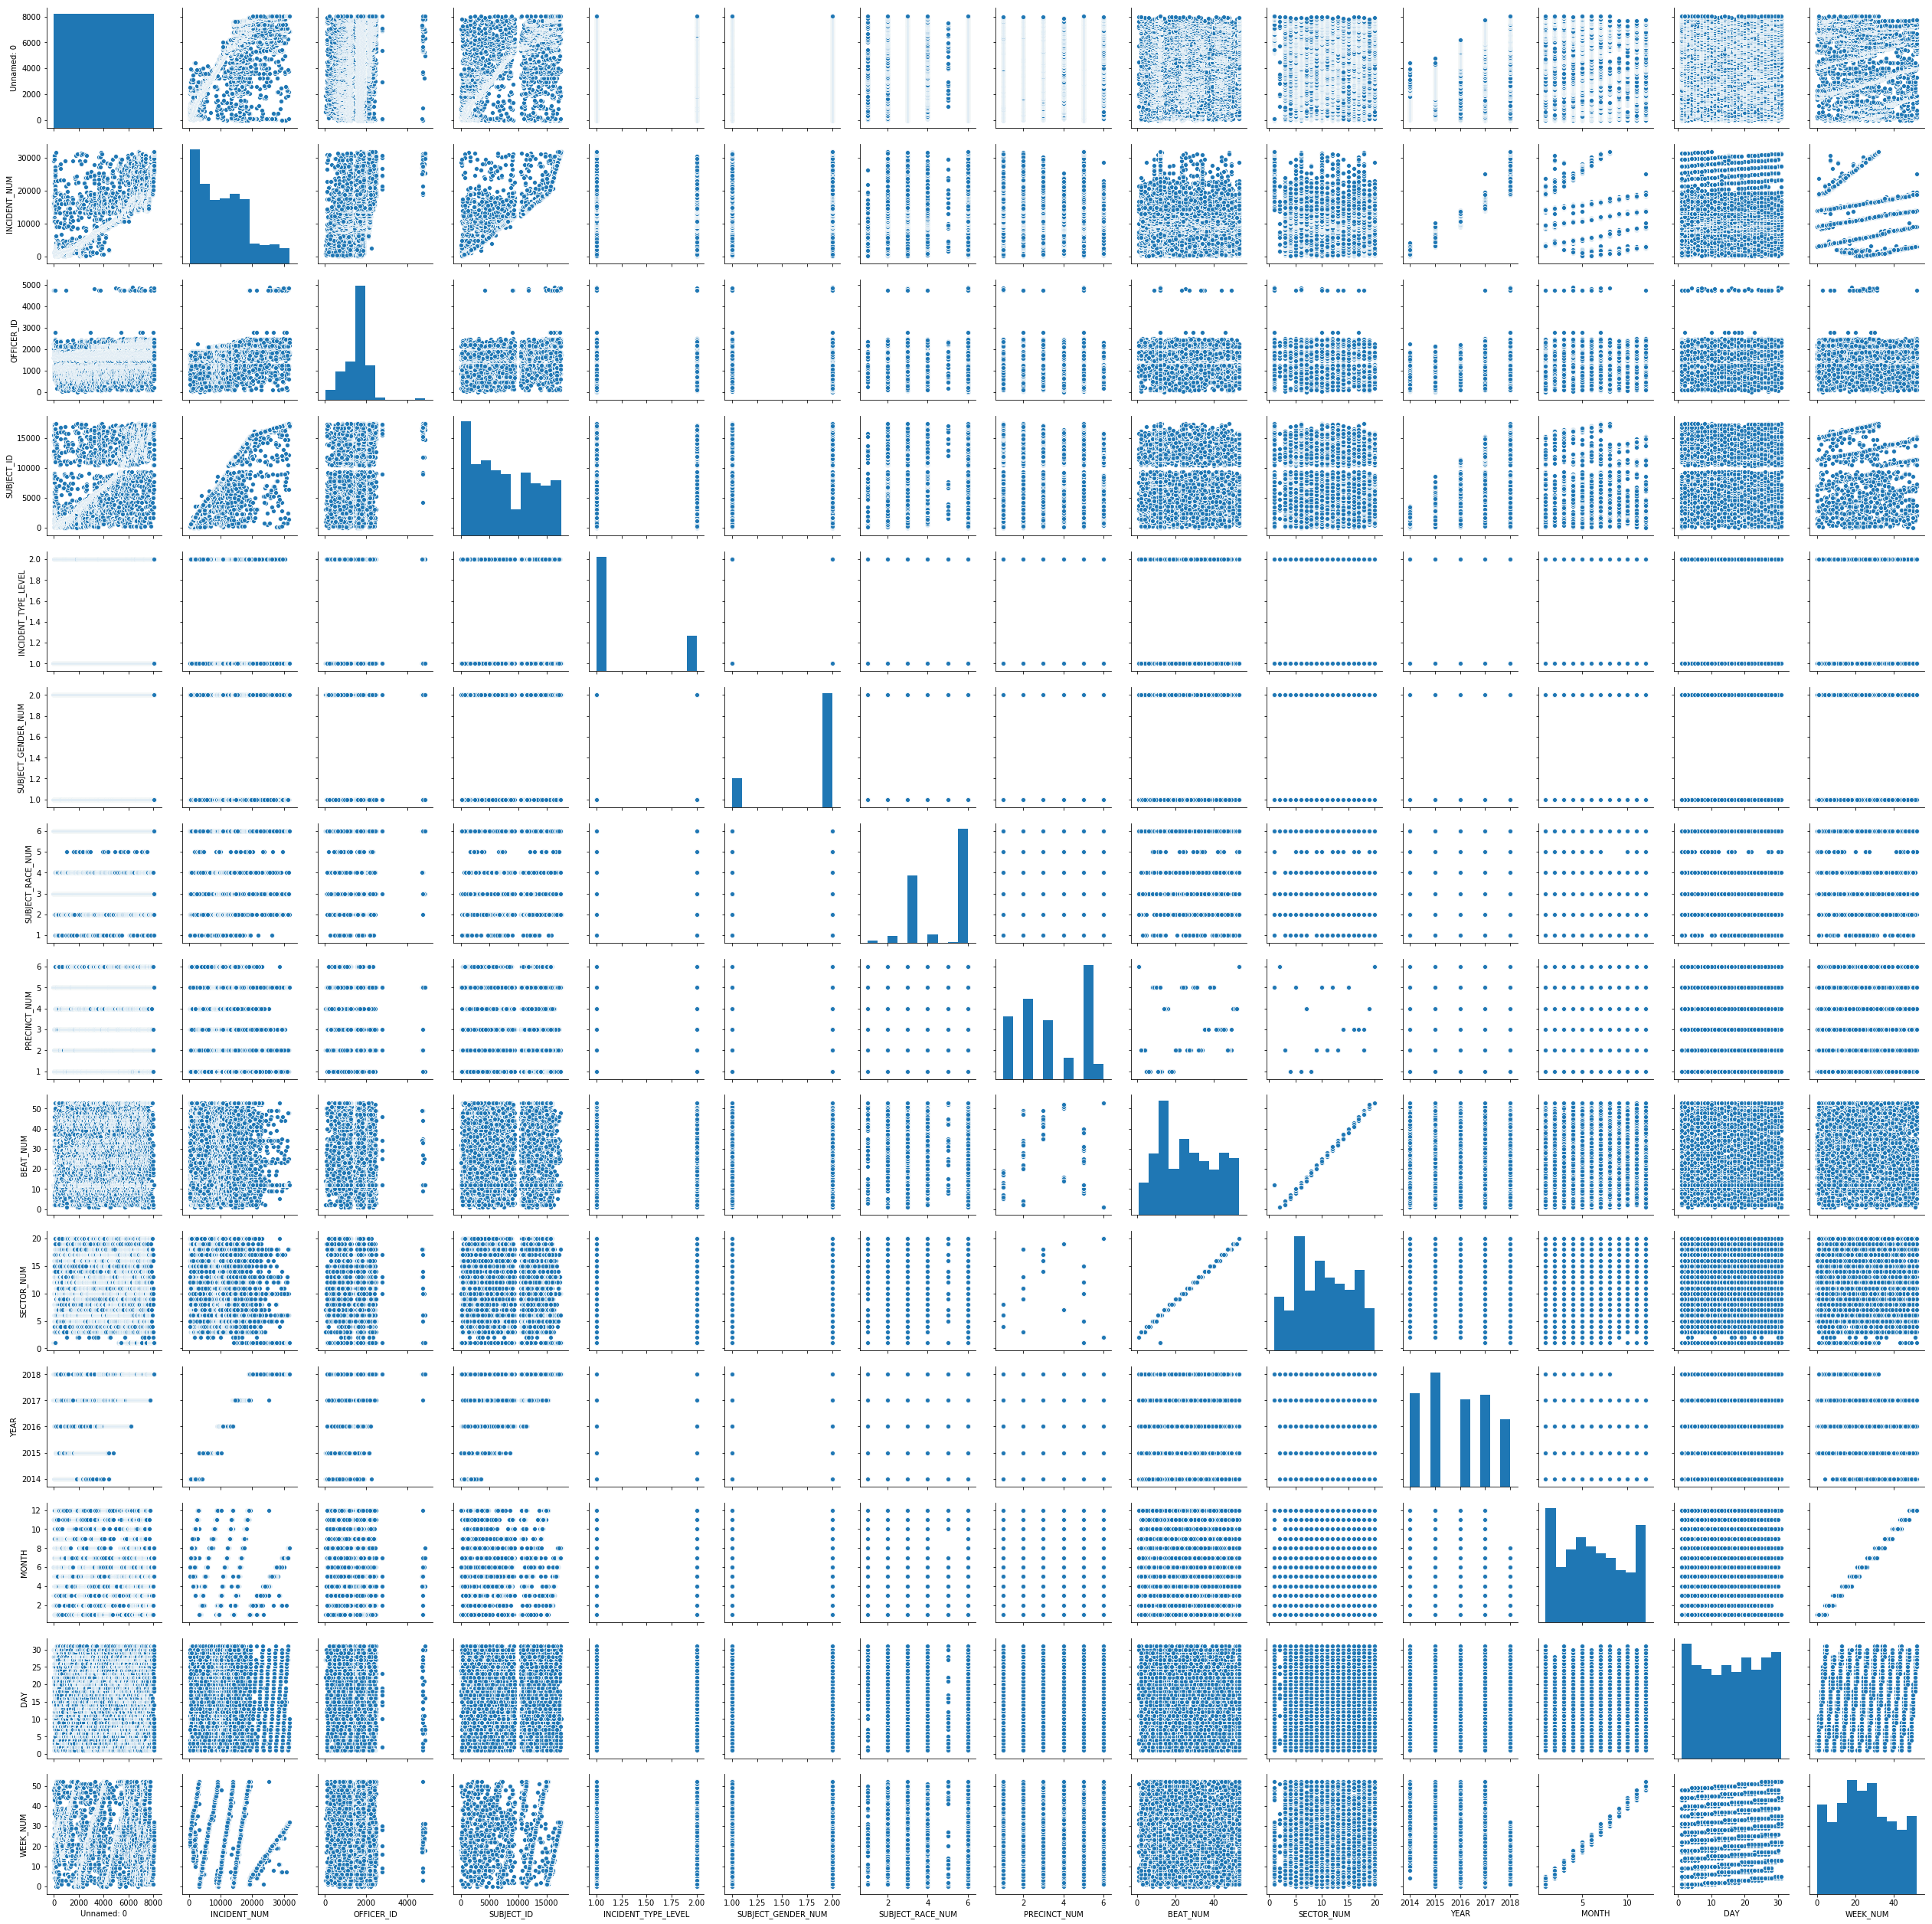

In [ ]:
# Basic correlogram
plt.figure(figsize=(18,7))
sns.pairplot(DW)

In [ ]:
DW.head(2)

,Unnamed: 0,ID,INCIDENT_NUM,INCIDENT_TYPE,OCCURED_DATE_TIME,SECTOR,OFFICER_ID,SUBJECT_ID,SUBJECT_GENDER,SUBJECT_RACE,...,BEAT_NUM,SECTOR_NUM,DATE,TIME,YEAR,MONTH,DAY,MONTH_YEAR,WEEK_NUM,WEEK_YEAR
0,0,18412-2238-14470,18412,Level 1 - Use of Force,2017-11-28T01:40:00,-,2238,14470,Female,Black or African American,...,12,1,2017-11-28,01:40:00,2017,11,28,11/2017,48,48/2017
1,1,16162-1589-12833,16162,Level 1 - Use of Force,2017-06-22T04:15:00,-,1589,12833,Male,Black or African American,...,12,1,2017-06-22,04:15:00,2017,6,22,06/2017,25,25/2017


In [ ]:
SELECAO_COLUNAS_X = ['OFFICER_ID','SUBJECT_ID', 'SUBJECT_GENDER_NUM', 'SUBJECT_RACE_NUM',
       'PRECINCT_NUM', 'BEAT_NUM', 'SECTOR_NUM','MONTH']
SELECAO_COLUNAS_Y = ['INCIDENT_TYPE_LEVEL']
DW.columns

Index(['Unnamed: 0', 'ID', 'INCIDENT_NUM', 'INCIDENT_TYPE',
       'OCCURED_DATE_TIME', 'SECTOR', 'OFFICER_ID', 'SUBJECT_ID',
       'SUBJECT_GENDER', 'SUBJECT_RACE', 'PRECINCT', 'BEAT',
       'INCIDENT_TYPE_LEVEL', 'SUBJECT_GENDER_NUM', 'SUBJECT_RACE_NUM',
       'PRECINCT_NUM', 'BEAT_NUM', 'SECTOR_NUM', 'DATE', 'TIME', 'YEAR',
       'MONTH', 'DAY', 'MONTH_YEAR', 'WEEK_NUM', 'WEEK_YEAR'],
      dtype='object')

In [ ]:
#features = X_train.columns
#features_select = []
#for f in features:
#    features_select.append(f)
#    dtc.fit(X_train[features_select], y_train) #Treinando o modelo 
#    predictions = dtc.predict(X_test[features_select]) #Realizando predições
#    print('Features: ', features_select)
#    print('\tF1-score: ', f1_score(y_test, predictions))
    #print(X[f].head())

# TREINAMENTO

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(DW[SELECAO_COLUNAS_X], DW[SELECAO_COLUNAS_Y], test_size=0.3, random_state=101)

In [ ]:
param_SVM = {'kernel':('rbf','linear','poly','sigmoid')}

param_FL = {'min_samples_leaf':[3,5,7,10], 
              'min_samples_split':[3,5,7,10], 
              'max_depth':[6,10,15,20], 
              'n_estimators':[2,5,8,10,15,20]}

In [ ]:


ROBO_FL = GridSearchCV(RandomForestClassifier(), param_FL, cv=5, scoring='f1',verbose=3)
ROBO_SVM = GridSearchCV(SVC(), param_SVM, cv=5, scoring='f1',verbose=3)


In [ ]:
#RL = RandomForestClassifier()
#NB = GaussianNB()
#clf = SVC(gamma='auto')

In [ ]:
ROBO_FL.fit(X_train,y_train)

Fitting 5 folds for each of 384 candidates, totalling 1920 fits
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=3, n_estimators=2 
[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=3, n_estimators=2, score=0.8626653102746694, total=   0.0s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=3, n_estimators=2 
[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=3, n_estimators=2, score=0.8689798032107715, total=   0.0s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=3, n_estimators=2 
[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=3, n_estimators=2, score=0.873634945397816, total=   0.0s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=3, n_estimators=2 
[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=3, n_estimators=2, score=0.8758974358974358, total=   0.0s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=3, n_estimators=2 
[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=3, n_estimators=2, score=0.87050359712230

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarnin

[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=3, n_estimators=5, score=0.8715313463514903, total=   0.0s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=3, n_estimators=5 
[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=3, n_estimators=5, score=0.8748083801737352, total=   0.0s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=3, n_estimators=5 
[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=3, n_estimators=5, score=0.8765306122448979, total=   0.0s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=3, n_estimators=5 
[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=3, n_estimators=5, score=0.877948717948718, total=   0.0s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=3, n_estimators=8 
[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=3, n_estimators=8, score=0.8720040795512494, total=   0.0s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=3, n_estimators=8 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=3, n_estimators=8, score=0.869653767820774, total=   0.0s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=3, n_estimators=8 
[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=3, n_estimators=8, score=0.8761514841351076, total=   0.0s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=3, n_estimators=8 
[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=3, n_estimators=8, score=0.8747454175152749, total=   0.0s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=3, n_estimators=8 
[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=3, n_estimators=8, score=0.8739754098360655, total=   0.0s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=3, n_estimators=10 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=3, n_estimators=10, score=0.8748083801737352, total=   0.0s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=3, n_estimators=10 
[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=3, n_estimators=10, score=0.8732106339468302, total=   0.0s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=3, n_estimators=10 
[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=3, n_estimators=10, score=0.8756371049949032, total=   0.0s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=3, n_estimators=10 
[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=3, n_estimators=10, score=0.8753180661577608, total=   0.0s

C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)



[CV] max_depth=6, min_samples_leaf=3, min_samples_split=3, n_estimators=10 
[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=3, n_estimators=10, score=0.873598369011213, total=   0.0s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=3, n_estimators=15 
[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=3, n_estimators=15, score=0.8715596330275229, total=   0.0s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=3, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=3, n_estimators=15, score=0.8749361919346605, total=   0.0s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=3, n_estimators=15 
[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=3, n_estimators=15, score=0.8751279426816786, total=   0.0s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=3, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=3, n_estimators=15, score=0.875, total=   0.0s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=3, n_estimators=15 
[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=3, n_estimators=15, score=0.8767820773930753, total=   0.0s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=3, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=3, n_estimators=20, score=0.8717424629535002, total=   0.0s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=3, n_estimators=20 
[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=3, n_estimators=20, score=0.8727644353602454, total=   0.0s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=3, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=3, n_estimators=20, score=0.8742331288343558, total=   0.0s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=3, n_estimators=20 
[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=3, n_estimators=20, score=0.8762098828323994, total=   0.0s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=3, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=3, n_estimators=20, score=0.8764044943820225, total=   0.0s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=5, n_estimators=2 
[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=5, n_estimators=2, score=0.8629856850715747, total=   0.0s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=5, n_estimators=2 
[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=5, n_estimators=2, score=0.8592514496573537, total=   0.0s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=5, n_estimators=2 
[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=5, n_estimators=2, score=0.8693441789527198, total=   0.0s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=5, n_estimators=2 
[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=5, n_estimators=2, score=0.8683127572016461, total=   0.0s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=5, n_estimators=2 
[CV]  max_depth=6, min_samples_leaf=3, min_s

C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV] max_depth=6, min_samples_leaf=3, min_samples_split=5, n_estimators=5 
[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=5, n_estimators=5, score=0.8730808597748209, total=   0.0s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=5, n_estimators=5 
[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=5, n_estimators=5, score=0.8737864077669902, total=   0.0s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=5, n_estimators=5 
[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=5, n_estimators=5, score=0.8757637474541752, total=   0.0s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=5, n_estimators=5 
[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=5, n_estimators=5, score=0.873469387755102, total=   0.0s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=5, n_estimators=8 
[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=5, n_estimators=8, score=0.8718209562563581, total=   0.0s


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV] max_depth=6, min_samples_leaf=3, min_samples_split=5, n_estimators=8 
[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=5, n_estimators=8, score=0.8731381612737543, total=   0.0s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=5, n_estimators=8 
[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=5, n_estimators=8, score=0.8755760368663597, total=   0.0s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=5, n_estimators=8 
[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=5, n_estimators=8, score=0.8771035186129525, total=   0.0s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=5, n_estimators=8 
[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=5, n_estimators=8, score=0.8755713560182833, total=   0.0s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=5, n_estimators=10 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=5, n_estimators=10, score=0.8746177370030581, total=   0.0s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=5, n_estimators=10 
[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=5, n_estimators=10, score=0.8715596330275229, total=   0.0s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=5, n_estimators=10 
[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=5, n_estimators=10, score=0.8733982573039467, total=   0.0s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=5, n_estimators=10 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=5, n_estimators=10, score=0.8763358778625955, total=   0.0s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=5, n_estimators=10 
[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=5, n_estimators=10, score=0.8755102040816326, total=   0.0s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=5, n_estimators=15 
[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=5, n_estimators=15, score=0.8715596330275229, total=   0.0s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=5, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=5, n_estimators=15, score=0.8721344880285277, total=   0.0s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=5, n_estimators=15 
[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=5, n_estimators=15, score=0.8751279426816786, total=   0.0s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=5, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=5, n_estimators=15, score=0.8767820773930753, total=   0.0s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=5, n_estimators=15 
[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=5, n_estimators=15, score=0.8750637429882712, total=   0.0s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=5, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=5, n_estimators=20, score=0.8720040795512494, total=   0.0s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=5, n_estimators=20 
[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=5, n_estimators=20, score=0.8727644353602454, total=   0.0s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=5, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=5, n_estimators=20, score=0.8768523249872253, total=   0.0s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=5, n_estimators=20 
[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=5, n_estimators=20, score=0.8751269035532996, total=   0.0s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=5, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=5, n_estimators=20, score=0.8765306122448979, total=   0.0s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=7, n_estimators=2 
[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=7, n_estimators=2, score=0.8696548171045851, total=   0.0s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=7, n_estimators=2 
[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=7, n_estimators=2, score=0.8723186925434117, total=   0.0s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=7, n_estimators=2 
[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=7, n_estimators=2, score=0.8705518308406396, total=   0.0s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=7, n_estimators=2 
[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=7, n_estimators=2, score=0.8728414442700155, total=   0.0s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=7, n_estimators=2 
[CV]  max_depth=6, min_samples_leaf=3, min_s

C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=7, n_estimators=5, score=0.8755102040816327, total=   0.0s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=7, n_estimators=5 
[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=7, n_estimators=5, score=0.8768675940236992, total=   0.0s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=7, n_estimators=5 
[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=7, n_estimators=5, score=0.8755102040816326, total=   0.0s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=7, n_estimators=5 
[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=7, n_estimators=5, score=0.873411286222674, total=   0.0s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=7, n_estimators=8 
[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=7, n_estimators=8, score=0.8740438551759305, total=   0.0s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=7, n_estimators=8 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=7, n_estimators=8, score=0.8710337768679631, total=   0.0s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=7, n_estimators=8 
[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=7, n_estimators=8, score=0.8750637429882712, total=   0.0s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=7, n_estimators=8 
[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=7, n_estimators=8, score=0.8756371049949031, total=   0.0s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=7, n_estimators=8 
[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=7, n_estimators=8, score=0.8746803069053708, total=   0.0s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=7, n_estimators=10 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=7, n_estimators=10, score=0.8704557091653866, total=   0.0s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=7, n_estimators=10 
[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=7, n_estimators=10, score=0.873469387755102, total=   0.0s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=7, n_estimators=10 
[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=7, n_estimators=10, score=0.8761514841351076, total=   0.0s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=7, n_estimators=10 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=7, n_estimators=10, score=0.8754448398576512, total=   0.0s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=7, n_estimators=10 
[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=7, n_estimators=10, score=0.8760836308006119, total=   0.0s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=7, n_estimators=15 
[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=7, n_estimators=15, score=0.8757033248081841, total=   0.0s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=7, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=7, n_estimators=15, score=0.8741721854304636, total=   0.0s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=7, n_estimators=15 
[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=7, n_estimators=15, score=0.8751910341314315, total=   0.0s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=7, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=7, n_estimators=15, score=0.8756976154236428, total=   0.0s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=7, n_estimators=15 
[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=7, n_estimators=15, score=0.8752535496957404, total=   0.0s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=7, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=7, n_estimators=20, score=0.8726342710997443, total=   0.0s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=7, n_estimators=20 
[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=7, n_estimators=20, score=0.8720573183213921, total=   0.0s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=7, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=7, n_estimators=20, score=0.8753830439223698, total=   0.0s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=7, n_estimators=20 
[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=7, n_estimators=20, score=0.8753180661577608, total=   0.0s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=7, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=7, n_estimators=20, score=0.8779989790709545, total=   0.0s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=10, n_estimators=2 
[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=10, n_estimators=2, score=0.8693856479091377, total=   0.0s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=10, n_estimators=2 
[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=10, n_estimators=2, score=0.8700155359917142, total=   0.0s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=10, n_estimators=2 
[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=10, n_estimators=2, score=0.8727644353602454, total=   0.0s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=10, n_estimators=2 
[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=10, n_estimators=2, score=0.8707204905467553, total=   0.0s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=10, n_estimators=2 
[CV]  max_depth=6, min_samples_leaf

C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=10, n_estimators=5, score=0.8734567901234568, total=   0.0s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=10, n_estimators=5 
[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=10, n_estimators=5, score=0.8712468193384223, total=   0.0s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=10, n_estimators=5 
[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=10, n_estimators=5, score=0.8748728382502543, total=   0.0s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=10, n_estimators=5 
[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=10, n_estimators=5, score=0.8732251521298173, total=   0.0s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=10, n_estimators=8 
[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=10, n_estimators=8, score=0.8703229113275244, total=   0.0s


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV] max_depth=6, min_samples_leaf=3, min_samples_split=10, n_estimators=8 
[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=10, n_estimators=8, score=0.8707692307692309, total=   0.0s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=10, n_estimators=8 
[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=10, n_estimators=8, score=0.8737864077669902, total=   0.0s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=10, n_estimators=8 
[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=10, n_estimators=8, score=0.873598369011213, total=   0.0s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=10, n_estimators=8 
[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=10, n_estimators=8, score=0.8744897959183673, total=   0.0s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=10, n_estimators=10 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=10, n_estimators=10, score=0.8723186925434117, total=   0.0s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=10, n_estimators=10 
[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=10, n_estimators=10, score=0.8746177370030581, total=   0.0s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=10, n_estimators=10 
[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=10, n_estimators=10, score=0.8753830439223698, total=   0.0s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=10, n_estimators=10 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=10, n_estimators=10, score=0.8764616166751398, total=   0.0s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=10, n_estimators=10 
[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=10, n_estimators=10, score=0.8773006134969324, total=   0.0s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=10, n_estimators=15 
[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=10, n_estimators=15, score=0.8727087576374746, total=   0.0s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=10, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=10, n_estimators=15, score=0.8733401430030645, total=   0.0s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=10, n_estimators=15 
[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=10, n_estimators=15, score=0.8776978417266186, total=   0.0s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=10, n_estimators=15 
[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=10, n_estimators=15, score=0.8748728382502543, total=   0.0s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=10, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=10, n_estimators=15, score=0.8765306122448979, total=   0.0s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=10, n_estimators=20 
[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=10, n_estimators=20, score=0.8720573183213921, total=   0.0s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=10, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=10, n_estimators=20, score=0.8727644353602454, total=   0.0s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=10, n_estimators=20 
[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=10, n_estimators=20, score=0.8760245901639345, total=   0.0s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=10, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=10, n_estimators=20, score=0.8773536895674301, total=   0.0s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=10, n_estimators=20 
[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=10, n_estimators=20, score=0.8728943338437979, total=   0.0s
[CV] max_depth=6, min_samples_leaf=5, min_samples_split=3, n_estimators=2 
[CV]  max_depth=6, min_samples_leaf=5, min_samples_split=3, n_estimators=2, score=0.8682726806765761, total=   0.0s
[CV] max_depth=6, min_samples_leaf=5, min_samples_split=3, n_estimators=2 
[CV]  max_depth=6, min_samples_leaf=5, min_samples_split=3, n_estimators=2, score=0.8695203713254255, total=   0.0s
[CV] max_depth=6, min_samples_leaf=5, min_samples_split=3, n_estimators=2 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV]  max_depth=6, min_samples_leaf=5, min_samples_split=3, n_estimators=2, score=0.8697001034126164, total=   0.0s
[CV] max_depth=6, min_samples_leaf=5, min_samples_split=3, n_estimators=2 
[CV]  max_depth=6, min_samples_leaf=5, min_samples_split=3, n_estimators=2, score=0.8718734047983665, total=   0.0s
[CV] max_depth=6, min_samples_leaf=5, min_samples_split=3, n_estimators=2 
[CV]  max_depth=6, min_samples_leaf=5, min_samples_split=3, n_estimators=2, score=0.8749361919346604, total=   0.0s
[CV] max_depth=6, min_samples_leaf=5, min_samples_split=3, n_estimators=5 
[CV]  max_depth=6, min_samples_leaf=5, min_samples_split=3, n_estimators=5, score=0.8742331288343558, total=   0.0s
[CV] max_depth=6, min_samples_leaf=5, min_samples_split=3, n_estimators=5 
[CV]  max_depth=6, min_samples_leaf=5, min_samples_split=3, n_estimators=5, score=0.871611253196931, total=   0.0s
[CV] max_depth=6, min_samples_leaf=5, min_samples_split=3, n_estimators=5 
[CV]  max_depth=6, min_samples_leaf=5, min_sam

C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV]  max_depth=6, min_samples_leaf=5, min_samples_split=3, n_estimators=5, score=0.8728943338437979, total=   0.0s
[CV] max_depth=6, min_samples_leaf=5, min_samples_split=3, n_estimators=5 
[CV]  max_depth=6, min_samples_leaf=5, min_samples_split=3, n_estimators=5, score=0.8767263427109974, total=   0.0s
[CV] max_depth=6, min_samples_leaf=5, min_samples_split=3, n_estimators=8 
[CV]  max_depth=6, min_samples_leaf=5, min_samples_split=3, n_estimators=8, score=0.870852475752935, total=   0.0s
[CV] max_depth=6, min_samples_leaf=5, min_samples_split=3, n_estimators=8 
[CV]  max_depth=6, min_samples_leaf=5, min_samples_split=3, n_estimators=8, score=0.8707692307692309, total=   0.0s
[CV] max_depth=6, min_samples_leaf=5, min_samples_split=3, n_estimators=8 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=5, min_samples_split=3, n_estimators=8, score=0.8757033248081841, total=   0.0s
[CV] max_depth=6, min_samples_leaf=5, min_samples_split=3, n_estimators=8 
[CV]  max_depth=6, min_samples_leaf=5, min_samples_split=3, n_estimators=8, score=0.8728943338437979, total=   0.0s
[CV] max_depth=6, min_samples_leaf=5, min_samples_split=3, n_estimators=8 
[CV]  max_depth=6, min_samples_leaf=5, min_samples_split=3, n_estimators=8, score=0.8776758409785932, total=   0.0s
[CV] max_depth=6, min_samples_leaf=5, min_samples_split=3, n_estimators=10 
[CV]  max_depth=6, min_samples_leaf=5, min_samples_split=3, n_estimators=10, score=0.8723731419784726, total=   0.0s


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV] max_depth=6, min_samples_leaf=5, min_samples_split=3, n_estimators=10 
[CV]  max_depth=6, min_samples_leaf=5, min_samples_split=3, n_estimators=10, score=0.8732106339468302, total=   0.0s
[CV] max_depth=6, min_samples_leaf=5, min_samples_split=3, n_estimators=10 
[CV]  max_depth=6, min_samples_leaf=5, min_samples_split=3, n_estimators=10, score=0.8763468445356593, total=   0.0s
[CV] max_depth=6, min_samples_leaf=5, min_samples_split=3, n_estimators=10 
[CV]  max_depth=6, min_samples_leaf=5, min_samples_split=3, n_estimators=10, score=0.8711156393275599, total=   0.0s
[CV] max_depth=6, min_samples_leaf=5, min_samples_split=3, n_estimators=10 
[CV]  max_depth=6, min_samples_leaf=5, min_samples_split=3, n_estimators=10, score=0.8773536895674301, total=   0.0s
[CV] max_depth=6, min_samples_leaf=5, min_samples_split=3, n_estimators=15 
[CV]  max_depth=6, min_samples_leaf=5, min_samples_split=3, n_estimators=15, score=0.8720040795512494, total=   0.0s
[CV] max_depth=6, min_samples_leaf=

C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV]  max_depth=6, min_samples_leaf=5, min_samples_split=3, n_estimators=15, score=0.8746803069053708, total=   0.0s
[CV] max_depth=6, min_samples_leaf=5, min_samples_split=3, n_estimators=15 
[CV]  max_depth=6, min_samples_leaf=5, min_samples_split=3, n_estimators=15, score=0.8763358778625955, total=   0.0s
[CV] max_depth=6, min_samples_leaf=5, min_samples_split=3, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=5, min_samples_split=3, n_estimators=15, score=0.8768523249872253, total=   0.0s
[CV] max_depth=6, min_samples_leaf=5, min_samples_split=3, n_estimators=20 
[CV]  max_depth=6, min_samples_leaf=5, min_samples_split=3, n_estimators=20, score=0.8738555442522888, total=   0.0s
[CV] max_depth=6, min_samples_leaf=5, min_samples_split=3, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=5, min_samples_split=3, n_estimators=20, score=0.872579001019368, total=   0.0s
[CV] max_depth=6, min_samples_leaf=5, min_samples_split=3, n_estimators=20 
[CV]  max_depth=6, min_samples_leaf=5, min_samples_split=3, n_estimators=20, score=0.8767263427109975, total=   0.0s
[CV] max_depth=6, min_samples_leaf=5, min_samples_split=3, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=5, min_samples_split=3, n_estimators=20, score=0.8744280630401627, total=   0.0s
[CV] max_depth=6, min_samples_leaf=5, min_samples_split=3, n_estimators=20 
[CV]  max_depth=6, min_samples_leaf=5, min_samples_split=3, n_estimators=20, score=0.8776758409785932, total=   0.0s
[CV] max_depth=6, min_samples_leaf=5, min_samples_split=5, n_estimators=2 
[CV]  max_depth=6, min_samples_leaf=5, min_samples_split=5, n_estimators=2, score=0.8655332302936631, total=   0.0s
[CV] max_depth=6, min_samples_leaf=5, min_samples_split=5, n_estimators=2 
[CV]  max_depth=6, min_samples_leaf=5, min_samples_split=5, n_estimators=2, score=0.8735868448098664, total=   0.0s
[CV] max_depth=6, min_samples_leaf=5, min_samples_split=5, n_estimators=2 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV]  max_depth=6, min_samples_leaf=5, min_samples_split=5, n_estimators=2, score=0.8744186046511627, total=   0.0s
[CV] max_depth=6, min_samples_leaf=5, min_samples_split=5, n_estimators=2 
[CV]  max_depth=6, min_samples_leaf=5, min_samples_split=5, n_estimators=2, score=0.8705035971223022, total=   0.0s
[CV] max_depth=6, min_samples_leaf=5, min_samples_split=5, n_estimators=2 
[CV]  max_depth=6, min_samples_leaf=5, min_samples_split=5, n_estimators=2, score=0.8709016393442625, total=   0.0s
[CV] max_depth=6, min_samples_leaf=5, min_samples_split=5, n_estimators=5 
[CV]  max_depth=6, min_samples_leaf=5, min_samples_split=5, n_estimators=5, score=0.869653767820774, total=   0.0s
[CV] max_depth=6, min_samples_leaf=5, min_samples_split=5, n_estimators=5 
[CV]  max_depth=6, min_samples_leaf=5, min_samples_split=5, n_estimators=5, score=0.8712972420837589, total=   0.0s
[CV] max_depth=6, min_samples_leaf=5, min_samples_split=5, n_estimators=5 
[CV]  max_depth=6, min_samples_leaf=5, min_sam

C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV]  max_depth=6, min_samples_leaf=5, min_samples_split=5, n_estimators=5, score=0.8744897959183673, total=   0.0s
[CV] max_depth=6, min_samples_leaf=5, min_samples_split=5, n_estimators=5 
[CV]  max_depth=6, min_samples_leaf=5, min_samples_split=5, n_estimators=5, score=0.8746177370030581, total=   0.0s
[CV] max_depth=6, min_samples_leaf=5, min_samples_split=5, n_estimators=8 
[CV]  max_depth=6, min_samples_leaf=5, min_samples_split=5, n_estimators=8, score=0.8727644353602454, total=   0.0s
[CV] max_depth=6, min_samples_leaf=5, min_samples_split=5, n_estimators=8 
[CV]  max_depth=6, min_samples_leaf=5, min_samples_split=5, n_estimators=8, score=0.8740438551759305, total=   0.0s
[CV] max_depth=6, min_samples_leaf=5, min_samples_split=5, n_estimators=8 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV]  max_depth=6, min_samples_leaf=5, min_samples_split=5, n_estimators=8, score=0.8766700924974307, total=   0.0s
[CV] max_depth=6, min_samples_leaf=5, min_samples_split=5, n_estimators=8 
[CV]  max_depth=6, min_samples_leaf=5, min_samples_split=5, n_estimators=8, score=0.8746177370030581, total=   0.0s
[CV] max_depth=6, min_samples_leaf=5, min_samples_split=5, n_estimators=8 
[CV]  max_depth=6, min_samples_leaf=5, min_samples_split=5, n_estimators=8, score=0.8770491803278687, total=   0.0s
[CV] max_depth=6, min_samples_leaf=5, min_samples_split=5, n_estimators=10 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=5, min_samples_split=5, n_estimators=10, score=0.8721881390593047, total=   0.0s
[CV] max_depth=6, min_samples_leaf=5, min_samples_split=5, n_estimators=10 
[CV]  max_depth=6, min_samples_leaf=5, min_samples_split=5, n_estimators=10, score=0.8724489795918369, total=   0.0s
[CV] max_depth=6, min_samples_leaf=5, min_samples_split=5, n_estimators=10 
[CV]  max_depth=6, min_samples_leaf=5, min_samples_split=5, n_estimators=10, score=0.8755760368663597, total=   0.0s
[CV] max_depth=6, min_samples_leaf=5, min_samples_split=5, n_estimators=10 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=5, min_samples_split=5, n_estimators=10, score=0.8757637474541752, total=   0.0s
[CV] max_depth=6, min_samples_leaf=5, min_samples_split=5, n_estimators=10 
[CV]  max_depth=6, min_samples_leaf=5, min_samples_split=5, n_estimators=10, score=0.8763358778625955, total=   0.0s
[CV] max_depth=6, min_samples_leaf=5, min_samples_split=5, n_estimators=15 
[CV]  max_depth=6, min_samples_leaf=5, min_samples_split=5, n_estimators=15, score=0.8686765457332651, total=   0.0s
[CV] max_depth=6, min_samples_leaf=5, min_samples_split=5, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=5, min_samples_split=5, n_estimators=15, score=0.872579001019368, total=   0.0s
[CV] max_depth=6, min_samples_leaf=5, min_samples_split=5, n_estimators=15 
[CV]  max_depth=6, min_samples_leaf=5, min_samples_split=5, n_estimators=15, score=0.8766001024065541, total=   0.0s
[CV] max_depth=6, min_samples_leaf=5, min_samples_split=5, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=5, min_samples_split=5, n_estimators=15, score=0.8744280630401627, total=   0.0s
[CV] max_depth=6, min_samples_leaf=5, min_samples_split=5, n_estimators=15 
[CV]  max_depth=6, min_samples_leaf=5, min_samples_split=5, n_estimators=15, score=0.8759571209800919, total=   0.0s
[CV] max_depth=6, min_samples_leaf=5, min_samples_split=5, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=5, min_samples_split=5, n_estimators=20, score=0.8744897959183673, total=   0.0s
[CV] max_depth=6, min_samples_leaf=5, min_samples_split=5, n_estimators=20 
[CV]  max_depth=6, min_samples_leaf=5, min_samples_split=5, n_estimators=20, score=0.8750637429882712, total=   0.0s
[CV] max_depth=6, min_samples_leaf=5, min_samples_split=5, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=5, min_samples_split=5, n_estimators=20, score=0.8741044012282497, total=   0.0s
[CV] max_depth=6, min_samples_leaf=5, min_samples_split=5, n_estimators=20 
[CV]  max_depth=6, min_samples_leaf=5, min_samples_split=5, n_estimators=20, score=0.8763358778625955, total=   0.1s
[CV] max_depth=6, min_samples_leaf=5, min_samples_split=5, n_estimators=20 
[CV]  max_depth=6, min_samples_leaf=5, min_samples_split=5, n_estimators=20, score=0.8750637429882712, total=   0.0s
[CV] max_depth=6, min_samples_leaf=5, min_samples_split=7, n_estimators=2 
[CV]  max_depth=6, min_samples_leaf=5, min_samples_split=7, n_estimators=2, score=0.8687179487179486, total=   0.0s

C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)



[CV] max_depth=6, min_samples_leaf=5, min_samples_split=7, n_estimators=2 
[CV]  max_depth=6, min_samples_leaf=5, min_samples_split=7, n_estimators=2, score=0.8673469387755102, total=   0.0s
[CV] max_depth=6, min_samples_leaf=5, min_samples_split=7, n_estimators=2 
[CV]  max_depth=6, min_samples_leaf=5, min_samples_split=7, n_estimators=2, score=0.8757700205338809, total=   0.0s
[CV] max_depth=6, min_samples_leaf=5, min_samples_split=7, n_estimators=2 
[CV]  max_depth=6, min_samples_leaf=5, min_samples_split=7, n_estimators=2, score=0.873411286222674, total=   0.0s
[CV] max_depth=6, min_samples_leaf=5, min_samples_split=7, n_estimators=2 
[CV]  max_depth=6, min_samples_leaf=5, min_samples_split=7, n_estimators=2, score=0.8702368692070029, total=   0.0s
[CV] max_depth=6, min_samples_leaf=5, min_samples_split=7, n_estimators=5 
[CV]  max_depth=6, min_samples_leaf=5, min_samples_split=7, n_estimators=5, score=0.8703229113275244, total=   0.0s
[CV] max_depth=6, min_samples_leaf=5, min_sam

C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV]  max_depth=6, min_samples_leaf=5, min_samples_split=7, n_estimators=5, score=0.8723731419784726, total=   0.0s
[CV] max_depth=6, min_samples_leaf=5, min_samples_split=7, n_estimators=5 
[CV]  max_depth=6, min_samples_leaf=5, min_samples_split=7, n_estimators=5, score=0.8709016393442623, total=   0.0s
[CV] max_depth=6, min_samples_leaf=5, min_samples_split=7, n_estimators=5 
[CV]  max_depth=6, min_samples_leaf=5, min_samples_split=7, n_estimators=5, score=0.8763358778625955, total=   0.0s
[CV] max_depth=6, min_samples_leaf=5, min_samples_split=7, n_estimators=5 
[CV]  max_depth=6, min_samples_leaf=5, min_samples_split=7, n_estimators=5, score=0.8722109533468559, total=   0.0s
[CV] max_depth=6, min_samples_leaf=5, min_samples_split=7, n_estimators=8 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV]  max_depth=6, min_samples_leaf=5, min_samples_split=7, n_estimators=8, score=0.8731533367294957, total=   0.0s
[CV] max_depth=6, min_samples_leaf=5, min_samples_split=7, n_estimators=8 
[CV]  max_depth=6, min_samples_leaf=5, min_samples_split=7, n_estimators=8, score=0.8695652173913043, total=   0.0s
[CV] max_depth=6, min_samples_leaf=5, min_samples_split=7, n_estimators=8 
[CV]  max_depth=6, min_samples_leaf=5, min_samples_split=7, n_estimators=8, score=0.8728943338437978, total=   0.0s
[CV] max_depth=6, min_samples_leaf=5, min_samples_split=7, n_estimators=8 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=5, min_samples_split=7, n_estimators=8, score=0.8755102040816326, total=   0.0s
[CV] max_depth=6, min_samples_leaf=5, min_samples_split=7, n_estimators=8 
[CV]  max_depth=6, min_samples_leaf=5, min_samples_split=7, n_estimators=8, score=0.8778742973939705, total=   0.0s
[CV] max_depth=6, min_samples_leaf=5, min_samples_split=7, n_estimators=10 
[CV]  max_depth=6, min_samples_leaf=5, min_samples_split=7, n_estimators=10, score=0.8725241239207719, total=   0.0s
[CV] max_depth=6, min_samples_leaf=5, min_samples_split=7, n_estimators=10 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=5, min_samples_split=7, n_estimators=10, score=0.8706240487062404, total=   0.0s
[CV] max_depth=6, min_samples_leaf=5, min_samples_split=7, n_estimators=10 
[CV]  max_depth=6, min_samples_leaf=5, min_samples_split=7, n_estimators=10, score=0.8784757981462409, total=   0.0s
[CV] max_depth=6, min_samples_leaf=5, min_samples_split=7, n_estimators=10 
[CV]  max_depth=6, min_samples_leaf=5, min_samples_split=7, n_estimators=10, score=0.8732251521298173, total=   0.0s
[CV] max_depth=6, min_samples_leaf=5, min_samples_split=7, n_estimators=10 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=5, min_samples_split=7, n_estimators=10, score=0.8764044943820225, total=   0.0s
[CV] max_depth=6, min_samples_leaf=5, min_samples_split=7, n_estimators=15 
[CV]  max_depth=6, min_samples_leaf=5, min_samples_split=7, n_estimators=15, score=0.8760162601626018, total=   0.0s
[CV] max_depth=6, min_samples_leaf=5, min_samples_split=7, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=5, min_samples_split=7, n_estimators=15, score=0.8726342710997443, total=   0.0s
[CV] max_depth=6, min_samples_leaf=5, min_samples_split=7, n_estimators=15 
[CV]  max_depth=6, min_samples_leaf=5, min_samples_split=7, n_estimators=15, score=0.8751910341314315, total=   0.0s
[CV] max_depth=6, min_samples_leaf=5, min_samples_split=7, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=5, min_samples_split=7, n_estimators=15, score=0.8753180661577608, total=   0.0s
[CV] max_depth=6, min_samples_leaf=5, min_samples_split=7, n_estimators=15 
[CV]  max_depth=6, min_samples_leaf=5, min_samples_split=7, n_estimators=15, score=0.8785714285714286, total=   0.0s
[CV] max_depth=6, min_samples_leaf=5, min_samples_split=7, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=5, min_samples_split=7, n_estimators=20, score=0.8710659898477157, total=   0.0s
[CV] max_depth=6, min_samples_leaf=5, min_samples_split=7, n_estimators=20 
[CV]  max_depth=6, min_samples_leaf=5, min_samples_split=7, n_estimators=20, score=0.8711656441717792, total=   0.0s
[CV] max_depth=6, min_samples_leaf=5, min_samples_split=7, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=5, min_samples_split=7, n_estimators=20, score=0.8740438551759305, total=   0.0s
[CV] max_depth=6, min_samples_leaf=5, min_samples_split=7, n_estimators=20 
[CV]  max_depth=6, min_samples_leaf=5, min_samples_split=7, n_estimators=20, score=0.8741116751269035, total=   0.0s
[CV] max_depth=6, min_samples_leaf=5, min_samples_split=7, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=5, min_samples_split=7, n_estimators=20, score=0.8776758409785932, total=   0.0s
[CV] max_depth=6, min_samples_leaf=5, min_samples_split=10, n_estimators=2 
[CV]  max_depth=6, min_samples_leaf=5, min_samples_split=10, n_estimators=2, score=0.8676171079429735, total=   0.0s
[CV] max_depth=6, min_samples_leaf=5, min_samples_split=10, n_estimators=2 
[CV]  max_depth=6, min_samples_leaf=5, min_samples_split=10, n_estimators=2, score=0.8697457187337831, total=   0.0s
[CV] max_depth=6, min_samples_leaf=5, min_samples_split=10, n_estimators=2 
[CV]  max_depth=6, min_samples_leaf=5, min_samples_split=10, n_estimators=2, score=0.8621219887237314, total=   0.0s
[CV] max_depth=6, min_samples_leaf=5, min_samples_split=10, n_estimators=2 
[CV]  max_depth=6, min_samples_leaf=5, min_samples_split=10, n_estimators=2, score=0.8651685393258426, total=   0.0s
[CV] max_depth=6, min_samples_leaf=5, min_samples_split=10, n_estimators=2 
[CV]  max_depth=6, min_samples_leaf

C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV]  max_depth=6, min_samples_leaf=5, min_samples_split=10, n_estimators=5, score=0.8665987780040734, total=   0.0s
[CV] max_depth=6, min_samples_leaf=5, min_samples_split=10, n_estimators=5 
[CV]  max_depth=6, min_samples_leaf=5, min_samples_split=10, n_estimators=5, score=0.8723945094051856, total=   0.0s
[CV] max_depth=6, min_samples_leaf=5, min_samples_split=10, n_estimators=5 
[CV]  max_depth=6, min_samples_leaf=5, min_samples_split=10, n_estimators=5, score=0.873855544252289, total=   0.0s
[CV] max_depth=6, min_samples_leaf=5, min_samples_split=10, n_estimators=5 
[CV]  max_depth=6, min_samples_leaf=5, min_samples_split=10, n_estimators=5, score=0.8722646310432569, total=   0.0s
[CV] max_depth=6, min_samples_leaf=5, min_samples_split=10, n_estimators=8 
[CV]  max_depth=6, min_samples_leaf=5, min_samples_split=10, n_estimators=8, score=0.8725241239207719, total=   0.0s
[CV] max_depth=6, min_samples_leaf=5, min_samples_split=10, n_estimators=8 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV]  max_depth=6, min_samples_leaf=5, min_samples_split=10, n_estimators=8, score=0.8745519713261648, total=   0.0s
[CV] max_depth=6, min_samples_leaf=5, min_samples_split=10, n_estimators=8 
[CV]  max_depth=6, min_samples_leaf=5, min_samples_split=10, n_estimators=8, score=0.8739837398373984, total=   0.0s
[CV] max_depth=6, min_samples_leaf=5, min_samples_split=10, n_estimators=8 
[CV]  max_depth=6, min_samples_leaf=5, min_samples_split=10, n_estimators=8, score=0.8725985844287157, total=   0.0s
[CV] max_depth=6, min_samples_leaf=5, min_samples_split=10, n_estimators=8 
[CV]  max_depth=6, min_samples_leaf=5, min_samples_split=10, n_estimators=8, score=0.8765306122448979, total=   0.0s
[CV] max_depth=6, min_samples_leaf=5, min_samples_split=10, n_estimators=10 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=5, min_samples_split=10, n_estimators=10, score=0.8714285714285713, total=   0.0s
[CV] max_depth=6, min_samples_leaf=5, min_samples_split=10, n_estimators=10 
[CV]  max_depth=6, min_samples_leaf=5, min_samples_split=10, n_estimators=10, score=0.8715596330275229, total=   0.0s
[CV] max_depth=6, min_samples_leaf=5, min_samples_split=10, n_estimators=10 
[CV]  max_depth=6, min_samples_leaf=5, min_samples_split=10, n_estimators=10, score=0.8772470467385721, total=   0.0s
[CV] max_depth=6, min_samples_leaf=5, min_samples_split=10, n_estimators=10 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=5, min_samples_split=10, n_estimators=10, score=0.8766564729867482, total=   0.0s
[CV] max_depth=6, min_samples_leaf=5, min_samples_split=10, n_estimators=10 
[CV]  max_depth=6, min_samples_leaf=5, min_samples_split=10, n_estimators=10, score=0.8758303525804803, total=   0.0s
[CV] max_depth=6, min_samples_leaf=5, min_samples_split=10, n_estimators=15 
[CV]  max_depth=6, min_samples_leaf=5, min_samples_split=10, n_estimators=15, score=0.8711656441717792, total=   0.0s
[CV] max_depth=6, min_samples_leaf=5, min_samples_split=10, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=5, min_samples_split=10, n_estimators=15, score=0.8705882352941177, total=   0.0s
[CV] max_depth=6, min_samples_leaf=5, min_samples_split=10, n_estimators=15 
[CV]  max_depth=6, min_samples_leaf=5, min_samples_split=10, n_estimators=15, score=0.8767263427109975, total=   0.0s
[CV] max_depth=6, min_samples_leaf=5, min_samples_split=10, n_estimators=15 
[CV]  max_depth=6, min_samples_leaf=5, min_samples_split=10, n_estimators=15, score=0.8726534753932015, total=   0.0s
[CV] max_depth=6, min_samples_leaf=5, min_samples_split=10, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=5, min_samples_split=10, n_estimators=15, score=0.8763358778625955, total=   0.0s
[CV] max_depth=6, min_samples_leaf=5, min_samples_split=10, n_estimators=20 
[CV]  max_depth=6, min_samples_leaf=5, min_samples_split=10, n_estimators=20, score=0.8708036622583927, total=   0.0s
[CV] max_depth=6, min_samples_leaf=5, min_samples_split=10, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=5, min_samples_split=10, n_estimators=20, score=0.8721344880285277, total=   0.0s
[CV] max_depth=6, min_samples_leaf=5, min_samples_split=10, n_estimators=20 
[CV]  max_depth=6, min_samples_leaf=5, min_samples_split=10, n_estimators=20, score=0.8746177370030581, total=   0.0s
[CV] max_depth=6, min_samples_leaf=5, min_samples_split=10, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=5, min_samples_split=10, n_estimators=20, score=0.8767820773930753, total=   0.0s
[CV] max_depth=6, min_samples_leaf=5, min_samples_split=10, n_estimators=20 
[CV]  max_depth=6, min_samples_leaf=5, min_samples_split=10, n_estimators=20, score=0.8772287315333672, total=   0.0s
[CV] max_depth=6, min_samples_leaf=7, min_samples_split=3, n_estimators=2 
[CV]  max_depth=6, min_samples_leaf=7, min_samples_split=3, n_estimators=2, score=0.8679631525076766, total=   0.0s
[CV] max_depth=6, min_samples_leaf=7, min_samples_split=3, n_estimators=2 
[CV]  max_depth=6, min_samples_leaf=7, min_samples_split=3, n_estimators=2, score=0.8712972420837589, total=   0.0s
[CV] max_depth=6, min_samples_leaf=7, min_samples_split=3, n_estimators=2 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV]  max_depth=6, min_samples_leaf=7, min_samples_split=3, n_estimators=2, score=0.8721109399075501, total=   0.0s
[CV] max_depth=6, min_samples_leaf=7, min_samples_split=3, n_estimators=2 
[CV]  max_depth=6, min_samples_leaf=7, min_samples_split=3, n_estimators=2, score=0.8723186925434117, total=   0.0s
[CV] max_depth=6, min_samples_leaf=7, min_samples_split=3, n_estimators=2 
[CV]  max_depth=6, min_samples_leaf=7, min_samples_split=3, n_estimators=2, score=0.8760925449871465, total=   0.0s
[CV] max_depth=6, min_samples_leaf=7, min_samples_split=3, n_estimators=5 
[CV]  max_depth=6, min_samples_leaf=7, min_samples_split=3, n_estimators=5, score=0.8706720977596741, total=   0.0s
[CV] max_depth=6, min_samples_leaf=7, min_samples_split=3, n_estimators=5 
[CV]  max_depth=6, min_samples_leaf=7, min_samples_split=3, n_estimators=5, score=0.8746177370030581, total=   0.0s
[CV] max_depth=6, min_samples_leaf=7, min_samples_split=3, n_estimators=5 
[CV]  max_depth=6, min_samples_leaf=7, min_sa

C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV] max_depth=6, min_samples_leaf=7, min_samples_split=3, n_estimators=5 
[CV]  max_depth=6, min_samples_leaf=7, min_samples_split=3, n_estimators=5, score=0.8721344880285277, total=   0.0s
[CV] max_depth=6, min_samples_leaf=7, min_samples_split=3, n_estimators=5 
[CV]  max_depth=6, min_samples_leaf=7, min_samples_split=3, n_estimators=5, score=0.8744233726294208, total=   0.0s
[CV] max_depth=6, min_samples_leaf=7, min_samples_split=3, n_estimators=8 
[CV]  max_depth=6, min_samples_leaf=7, min_samples_split=3, n_estimators=8, score=0.8689444161142275, total=   0.0s
[CV] max_depth=6, min_samples_leaf=7, min_samples_split=3, n_estimators=8 
[CV]  max_depth=6, min_samples_leaf=7, min_samples_split=3, n_estimators=8, score=0.8739152628892292, total=   0.0s
[CV] max_depth=6, min_samples_leaf=7, min_samples_split=3, n_estimators=8 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV]  max_depth=6, min_samples_leaf=7, min_samples_split=3, n_estimators=8, score=0.8725241239207719, total=   0.0s
[CV] max_depth=6, min_samples_leaf=7, min_samples_split=3, n_estimators=8 
[CV]  max_depth=6, min_samples_leaf=7, min_samples_split=3, n_estimators=8, score=0.8760836308006119, total=   0.0s
[CV] max_depth=6, min_samples_leaf=7, min_samples_split=3, n_estimators=8 
[CV]  max_depth=6, min_samples_leaf=7, min_samples_split=3, n_estimators=8, score=0.8736572890025576, total=   0.0s
[CV] max_depth=6, min_samples_leaf=7, min_samples_split=3, n_estimators=10 
[CV]  max_depth=6, min_samples_leaf=7, min_samples_split=3, n_estimators=10, score=0.8726342710997443, total=   0.0s
[CV] max_depth=6, min_samples_leaf=7, min_samples_split=3, n_estimators=10 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=7, min_samples_split=3, n_estimators=10, score=0.8717424629535002, total=   0.0s
[CV] max_depth=6, min_samples_leaf=7, min_samples_split=3, n_estimators=10 
[CV]  max_depth=6, min_samples_leaf=7, min_samples_split=3, n_estimators=10, score=0.8755760368663597, total=   0.0s
[CV] max_depth=6, min_samples_leaf=7, min_samples_split=3, n_estimators=10 
[CV]  max_depth=6, min_samples_leaf=7, min_samples_split=3, n_estimators=10, score=0.8748728382502543, total=   0.0s
[CV] max_depth=6, min_samples_leaf=7, min_samples_split=3, n_estimators=10 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=7, min_samples_split=3, n_estimators=10, score=0.8755713560182833, total=   0.0s
[CV] max_depth=6, min_samples_leaf=7, min_samples_split=3, n_estimators=15 
[CV]  max_depth=6, min_samples_leaf=7, min_samples_split=3, n_estimators=15, score=0.8730239673635899, total=   0.0s
[CV] max_depth=6, min_samples_leaf=7, min_samples_split=3, n_estimators=15 
[CV]  max_depth=6, min_samples_leaf=7, min_samples_split=3, n_estimators=15, score=0.8762781186094069, total=   0.0s
[CV] max_depth=6, min_samples_leaf=7, min_samples_split=3, n_estimators=15 
[CV]  max_depth=6, min_samples_leaf=7, min_samples_split=3, n_estimators=15, score=0.8763468445356593, total=   0.0s
[CV] max_depth=6, min_samples_leaf=7, min_samples_split=3, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=7, min_samples_split=3, n_estimators=15, score=0.8757637474541752, total=   0.0s
[CV] max_depth=6, min_samples_leaf=7, min_samples_split=3, n_estimators=15 
[CV]  max_depth=6, min_samples_leaf=7, min_samples_split=3, n_estimators=15, score=0.8776758409785932, total=   0.0s
[CV] max_depth=6, min_samples_leaf=7, min_samples_split=3, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=7, min_samples_split=3, n_estimators=20, score=0.8710659898477157, total=   0.0s
[CV] max_depth=6, min_samples_leaf=7, min_samples_split=3, n_estimators=20 
[CV]  max_depth=6, min_samples_leaf=7, min_samples_split=3, n_estimators=20, score=0.8710337768679631, total=   0.0s
[CV] max_depth=6, min_samples_leaf=7, min_samples_split=3, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=7, min_samples_split=3, n_estimators=20, score=0.877948717948718, total=   0.0s
[CV] max_depth=6, min_samples_leaf=7, min_samples_split=3, n_estimators=20 
[CV]  max_depth=6, min_samples_leaf=7, min_samples_split=3, n_estimators=20, score=0.873668188736682, total=   0.0s
[CV] max_depth=6, min_samples_leaf=7, min_samples_split=3, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=7, min_samples_split=3, n_estimators=20, score=0.8762098828323994, total=   0.0s
[CV] max_depth=6, min_samples_leaf=7, min_samples_split=5, n_estimators=2 
[CV]  max_depth=6, min_samples_leaf=7, min_samples_split=5, n_estimators=2, score=0.8671399594320487, total=   0.0s
[CV] max_depth=6, min_samples_leaf=7, min_samples_split=5, n_estimators=2 
[CV]  max_depth=6, min_samples_leaf=7, min_samples_split=5, n_estimators=2, score=0.8743002544529263, total=   0.0s
[CV] max_depth=6, min_samples_leaf=7, min_samples_split=5, n_estimators=2 
[CV]  max_depth=6, min_samples_leaf=7, min_samples_split=5, n_estimators=2, score=0.8762886597938144, total=   0.0s
[CV] max_depth=6, min_samples_leaf=7, min_samples_split=5, n_estimators=2 
[CV]  max_depth=6, min_samples_leaf=7, min_samples_split=5, n_estimators=2, score=0.8713692946058091, total=   0.0s
[CV] max_depth=6, min_samples_leaf=7, min_samples_split=5, n_estimators=2 
[CV]  max_depth=6, min_samples_leaf=7, min_s

C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV]  max_depth=6, min_samples_leaf=7, min_samples_split=5, n_estimators=5, score=0.8723731419784726, total=   0.0s
[CV] max_depth=6, min_samples_leaf=7, min_samples_split=5, n_estimators=5 
[CV]  max_depth=6, min_samples_leaf=7, min_samples_split=5, n_estimators=5, score=0.8760330578512396, total=   0.0s
[CV] max_depth=6, min_samples_leaf=7, min_samples_split=5, n_estimators=5 
[CV]  max_depth=6, min_samples_leaf=7, min_samples_split=5, n_estimators=5, score=0.8751910341314314, total=   0.0s
[CV] max_depth=6, min_samples_leaf=7, min_samples_split=5, n_estimators=5 
[CV]  max_depth=6, min_samples_leaf=7, min_samples_split=5, n_estimators=5, score=0.873469387755102, total=   0.0s
[CV] max_depth=6, min_samples_leaf=7, min_samples_split=5, n_estimators=8 
[CV]  max_depth=6, min_samples_leaf=7, min_samples_split=5, n_estimators=8, score=0.8720812182741116, total=   0.0s
[CV] max_depth=6, min_samples_leaf=7, min_samples_split=5, n_estimators=8 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV]  max_depth=6, min_samples_leaf=7, min_samples_split=5, n_estimators=8, score=0.8724489795918369, total=   0.0s
[CV] max_depth=6, min_samples_leaf=7, min_samples_split=5, n_estimators=8 
[CV]  max_depth=6, min_samples_leaf=7, min_samples_split=5, n_estimators=8, score=0.8729508196721311, total=   0.0s
[CV] max_depth=6, min_samples_leaf=7, min_samples_split=5, n_estimators=8 
[CV]  max_depth=6, min_samples_leaf=7, min_samples_split=5, n_estimators=8, score=0.8760162601626016, total=   0.0s
[CV] max_depth=6, min_samples_leaf=7, min_samples_split=5, n_estimators=8 
[CV]  max_depth=6, min_samples_leaf=7, min_samples_split=5, n_estimators=8, score=0.8774783934926284, total=   0.0s
[CV] max_depth=6, min_samples_leaf=7, min_samples_split=5, n_estimators=10 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=7, min_samples_split=5, n_estimators=10, score=0.8704081632653061, total=   0.0s
[CV] max_depth=6, min_samples_leaf=7, min_samples_split=5, n_estimators=10 
[CV]  max_depth=6, min_samples_leaf=7, min_samples_split=5, n_estimators=10, score=0.8693441789527198, total=   0.0s
[CV] max_depth=6, min_samples_leaf=7, min_samples_split=5, n_estimators=10 
[CV]  max_depth=6, min_samples_leaf=7, min_samples_split=5, n_estimators=10, score=0.8716904276985744, total=   0.0s
[CV] max_depth=6, min_samples_leaf=7, min_samples_split=5, n_estimators=10 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=7, min_samples_split=5, n_estimators=10, score=0.8767820773930753, total=   0.0s
[CV] max_depth=6, min_samples_leaf=7, min_samples_split=5, n_estimators=10 
[CV]  max_depth=6, min_samples_leaf=7, min_samples_split=5, n_estimators=10, score=0.8744897959183673, total=   0.0s
[CV] max_depth=6, min_samples_leaf=7, min_samples_split=5, n_estimators=15 
[CV]  max_depth=6, min_samples_leaf=7, min_samples_split=5, n_estimators=15, score=0.8721344880285277, total=   0.0s
[CV] max_depth=6, min_samples_leaf=7, min_samples_split=5, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=7, min_samples_split=5, n_estimators=15, score=0.8723731419784726, total=   0.0s
[CV] max_depth=6, min_samples_leaf=7, min_samples_split=5, n_estimators=15 
[CV]  max_depth=6, min_samples_leaf=7, min_samples_split=5, n_estimators=15, score=0.8746803069053708, total=   0.0s
[CV] max_depth=6, min_samples_leaf=7, min_samples_split=5, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=7, min_samples_split=5, n_estimators=15, score=0.8732251521298173, total=   0.0s
[CV] max_depth=6, min_samples_leaf=7, min_samples_split=5, n_estimators=15 
[CV]  max_depth=6, min_samples_leaf=7, min_samples_split=5, n_estimators=15, score=0.8769780500255232, total=   0.0s
[CV] max_depth=6, min_samples_leaf=7, min_samples_split=5, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=7, min_samples_split=5, n_estimators=20, score=0.8719512195121951, total=   0.0s
[CV] max_depth=6, min_samples_leaf=7, min_samples_split=5, n_estimators=20 
[CV]  max_depth=6, min_samples_leaf=7, min_samples_split=5, n_estimators=20, score=0.873469387755102, total=   0.0s
[CV] max_depth=6, min_samples_leaf=7, min_samples_split=5, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=7, min_samples_split=5, n_estimators=20, score=0.8749361919346605, total=   0.0s
[CV] max_depth=6, min_samples_leaf=7, min_samples_split=5, n_estimators=20 
[CV]  max_depth=6, min_samples_leaf=7, min_samples_split=5, n_estimators=20, score=0.8757637474541752, total=   0.0s
[CV] max_depth=6, min_samples_leaf=7, min_samples_split=5, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV]  max_depth=6, min_samples_leaf=7, min_samples_split=5, n_estimators=20, score=0.8759571209800919, total=   0.0s
[CV] max_depth=6, min_samples_leaf=7, min_samples_split=7, n_estimators=2 
[CV]  max_depth=6, min_samples_leaf=7, min_samples_split=7, n_estimators=2, score=0.8724489795918369, total=   0.0s
[CV] max_depth=6, min_samples_leaf=7, min_samples_split=7, n_estimators=2 
[CV]  max_depth=6, min_samples_leaf=7, min_samples_split=7, n_estimators=2, score=0.868312757201646, total=   0.0s
[CV] max_depth=6, min_samples_leaf=7, min_samples_split=7, n_estimators=2 
[CV]  max_depth=6, min_samples_leaf=7, min_samples_split=7, n_estimators=2, score=0.8735398679532758, total=   0.0s
[CV] max_depth=6, min_samples_leaf=7, min_samples_split=7, n_estimators=2 
[CV]  max_depth=6, min_samples_leaf=7, min_samples_split=7, n_estimators=2, score=0.8687690742624619, total=   0.0s
[CV] max_depth=6, min_samples_leaf=7, min_samples_split=7, n_estimators=2 
[CV]  max_depth=6, min_samples_leaf=7, min_sa

C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV]  max_depth=6, min_samples_leaf=7, min_samples_split=7, n_estimators=5, score=0.8750642673521851, total=   0.0s
[CV] max_depth=6, min_samples_leaf=7, min_samples_split=7, n_estimators=5 
[CV]  max_depth=6, min_samples_leaf=7, min_samples_split=7, n_estimators=5, score=0.8720573183213921, total=   0.0s
[CV] max_depth=6, min_samples_leaf=7, min_samples_split=7, n_estimators=5 
[CV]  max_depth=6, min_samples_leaf=7, min_samples_split=7, n_estimators=5, score=0.8723186925434117, total=   0.0s
[CV] max_depth=6, min_samples_leaf=7, min_samples_split=7, n_estimators=5 
[CV]  max_depth=6, min_samples_leaf=7, min_samples_split=7, n_estimators=5, score=0.8764044943820225, total=   0.0s
[CV] max_depth=6, min_samples_leaf=7, min_samples_split=7, n_estimators=8 
[CV]  max_depth=6, min_samples_leaf=7, min_samples_split=7, n_estimators=8, score=0.8682726806765761, total=   0.0s


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV] max_depth=6, min_samples_leaf=7, min_samples_split=7, n_estimators=8 
[CV]  max_depth=6, min_samples_leaf=7, min_samples_split=7, n_estimators=8, score=0.873598369011213, total=   0.0s
[CV] max_depth=6, min_samples_leaf=7, min_samples_split=7, n_estimators=8 
[CV]  max_depth=6, min_samples_leaf=7, min_samples_split=7, n_estimators=8, score=0.8739152628892292, total=   0.0s
[CV] max_depth=6, min_samples_leaf=7, min_samples_split=7, n_estimators=8 
[CV]  max_depth=6, min_samples_leaf=7, min_samples_split=7, n_estimators=8, score=0.8760162601626016, total=   0.0s
[CV] max_depth=6, min_samples_leaf=7, min_samples_split=7, n_estimators=8 
[CV]  max_depth=6, min_samples_leaf=7, min_samples_split=7, n_estimators=8, score=0.8753830439223699, total=   0.0s
[CV] max_depth=6, min_samples_leaf=7, min_samples_split=7, n_estimators=10 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV]  max_depth=6, min_samples_leaf=7, min_samples_split=7, n_estimators=10, score=0.8699186991869918, total=   0.0s
[CV] max_depth=6, min_samples_leaf=7, min_samples_split=7, n_estimators=10 
[CV]  max_depth=6, min_samples_leaf=7, min_samples_split=7, n_estimators=10, score=0.8746803069053708, total=   0.0s
[CV] max_depth=6, min_samples_leaf=7, min_samples_split=7, n_estimators=10 
[CV]  max_depth=6, min_samples_leaf=7, min_samples_split=7, n_estimators=10, score=0.8750637429882712, total=   0.0s
[CV] max_depth=6, min_samples_leaf=7, min_samples_split=7, n_estimators=10 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=7, min_samples_split=7, n_estimators=10, score=0.875, total=   0.0s
[CV] max_depth=6, min_samples_leaf=7, min_samples_split=7, n_estimators=10 
[CV]  max_depth=6, min_samples_leaf=7, min_samples_split=7, n_estimators=10, score=0.8772287315333672, total=   0.0s
[CV] max_depth=6, min_samples_leaf=7, min_samples_split=7, n_estimators=15 
[CV]  max_depth=6, min_samples_leaf=7, min_samples_split=7, n_estimators=15, score=0.873598369011213, total=   0.0s
[CV] max_depth=6, min_samples_leaf=7, min_samples_split=7, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV]  max_depth=6, min_samples_leaf=7, min_samples_split=7, n_estimators=15, score=0.8744233726294208, total=   0.0s
[CV] max_depth=6, min_samples_leaf=7, min_samples_split=7, n_estimators=15 
[CV]  max_depth=6, min_samples_leaf=7, min_samples_split=7, n_estimators=15, score=0.875, total=   0.0s
[CV] max_depth=6, min_samples_leaf=7, min_samples_split=7, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=7, min_samples_split=7, n_estimators=15, score=0.8735398679532758, total=   0.0s
[CV] max_depth=6, min_samples_leaf=7, min_samples_split=7, n_estimators=15 
[CV]  max_depth=6, min_samples_leaf=7, min_samples_split=7, n_estimators=15, score=0.8776758409785932, total=   0.0s
[CV] max_depth=6, min_samples_leaf=7, min_samples_split=7, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=7, min_samples_split=7, n_estimators=20, score=0.8730808597748209, total=   0.0s
[CV] max_depth=6, min_samples_leaf=7, min_samples_split=7, n_estimators=20 
[CV]  max_depth=6, min_samples_leaf=7, min_samples_split=7, n_estimators=20, score=0.8721344880285277, total=   0.0s
[CV] max_depth=6, min_samples_leaf=7, min_samples_split=7, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=7, min_samples_split=7, n_estimators=20, score=0.876530612244898, total=   0.0s
[CV] max_depth=6, min_samples_leaf=7, min_samples_split=7, n_estimators=20 
[CV]  max_depth=6, min_samples_leaf=7, min_samples_split=7, n_estimators=20, score=0.8748728382502543, total=   0.0s
[CV] max_depth=6, min_samples_leaf=7, min_samples_split=7, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV]  max_depth=6, min_samples_leaf=7, min_samples_split=7, n_estimators=20, score=0.8757637474541752, total=   0.0s
[CV] max_depth=6, min_samples_leaf=7, min_samples_split=10, n_estimators=2 
[CV]  max_depth=6, min_samples_leaf=7, min_samples_split=10, n_estimators=2, score=0.8675564681724847, total=   0.0s
[CV] max_depth=6, min_samples_leaf=7, min_samples_split=10, n_estimators=2 
[CV]  max_depth=6, min_samples_leaf=7, min_samples_split=10, n_estimators=2, score=0.8668032786885245, total=   0.0s
[CV] max_depth=6, min_samples_leaf=7, min_samples_split=10, n_estimators=2 
[CV]  max_depth=6, min_samples_leaf=7, min_samples_split=10, n_estimators=2, score=0.8655030800821355, total=   0.0s
[CV] max_depth=6, min_samples_leaf=7, min_samples_split=10, n_estimators=2 
[CV]  max_depth=6, min_samples_leaf=7, min_samples_split=10, n_estimators=2, score=0.8741044012282497, total=   0.0s
[CV] max_depth=6, min_samples_leaf=7, min_samples_split=10, n_estimators=2 
[CV]  max_depth=6, min_samples_leaf

C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV]  max_depth=6, min_samples_leaf=7, min_samples_split=10, n_estimators=5, score=0.8716904276985744, total=   0.0s
[CV] max_depth=6, min_samples_leaf=7, min_samples_split=10, n_estimators=5 
[CV]  max_depth=6, min_samples_leaf=7, min_samples_split=10, n_estimators=5, score=0.8715313463514903, total=   0.0s
[CV] max_depth=6, min_samples_leaf=7, min_samples_split=10, n_estimators=5 
[CV]  max_depth=6, min_samples_leaf=7, min_samples_split=10, n_estimators=5, score=0.8718734047983665, total=   0.0s
[CV] max_depth=6, min_samples_leaf=7, min_samples_split=10, n_estimators=5 
[CV]  max_depth=6, min_samples_leaf=7, min_samples_split=10, n_estimators=5, score=0.8763468445356593, total=   0.0s
[CV] max_depth=6, min_samples_leaf=7, min_samples_split=10, n_estimators=8 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV]  max_depth=6, min_samples_leaf=7, min_samples_split=10, n_estimators=8, score=0.8718734047983664, total=   0.0s
[CV] max_depth=6, min_samples_leaf=7, min_samples_split=10, n_estimators=8 
[CV]  max_depth=6, min_samples_leaf=7, min_samples_split=10, n_estimators=8, score=0.8762886597938144, total=   0.0s
[CV] max_depth=6, min_samples_leaf=7, min_samples_split=10, n_estimators=8 
[CV]  max_depth=6, min_samples_leaf=7, min_samples_split=10, n_estimators=8, score=0.8725241239207719, total=   0.0s
[CV] max_depth=6, min_samples_leaf=7, min_samples_split=10, n_estimators=8 
[CV]  max_depth=6, min_samples_leaf=7, min_samples_split=10, n_estimators=8, score=0.8746177370030581, total=   0.0s


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] max_depth=6, min_samples_leaf=7, min_samples_split=10, n_estimators=8 
[CV]  max_depth=6, min_samples_leaf=7, min_samples_split=10, n_estimators=8, score=0.8788187372708757, total=   0.0s
[CV] max_depth=6, min_samples_leaf=7, min_samples_split=10, n_estimators=10 
[CV]  max_depth=6, min_samples_leaf=7, min_samples_split=10, n_estimators=10, score=0.8686765457332651, total=   0.0s
[CV] max_depth=6, min_samples_leaf=7, min_samples_split=10, n_estimators=10 
[CV]  max_depth=6, min_samples_leaf=7, min_samples_split=10, n_estimators=10, score=0.8737864077669902, total=   0.0s
[CV] max_depth=6, min_samples_leaf=7, min_samples_split=10, n_estimators=10 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=7, min_samples_split=10, n_estimators=10, score=0.8741044012282497, total=   0.0s
[CV] max_depth=6, min_samples_leaf=7, min_samples_split=10, n_estimators=10 
[CV]  max_depth=6, min_samples_leaf=7, min_samples_split=10, n_estimators=10, score=0.8755713560182833, total=   0.0s
[CV] max_depth=6, min_samples_leaf=7, min_samples_split=10, n_estimators=10 
[CV]  max_depth=6, min_samples_leaf=7, min_samples_split=10, n_estimators=10, score=0.876278118609407, total=   0.0s
[CV] max_depth=6, min_samples_leaf=7, min_samples_split=10, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=7, min_samples_split=10, n_estimators=15, score=0.8701431492842536, total=   0.0s
[CV] max_depth=6, min_samples_leaf=7, min_samples_split=10, n_estimators=15 
[CV]  max_depth=6, min_samples_leaf=7, min_samples_split=10, n_estimators=15, score=0.8739152628892292, total=   0.0s
[CV] max_depth=6, min_samples_leaf=7, min_samples_split=10, n_estimators=15 
[CV]  max_depth=6, min_samples_leaf=7, min_samples_split=10, n_estimators=15, score=0.8763468445356593, total=   0.0s
[CV] max_depth=6, min_samples_leaf=7, min_samples_split=10, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=7, min_samples_split=10, n_estimators=15, score=0.8747454175152749, total=   0.0s
[CV] max_depth=6, min_samples_leaf=7, min_samples_split=10, n_estimators=15 
[CV]  max_depth=6, min_samples_leaf=7, min_samples_split=10, n_estimators=15, score=0.8773536895674301, total=   0.0s
[CV] max_depth=6, min_samples_leaf=7, min_samples_split=10, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=7, min_samples_split=10, n_estimators=20, score=0.8712468193384223, total=   0.0s
[CV] max_depth=6, min_samples_leaf=7, min_samples_split=10, n_estimators=20 
[CV]  max_depth=6, min_samples_leaf=7, min_samples_split=10, n_estimators=20, score=0.8718734047983664, total=   0.0s
[CV] max_depth=6, min_samples_leaf=7, min_samples_split=10, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=7, min_samples_split=10, n_estimators=20, score=0.8748083801737352, total=   0.0s
[CV] max_depth=6, min_samples_leaf=7, min_samples_split=10, n_estimators=20 
[CV]  max_depth=6, min_samples_leaf=7, min_samples_split=10, n_estimators=20, score=0.875, total=   0.0s
[CV] max_depth=6, min_samples_leaf=7, min_samples_split=10, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=7, min_samples_split=10, n_estimators=20, score=0.8765306122448979, total=   0.0s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=3, n_estimators=2 
[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=3, n_estimators=2, score=0.8684889118102116, total=   0.0s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=3, n_estimators=2 
[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=3, n_estimators=2, score=0.8698347107438017, total=   0.0s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=3, n_estimators=2 
[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=3, n_estimators=2, score=0.8724489795918369, total=   0.0s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=3, n_estimators=2 
[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=3, n_estimators=2, score=0.8715313463514902, total=   0.0s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=3, n_estimators=2 
[CV]  max_depth=6, min_samples_lea

C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=3, n_estimators=5, score=0.8734567901234568, total=   0.0s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=3, n_estimators=5 
[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=3, n_estimators=5, score=0.8749361919346605, total=   0.0s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=3, n_estimators=5 
[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=3, n_estimators=5, score=0.8749361919346604, total=   0.0s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=3, n_estimators=5 
[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=3, n_estimators=5, score=0.8709841917389087, total=   0.0s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=3, n_estimators=8 
[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=3, n_estimators=8, score=0.8697435897435898, total=   0.0s


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV] max_depth=6, min_samples_leaf=10, min_samples_split=3, n_estimators=8 
[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=3, n_estimators=8, score=0.8718209562563581, total=   0.0s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=3, n_estimators=8 
[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=3, n_estimators=8, score=0.8762781186094069, total=   0.0s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=3, n_estimators=8 
[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=3, n_estimators=8, score=0.8746829020801624, total=   0.0s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=3, n_estimators=8 
[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=3, n_estimators=8, score=0.8764044943820225, total=   0.0s


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] max_depth=6, min_samples_leaf=10, min_samples_split=3, n_estimators=10 
[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=3, n_estimators=10, score=0.8710659898477157, total=   0.0s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=3, n_estimators=10 
[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=3, n_estimators=10, score=0.8749361919346605, total=   0.0s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=3, n_estimators=10 
[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=3, n_estimators=10, score=0.8769230769230769, total=   0.0s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=3, n_estimators=10 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=3, n_estimators=10, score=0.8745556119857796, total=   0.0s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=3, n_estimators=10 
[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=3, n_estimators=10, score=0.8772287315333672, total=   0.0s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=3, n_estimators=15 
[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=3, n_estimators=15, score=0.8708036622583927, total=   0.0s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=3, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=3, n_estimators=15, score=0.870852475752935, total=   0.0s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=3, n_estimators=15 
[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=3, n_estimators=15, score=0.8748717948717949, total=   0.0s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=3, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=3, n_estimators=15, score=0.8741116751269035, total=   0.0s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=3, n_estimators=15 
[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=3, n_estimators=15, score=0.873668188736682, total=   0.0s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=3, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=3, n_estimators=20, score=0.8712468193384223, total=   0.0s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=3, n_estimators=20 
[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=3, n_estimators=20, score=0.8722646310432569, total=   0.0s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=3, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=3, n_estimators=20, score=0.8737270875763749, total=   0.0s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=3, n_estimators=20 
[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=3, n_estimators=20, score=0.8747454175152749, total=   0.0s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=3, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=3, n_estimators=20, score=0.8744897959183673, total=   0.0s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=5, n_estimators=2 
[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=5, n_estimators=2, score=0.8700967906265921, total=   0.0s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=5, n_estimators=2 
[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=5, n_estimators=2, score=0.8720870015535992, total=   0.0s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=5, n_estimators=2 
[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=5, n_estimators=2, score=0.8758303525804804, total=   0.0s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=5, n_estimators=2 
[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=5, n_estimators=2, score=0.8722421754746025, total=   0.0s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=5, n_estimators=2 
[CV]  max_depth=6, min_samples_lea

C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=5, n_estimators=5, score=0.8668699186991871, total=   0.0s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=5, n_estimators=5 
[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=5, n_estimators=5, score=0.8705882352941177, total=   0.0s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=5, n_estimators=5 
[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=5, n_estimators=5, score=0.8737864077669902, total=   0.0s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=5, n_estimators=5 
[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=5, n_estimators=5, score=0.8748728382502543, total=   0.0s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=5, n_estimators=5 
[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=5, n_estimators=5, score=0.8737864077669903, total=   0.0s

C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-


[CV] max_depth=6, min_samples_leaf=10, min_samples_split=5, n_estimators=8 
[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=5, n_estimators=8, score=0.8724489795918369, total=   0.0s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=5, n_estimators=8 
[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=5, n_estimators=8, score=0.8711156393275599, total=   0.0s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=5, n_estimators=8 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=5, n_estimators=8, score=0.874361593462717, total=   0.0s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=5, n_estimators=8 
[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=5, n_estimators=8, score=0.8722109533468559, total=   0.0s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=5, n_estimators=8 
[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=5, n_estimators=8, score=0.8751910341314314, total=   0.0s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=5, n_estimators=10 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=5, n_estimators=10, score=0.8708860759493671, total=   0.0s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=5, n_estimators=10 
[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=5, n_estimators=10, score=0.8747454175152749, total=   0.0s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=5, n_estimators=10 
[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=5, n_estimators=10, score=0.8769230769230769, total=   0.0s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=5, n_estimators=10 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=5, n_estimators=10, score=0.8735398679532758, total=   0.0s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=5, n_estimators=10 
[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=5, n_estimators=10, score=0.8751269035532996, total=   0.0s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=5, n_estimators=15 
[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=5, n_estimators=15, score=0.8738555442522888, total=   0.0s

C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)



[CV] max_depth=6, min_samples_leaf=10, min_samples_split=5, n_estimators=15 
[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=5, n_estimators=15, score=0.8703609557702084, total=   0.0s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=5, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=5, n_estimators=15, score=0.8715083798882681, total=   0.0s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=5, n_estimators=15 
[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=5, n_estimators=15, score=0.8726534753932015, total=   0.0s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=5, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=5, n_estimators=15, score=0.8767820773930753, total=   0.0s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=5, n_estimators=20 
[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=5, n_estimators=20, score=0.8704926358557642, total=   0.0s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=5, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=5, n_estimators=20, score=0.8704926358557642, total=   0.0s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=5, n_estimators=20 
[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=5, n_estimators=20, score=0.8722646310432569, total=   0.0s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=5, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=5, n_estimators=20, score=0.8754448398576512, total=   0.0s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=5, n_estimators=20 
[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=5, n_estimators=20, score=0.8771035186129525, total=   0.0s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=7, n_estimators=2 
[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=7, n_estimators=2, score=0.8637532133676092, total=   0.0s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=7, n_estimators=2 
[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=7, n_estimators=2, score=0.8667672197083962, total=   0.0s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=7, n_estimators=2 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=7, n_estimators=2, score=0.8746113989637306, total=   0.0s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=7, n_estimators=2 
[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=7, n_estimators=2, score=0.8696985181400102, total=   0.0s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=7, n_estimators=2 
[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=7, n_estimators=2, score=0.867175572519084, total=   0.0s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=7, n_estimators=5 
[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=7, n_estimators=5, score=0.8692977960020501, total=   0.0s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=7, n_estimators=5 
[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=7, n_estimators=5, score=0.8698770491803278, total=   0.0s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=7, n_estimators=5 
[CV]  max_depth=6, min_samples_leaf=

C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-


[CV] max_depth=6, min_samples_leaf=10, min_samples_split=7, n_estimators=5 
[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=7, n_estimators=5, score=0.8719512195121951, total=   0.0s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=7, n_estimators=5 
[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=7, n_estimators=5, score=0.8758901322482198, total=   0.0s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=7, n_estimators=8 
[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=7, n_estimators=8, score=0.8693877551020409, total=   0.0s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=7, n_estimators=8 
[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=7, n_estimators=8, score=0.873469387755102, total=   0.0s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=7, n_estimators=8 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=7, n_estimators=8, score=0.8743002544529263, total=   0.0s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=7, n_estimators=8 
[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=7, n_estimators=8, score=0.8745556119857796, total=   0.0s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=7, n_estimators=8 
[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=7, n_estimators=8, score=0.8766564729867482, total=   0.0s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=7, n_estimators=10 
[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=7, n_estimators=10, score=0.8696985181400102, total=   0.0s


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] max_depth=6, min_samples_leaf=10, min_samples_split=7, n_estimators=10 
[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=7, n_estimators=10, score=0.8725038402457759, total=   0.0s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=7, n_estimators=10 
[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=7, n_estimators=10, score=0.8730964467005077, total=   0.0s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=7, n_estimators=10 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=7, n_estimators=10, score=0.8757637474541752, total=   0.0s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=7, n_estimators=10 
[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=7, n_estimators=10, score=0.8785714285714286, total=   0.0s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=7, n_estimators=15 
[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=7, n_estimators=15, score=0.8739837398373984, total=   0.0s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=7, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=7, n_estimators=15, score=0.8721344880285277, total=   0.0s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=7, n_estimators=15 
[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=7, n_estimators=15, score=0.8740438551759305, total=   0.0s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=7, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=7, n_estimators=15, score=0.8739837398373983, total=   0.0s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=7, n_estimators=15 
[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=7, n_estimators=15, score=0.8765306122448979, total=   0.0s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=7, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=7, n_estimators=20, score=0.8700102354145343, total=   0.0s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=7, n_estimators=20 
[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=7, n_estimators=20, score=0.8730239673635899, total=   0.0s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=7, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=7, n_estimators=20, score=0.874361593462717, total=   0.0s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=7, n_estimators=20 
[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=7, n_estimators=20, score=0.8745556119857796, total=   0.0s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=7, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=7, n_estimators=20, score=0.8773536895674301, total=   0.0s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=10, n_estimators=2 
[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=10, n_estimators=2, score=0.8692977960020501, total=   0.0s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=10, n_estimators=2 
[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=10, n_estimators=2, score=0.868801652892562, total=   0.0s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=10, n_estimators=2 
[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=10, n_estimators=2, score=0.8732683427398665, total=   0.0s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=10, n_estimators=2 
[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=10, n_estimators=2, score=0.8762886597938145, total=   0.0s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=10, n_estimators=2 
[CV]  max_depth=6, min_sam

C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=10, n_estimators=5, score=0.8696098562628337, total=   0.0s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=10, n_estimators=5 
[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=10, n_estimators=5, score=0.8769230769230769, total=   0.0s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=10, n_estimators=5 
[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=10, n_estimators=5, score=0.8739152628892292, total=   0.0s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=10, n_estimators=5 
[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=10, n_estimators=5, score=0.872579001019368, total=   0.0s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=10, n_estimators=8 
[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=10, n_estimators=8, score=0.869653767820774, total=   0.0s


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] max_depth=6, min_samples_leaf=10, min_samples_split=10, n_estimators=8 
[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=10, n_estimators=8, score=0.871611253196931, total=   0.0s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=10, n_estimators=8 
[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=10, n_estimators=8, score=0.8739152628892292, total=   0.0s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=10, n_estimators=8 
[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=10, n_estimators=8, score=0.8744280630401627, total=   0.0s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=10, n_estimators=8 
[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=10, n_estimators=8, score=0.8747454175152749, total=   0.0s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=10, n_estimators=10 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=10, n_estimators=10, score=0.8748083801737352, total=   0.0s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=10, n_estimators=10 
[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=10, n_estimators=10, score=0.8752556237218813, total=   0.0s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=10, n_estimators=10 
[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=10, n_estimators=10, score=0.873598369011213, total=   0.0s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=10, n_estimators=10 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=10, n_estimators=10, score=0.8743002544529261, total=   0.0s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=10, n_estimators=10 
[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=10, n_estimators=10, score=0.8746177370030581, total=   0.0s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=10, n_estimators=15 
[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=10, n_estimators=15, score=0.8708036622583927, total=   0.0s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=10, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=10, n_estimators=15, score=0.8736572890025575, total=   0.0s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=10, n_estimators=15 
[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=10, n_estimators=15, score=0.8727087576374746, total=   0.0s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=10, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=10, n_estimators=15, score=0.8748728382502543, total=   0.0s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=10, n_estimators=15 
[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=10, n_estimators=15, score=0.8735398679532758, total=   0.0s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=10, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=10, n_estimators=20, score=0.8735398679532758, total=   0.0s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=10, n_estimators=20 
[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=10, n_estimators=20, score=0.8744233726294208, total=   0.0s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=10, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=10, n_estimators=20, score=0.8760836308006119, total=   0.0s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=10, n_estimators=20 
[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=10, n_estimators=20, score=0.8724696356275303, total=   0.0s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=10, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=10, n_estimators=20, score=0.8772287315333672, total=   0.0s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=3, n_estimators=2 
[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=3, n_estimators=2, score=0.8525811601915914, total=   0.0s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=3, n_estimators=2 
[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=3, n_estimators=2, score=0.8557640750670241, total=   0.0s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=3, n_estimators=2 
[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=3, n_estimators=2, score=0.850402144772118, total=   0.0s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=3, n_estimators=2 
[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=3, n_estimators=2, score=0.8686015831134565, total=   0.0s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=3, n_estimators=2 
[CV]  max_depth=10, min_samples_le

C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV] max_depth=10, min_samples_leaf=3, min_samples_split=3, n_estimators=5 
[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=3, n_estimators=5, score=0.8758441558441558, total=   0.0s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=3, n_estimators=5 
[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=3, n_estimators=5, score=0.8730911005792522, total=   0.0s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=3, n_estimators=5 
[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=3, n_estimators=5, score=0.872538860103627, total=   0.0s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=3, n_estimators=5 
[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=3, n_estimators=5, score=0.8750653423941454, total=   0.0s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=3, n_estimators=8 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=3, n_estimators=8, score=0.8772112382934444, total=   0.0s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=3, n_estimators=8 
[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=3, n_estimators=8, score=0.8768988999476166, total=   0.0s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=3, n_estimators=8 
[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=3, n_estimators=8, score=0.8807531380753139, total=   0.0s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=3, n_estimators=8 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=3, n_estimators=8, score=0.8769389865563598, total=   0.0s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=3, n_estimators=8 
[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=3, n_estimators=8, score=0.8747412008281573, total=   0.0s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=3, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=3, n_estimators=10, score=0.8769389865563598, total=   0.0s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=3, n_estimators=10 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=3, n_estimators=10, score=0.8776458440887971, total=   0.0s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=3, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=3, n_estimators=10, score=0.8734439834024895, total=   0.0s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=3, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=3, n_estimators=10, score=0.8800413650465356, total=   0.0s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=3, n_estimators=10 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=3, n_estimators=10, score=0.8764278296988577, total=   0.0s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=3, n_estimators=15 
[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=3, n_estimators=15, score=0.8775193798449613, total=   0.0s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=3, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=3, n_estimators=15, score=0.8733264675592173, total=   0.0s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=3, n_estimators=15 
[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=3, n_estimators=15, score=0.8797927461139897, total=   0.0s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=3, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=3, n_estimators=15, score=0.8822314049586778, total=   0.0s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=3, n_estimators=15 
[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=3, n_estimators=15, score=0.8789610389610389, total=   0.0s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=3, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=3, n_estimators=20, score=0.8788819875776397, total=   0.0s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=3, n_estimators=20 
[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=3, n_estimators=20, score=0.8765560165975104, total=   0.0s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=3, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=3, n_estimators=20, score=0.8784273150543198, total=   0.0s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=3, n_estimators=20 
[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=3, n_estimators=20, score=0.8790530108080288, total=   0.0s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=3, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=3, n_estimators=20, score=0.8761609907120743, total=   0.0s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=2 
[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=2, score=0.8646055437100213, total=   0.0s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=2 
[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=2, score=0.8651804670912953, total=   0.0s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=2 
[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=2, score=0.8616684266103484, total=   0.0s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=2 
[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=2, score=0.8655462184873949, total=   0.0s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=2 
[CV]  max_depth=10, min_samples_le

C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=5, score=0.868559411146162, total=   0.0s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=5 
[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=5, score=0.8681434599156118, total=   0.0s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=5 
[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=5, score=0.8730911005792522, total=   0.0s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=5 
[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=5, score=0.881126173096976, total=   0.0s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=5 
[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=5, score=0.8631138975966562, total=   0.0s


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV] max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=8 
[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=8, score=0.8788351534061362, total=   0.0s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=8 
[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=8, score=0.8759124087591241, total=   0.0s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=8 
[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=8, score=0.8735632183908046, total=   0.0s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=8 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=8, score=0.8814432989690721, total=   0.0s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=8 
[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=8, score=0.8772112382934443, total=   0.0s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=10, score=0.880248833592535, total=   0.0s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=10 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=10, score=0.8751941998964268, total=   0.0s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=10, score=0.8762402088772845, total=   0.0s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=10, score=0.8817759421786266, total=   0.0s


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=10, score=0.8780487804878049, total=   0.0s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=15 
[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=15, score=0.87817522032141, total=   0.0s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=15, score=0.8764278296988577, total=   0.0s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=15 
[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=15, score=0.8796248045857218, total=   0.0s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=15, score=0.8811116829644878, total=   0.0s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=15 
[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=15, score=0.8795430944963655, total=   0.0s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=20, score=0.8803728638011393, total=   0.0s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=20 
[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=20, score=0.8777951118044722, total=   0.0s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=20, score=0.8787090057261843, total=   0.0s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=20 
[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=20, score=0.8807810894141829, total=   0.0s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=20, score=0.8821096173733195, total=   0.0s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=7, n_estimators=2 
[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=7, n_estimators=2, score=0.8706128863279204, total=   0.0s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=7, n_estimators=2 
[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=7, n_estimators=2, score=0.8654970760233919, total=   0.0s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=7, n_estimators=2 
[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=7, n_estimators=2, score=0.8635875402792698, total=   0.0s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=7, n_estimators=2 
[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=7, n_estimators=2, score=0.8719832109129066, total=   0.0s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=7, n_estimators=2 
[CV]  max_depth=10, min_samples_le

C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=7, n_estimators=5, score=0.8748696558915537, total=   0.0s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=7, n_estimators=5 
[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=7, n_estimators=5, score=0.8753260302556077, total=   0.0s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=7, n_estimators=5 
[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=7, n_estimators=5, score=0.8834547346514048, total=   0.0s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=7, n_estimators=5 
[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=7, n_estimators=5, score=0.8710691823899371, total=   0.0s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=7, n_estimators=8 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=7, n_estimators=8, score=0.8764278296988577, total=   0.0s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=7, n_estimators=8 
[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=7, n_estimators=8, score=0.8762299326773691, total=   0.0s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=7, n_estimators=8 
[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=7, n_estimators=8, score=0.877742946708464, total=   0.0s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=7, n_estimators=8 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=7, n_estimators=8, score=0.8781752203214099, total=   0.0s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=7, n_estimators=8 
[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=7, n_estimators=8, score=0.881198347107438, total=   0.0s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=7, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=7, n_estimators=10, score=0.8727272727272727, total=   0.0s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=7, n_estimators=10 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=7, n_estimators=10, score=0.8813735691987513, total=   0.0s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=7, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=7, n_estimators=10, score=0.8836724047991654, total=   0.0s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=7, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=7, n_estimators=10, score=0.8744855967078189, total=   0.0s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=7, n_estimators=10 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=7, n_estimators=10, score=0.8750648004147227, total=   0.0s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=7, n_estimators=15 
[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=7, n_estimators=15, score=0.8770661157024793, total=   0.0s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=7, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=7, n_estimators=15, score=0.8761706555671177, total=   0.0s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=7, n_estimators=15 
[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=7, n_estimators=15, score=0.8772112382934444, total=   0.0s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=7, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=7, n_estimators=15, score=0.8781491002570694, total=   0.0s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=7, n_estimators=15 
[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=7, n_estimators=15, score=0.8768831168831169, total=   0.0s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=7, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=7, n_estimators=20, score=0.8792569659442725, total=   0.0s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=7, n_estimators=20 
[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=7, n_estimators=20, score=0.8762299326773691, total=   0.0s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=7, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=7, n_estimators=20, score=0.8747390396659707, total=   0.0s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=7, n_estimators=20 
[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=7, n_estimators=20, score=0.8815653964984551, total=   0.0s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=7, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=7, n_estimators=20, score=0.8766133195663397, total=   0.0s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=2 
[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=2, score=0.8657035848047084, total=   0.0s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=2 
[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=2, score=0.8549865229110511, total=   0.0s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=2 
[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=2, score=0.8612593383137673, total=   0.0s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=2 
[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=2, score=0.8696569920844326, total=   0.0s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=2 
[CV]  max_depth=10, min_s

C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=5, score=0.8731656184486372, total=   0.0s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=5 
[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=5, score=0.872651356993737, total=   0.0s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=5 
[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=5, score=0.8730911005792522, total=   0.0s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=5 
[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=5, score=0.8755807950438823, total=   0.0s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=5 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=5, score=0.8680628272251308, total=   0.0s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=8 
[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=8, score=0.8701500258665287, total=   0.0s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=8 
[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=8, score=0.8782518210197711, total=   0.0s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=8 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=8, score=0.8763579927573719, total=   0.0s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=8 
[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=8, score=0.8797927461139897, total=   0.0s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=8 
[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=8, score=0.8782518210197712, total=   0.0s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=10 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=10, score=0.8796680497925311, total=   0.0s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=10, score=0.874089490114464, total=   0.0s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=10 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=10, score=0.8794178794178794, total=   0.0s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=10, score=0.8846352819451629, total=   0.0s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=10 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=10, score=0.8822622107969152, total=   0.0s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=15 
[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=15, score=0.8751289989680084, total=   0.0s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=15, score=0.8783783783783785, total=   0.0s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=15 
[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=15, score=0.8751941998964268, total=   0.0s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=15, score=0.8836251287332647, total=   0.0s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=15 
[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=15, score=0.8770661157024793, total=   0.0s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=20, score=0.8805815160955348, total=   0.1s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=20 
[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=20, score=0.8778467908902692, total=   0.0s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=20, score=0.8761016070502852, total=   0.0s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=20 
[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=20, score=0.8804123711340206, total=   0.0s
[CV] max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=20, score=0.8775720164609052, total=   0.0s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=3, n_estimators=2 
[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=3, n_estimators=2, score=0.8674698795180722, total=   0.0s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=3, n_estimators=2 
[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=3, n_estimators=2, score=0.8651211801896733, total=   0.0s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=3, n_estimators=2 
[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=3, n_estimators=2, score=0.8675461741424801, total=   0.0s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=3, n_estimators=2 
[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=3, n_estimators=2, score=0.8717948717948719, total=   0.0s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=3, n_estimators=2 
[CV]  max_depth=10, min_samples_l

C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=3, n_estimators=5, score=0.8771008403361346, total=   0.0s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=3, n_estimators=5 
[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=3, n_estimators=5, score=0.8733578560168155, total=   0.0s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=3, n_estimators=5 
[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=3, n_estimators=5, score=0.8788351534061363, total=   0.0s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=3, n_estimators=5 
[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=3, n_estimators=5, score=0.8760330578512397, total=   0.0s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=3, n_estimators=8 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=3, n_estimators=8, score=0.8729338842975207, total=   0.0s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=3, n_estimators=8 
[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=3, n_estimators=8, score=0.8715548621944877, total=   0.0s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=3, n_estimators=8 
[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=3, n_estimators=8, score=0.8763808521830615, total=   0.0s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=3, n_estimators=8 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=3, n_estimators=8, score=0.8847736625514403, total=   0.0s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=3, n_estimators=8 
[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=3, n_estimators=8, score=0.8814085965820819, total=   0.0s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=3, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=3, n_estimators=10, score=0.8751941998964268, total=   0.0s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=3, n_estimators=10 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=3, n_estimators=10, score=0.8728024819027922, total=   0.0s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=3, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=3, n_estimators=10, score=0.8775403856175091, total=   0.0s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=3, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=3, n_estimators=10, score=0.8806584362139919, total=   0.0s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=3, n_estimators=10 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=3, n_estimators=10, score=0.8800413650465356, total=   0.0s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=3, n_estimators=15 
[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=3, n_estimators=15, score=0.8770661157024793, total=   0.0s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=3, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=3, n_estimators=15, score=0.8766133195663396, total=   0.0s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=3, n_estimators=15 
[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=3, n_estimators=15, score=0.8783013982392543, total=   0.0s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=3, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=3, n_estimators=15, score=0.8782742681047766, total=   0.0s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=3, n_estimators=15 
[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=3, n_estimators=15, score=0.8793814432989691, total=   0.0s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=3, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=3, n_estimators=20, score=0.876485788113695, total=   0.0s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=3, n_estimators=20 
[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=3, n_estimators=20, score=0.8751941998964268, total=   0.0s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=3, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=3, n_estimators=20, score=0.8747412008281572, total=   0.0s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=3, n_estimators=20 
[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=3, n_estimators=20, score=0.8805355303810504, total=   0.0s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=3, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=3, n_estimators=20, score=0.8793814432989691, total=   0.0s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=2 
[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=2, score=0.8710182767624021, total=   0.0s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=2 
[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=2, score=0.8745406824146982, total=   0.0s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=2 
[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=2, score=0.8705758055995775, total=   0.0s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=2 
[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=2, score=0.8702928870292886, total=   0.0s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=2 
[CV]  max_depth=10, min_samples_le

C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=5, score=0.874870734229576, total=   0.0s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=5 
[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=5, score=0.8699738903394255, total=   0.0s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=5 
[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=5, score=0.872784150156413, total=   0.0s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=5 
[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=5, score=0.874356333676622, total=   0.0s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=5 
[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=5, score=0.871875, total=   0.0s


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV] max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=8 
[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=8, score=0.8753233316088981, total=   0.0s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=8 
[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=8, score=0.8770661157024793, total=   0.0s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=8 
[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=8, score=0.8765560165975104, total=   0.0s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=8 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=8, score=0.8828084667010841, total=   0.0s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=8 
[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=8, score=0.8749999999999999, total=   0.0s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=10, score=0.8750000000000001, total=   0.0s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=10 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=10, score=0.8747412008281572, total=   0.0s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=10, score=0.8817092235539342, total=   0.0s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=10, score=0.8807810894141829, total=   0.0s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=10 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=10, score=0.875904860392968, total=   0.0s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=15 
[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=15, score=0.8764278296988577, total=   0.0s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=15, score=0.8716883116883116, total=   0.0s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=15 
[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=15, score=0.8763579927573719, total=   0.0s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=15, score=0.8835051546391752, total=   0.0s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=15 
[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=15, score=0.8786783686112545, total=   0.0s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=20, score=0.8768115942028986, total=   0.0s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=20 
[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=20, score=0.8793371310201968, total=   0.0s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=20, score=0.8780487804878049, total=   0.0s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=20 
[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=20, score=0.8793814432989691, total=   0.0s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=20, score=0.8767405879319238, total=   0.0s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=7, n_estimators=2 
[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=7, n_estimators=2, score=0.8562367864693446, total=   0.0s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=7, n_estimators=2 
[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=7, n_estimators=2, score=0.8600212089077413, total=   0.0s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=7, n_estimators=2 
[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=7, n_estimators=2, score=0.8678251711427067, total=   0.0s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=7, n_estimators=2 
[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=7, n_estimators=2, score=0.8646656134807793, total=   0.0s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=7, n_estimators=2 
[CV]  max_depth=10, min_samples_le

C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=7, n_estimators=5, score=0.8767550702028082, total=   0.0s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=7, n_estimators=5 
[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=7, n_estimators=5, score=0.8799582463465553, total=   0.0s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=7, n_estimators=5 
[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=7, n_estimators=5, score=0.870244919228765, total=   0.0s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=7, n_estimators=5 
[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=7, n_estimators=5, score=0.8786783686112545, total=   0.0s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=7, n_estimators=5 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=7, n_estimators=5, score=0.8774126238914971, total=   0.0s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=7, n_estimators=8 
[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=7, n_estimators=8, score=0.8737662337662337, total=   0.0s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=7, n_estimators=8 
[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=7, n_estimators=8, score=0.8772112382934444, total=   0.0s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=7, n_estimators=8 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=7, n_estimators=8, score=0.8744186046511627, total=   0.0s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=7, n_estimators=8 
[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=7, n_estimators=8, score=0.8824141519250781, total=   0.0s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=7, n_estimators=8 
[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=7, n_estimators=8, score=0.8772656654583119, total=   0.0s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=7, n_estimators=10 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=7, n_estimators=10, score=0.87817522032141, total=   0.0s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=7, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=7, n_estimators=10, score=0.8757091284167097, total=   0.0s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=7, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=7, n_estimators=10, score=0.8767405879319236, total=   0.0s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=7, n_estimators=10 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=7, n_estimators=10, score=0.8818652849740932, total=   0.0s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=7, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=7, n_estimators=10, score=0.8793371310201967, total=   0.0s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=7, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=7, n_estimators=15, score=0.8737764039155076, total=   0.0s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=7, n_estimators=15 
[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=7, n_estimators=15, score=0.8724832214765101, total=   0.0s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=7, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=7, n_estimators=15, score=0.8762993762993763, total=   0.0s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=7, n_estimators=15 
[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=7, n_estimators=15, score=0.8818978855079939, total=   0.0s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=7, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=7, n_estimators=15, score=0.8777720474471378, total=   0.0s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=7, n_estimators=20 
[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=7, n_estimators=20, score=0.8762299326773691, total=   0.0s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=7, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=7, n_estimators=20, score=0.8768675940236992, total=   0.0s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=7, n_estimators=20 
[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=7, n_estimators=20, score=0.8788819875776397, total=   0.0s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=7, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=7, n_estimators=20, score=0.879301489470981, total=   0.0s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=7, n_estimators=20 
[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=7, n_estimators=20, score=0.879710893133712, total=   0.0s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=2 
[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=2, score=0.8579003181336161, total=   0.0s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=2 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=2, score=0.8536585365853658, total=   0.0s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=2 
[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=2, score=0.8633705475810739, total=   0.0s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=2 
[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=2, score=0.869884575026233, total=   0.0s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=2 
[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=2, score=0.869287991498406, total=   0.0s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=5 
[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=5, score=0.8701500258665287, total=   0.0s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=5 
[CV]  max_depth=10, min_sam

C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=8, score=0.8718214841722886, total=   0.0s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=8 
[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=8, score=0.8775933609958506, total=   0.0s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=8 
[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=8, score=0.8715548621944877, total=   0.0s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=8 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=8, score=0.8814085965820819, total=   0.0s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=8 
[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=8, score=0.8781752203214099, total=   0.0s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=10, score=0.8769551616266945, total=   0.0s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=10 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=10, score=0.8771384136858476, total=   0.0s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=10, score=0.8787564766839377, total=   0.0s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=10, score=0.8821096173733195, total=   0.0s

C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)



[CV] max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=10, score=0.8826873385012921, total=   0.0s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=15, score=0.8738972496107942, total=   0.0s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=15 
[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=15, score=0.8741584671154843, total=   0.0s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=15, score=0.880248833592535, total=   0.0s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=15 
[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=15, score=0.8789283874291601, total=   0.0s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=15, score=0.8789610389610389, total=   0.0s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=20 
[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=20, score=0.878099173553719, total=   0.0s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=20, score=0.8747412008281572, total=   0.0s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=20 
[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=20, score=0.8757763975155278, total=   0.1s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=20, score=0.8797533401849948, total=   0.0s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=20 
[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=20, score=0.8789283874291601, total=   0.0s
[CV] max_depth=10, min_samples_leaf=7, min_samples_split=3, n_estimators=2 
[CV]  max_depth=10, min_samples_leaf=7, min_samples_split=3, n_estimators=2, score=0.861244019138756, total=   0.0s
[CV] max_depth=10, min_samples_leaf=7, min_samples_split=3, n_estimators=2 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV]  max_depth=10, min_samples_leaf=7, min_samples_split=3, n_estimators=2, score=0.8588048651507139, total=   0.0s
[CV] max_depth=10, min_samples_leaf=7, min_samples_split=3, n_estimators=2 
[CV]  max_depth=10, min_samples_leaf=7, min_samples_split=3, n_estimators=2, score=0.8681029952706252, total=   0.0s
[CV] max_depth=10, min_samples_leaf=7, min_samples_split=3, n_estimators=2 
[CV]  max_depth=10, min_samples_leaf=7, min_samples_split=3, n_estimators=2, score=0.8763102725366877, total=   0.0s
[CV] max_depth=10, min_samples_leaf=7, min_samples_split=3, n_estimators=2 
[CV]  max_depth=10, min_samples_leaf=7, min_samples_split=3, n_estimators=2, score=0.8628691983122363, total=   0.0s
[CV] max_depth=10, min_samples_leaf=7, min_samples_split=3, n_estimators=5 
[CV]  max_depth=10, min_samples_leaf=7, min_samples_split=3, n_estimators=5, score=0.8748051948051948, total=   0.0s
[CV] max_depth=10, min_samples_leaf=7, min_samples_split=3, n_estimators=5 
[CV]  max_depth=10, min_samples_lea

C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV]  max_depth=10, min_samples_leaf=7, min_samples_split=3, n_estimators=8, score=0.87782340862423, total=   0.0s
[CV] max_depth=10, min_samples_leaf=7, min_samples_split=3, n_estimators=8 
[CV]  max_depth=10, min_samples_leaf=7, min_samples_split=3, n_estimators=8, score=0.8708677685950413, total=   0.0s
[CV] max_depth=10, min_samples_leaf=7, min_samples_split=3, n_estimators=8 
[CV]  max_depth=10, min_samples_leaf=7, min_samples_split=3, n_estimators=8, score=0.8810754912099276, total=   0.0s
[CV] max_depth=10, min_samples_leaf=7, min_samples_split=3, n_estimators=8 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, min_samples_leaf=7, min_samples_split=3, n_estimators=8, score=0.8785238339313172, total=   0.0s
[CV] max_depth=10, min_samples_leaf=7, min_samples_split=3, n_estimators=8 
[CV]  max_depth=10, min_samples_leaf=7, min_samples_split=3, n_estimators=8, score=0.8742268041237112, total=   0.0s
[CV] max_depth=10, min_samples_leaf=7, min_samples_split=3, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=7, min_samples_split=3, n_estimators=10, score=0.8713991769547325, total=   0.0s
[CV] max_depth=10, min_samples_leaf=7, min_samples_split=3, n_estimators=10 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, min_samples_leaf=7, min_samples_split=3, n_estimators=10, score=0.8766133195663396, total=   0.0s
[CV] max_depth=10, min_samples_leaf=7, min_samples_split=3, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=7, min_samples_split=3, n_estimators=10, score=0.875, total=   0.0s
[CV] max_depth=10, min_samples_leaf=7, min_samples_split=3, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=7, min_samples_split=3, n_estimators=10, score=0.8772470467385721, total=   0.0s


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] max_depth=10, min_samples_leaf=7, min_samples_split=3, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=7, min_samples_split=3, n_estimators=10, score=0.8794619762027936, total=   0.0s
[CV] max_depth=10, min_samples_leaf=7, min_samples_split=3, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, min_samples_leaf=7, min_samples_split=3, n_estimators=15, score=0.8787564766839377, total=   0.0s
[CV] max_depth=10, min_samples_leaf=7, min_samples_split=3, n_estimators=15 
[CV]  max_depth=10, min_samples_leaf=7, min_samples_split=3, n_estimators=15, score=0.8727272727272727, total=   0.0s
[CV] max_depth=10, min_samples_leaf=7, min_samples_split=3, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, min_samples_leaf=7, min_samples_split=3, n_estimators=15, score=0.8757763975155278, total=   0.0s
[CV] max_depth=10, min_samples_leaf=7, min_samples_split=3, n_estimators=15 
[CV]  max_depth=10, min_samples_leaf=7, min_samples_split=3, n_estimators=15, score=0.8820195775373517, total=   0.0s
[CV] max_depth=10, min_samples_leaf=7, min_samples_split=3, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, min_samples_leaf=7, min_samples_split=3, n_estimators=15, score=0.8763579927573721, total=   0.0s
[CV] max_depth=10, min_samples_leaf=7, min_samples_split=3, n_estimators=20 
[CV]  max_depth=10, min_samples_leaf=7, min_samples_split=3, n_estimators=20, score=0.8727460072127768, total=   0.0s
[CV] max_depth=10, min_samples_leaf=7, min_samples_split=3, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, min_samples_leaf=7, min_samples_split=3, n_estimators=20, score=0.8807053941908713, total=   0.0s
[CV] max_depth=10, min_samples_leaf=7, min_samples_split=3, n_estimators=20 
[CV]  max_depth=10, min_samples_leaf=7, min_samples_split=3, n_estimators=20, score=0.8786307053941909, total=   0.0s
[CV] max_depth=10, min_samples_leaf=7, min_samples_split=3, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, min_samples_leaf=7, min_samples_split=3, n_estimators=20, score=0.8804123711340206, total=   0.0s
[CV] max_depth=10, min_samples_leaf=7, min_samples_split=3, n_estimators=20 
[CV]  max_depth=10, min_samples_leaf=7, min_samples_split=3, n_estimators=20, score=0.8809034907597536, total=   0.0s
[CV] max_depth=10, min_samples_leaf=7, min_samples_split=5, n_estimators=2 
[CV]  max_depth=10, min_samples_leaf=7, min_samples_split=5, n_estimators=2, score=0.8665966386554621, total=   0.0s
[CV] max_depth=10, min_samples_leaf=7, min_samples_split=5, n_estimators=2 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV]  max_depth=10, min_samples_leaf=7, min_samples_split=5, n_estimators=2, score=0.8686974789915967, total=   0.0s
[CV] max_depth=10, min_samples_leaf=7, min_samples_split=5, n_estimators=2 
[CV]  max_depth=10, min_samples_leaf=7, min_samples_split=5, n_estimators=2, score=0.8650627615062761, total=   0.0s
[CV] max_depth=10, min_samples_leaf=7, min_samples_split=5, n_estimators=2 
[CV]  max_depth=10, min_samples_leaf=7, min_samples_split=5, n_estimators=2, score=0.8692468619246863, total=   0.0s
[CV] max_depth=10, min_samples_leaf=7, min_samples_split=5, n_estimators=2 
[CV]  max_depth=10, min_samples_leaf=7, min_samples_split=5, n_estimators=2, score=0.855026455026455, total=   0.0s
[CV] max_depth=10, min_samples_leaf=7, min_samples_split=5, n_estimators=5 
[CV]  max_depth=10, min_samples_leaf=7, min_samples_split=5, n_estimators=5, score=0.8697001034126164, total=   0.0s
[CV] max_depth=10, min_samples_leaf=7, min_samples_split=5, n_estimators=5 
[CV]  max_depth=10, min_samples_leaf

C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV]  max_depth=10, min_samples_leaf=7, min_samples_split=5, n_estimators=5, score=0.872651356993737, total=   0.0s
[CV] max_depth=10, min_samples_leaf=7, min_samples_split=5, n_estimators=5 
[CV]  max_depth=10, min_samples_leaf=7, min_samples_split=5, n_estimators=5, score=0.8800413650465356, total=   0.0s
[CV] max_depth=10, min_samples_leaf=7, min_samples_split=5, n_estimators=5 
[CV]  max_depth=10, min_samples_leaf=7, min_samples_split=5, n_estimators=5, score=0.8757763975155279, total=   0.0s
[CV] max_depth=10, min_samples_leaf=7, min_samples_split=5, n_estimators=8 
[CV]  max_depth=10, min_samples_leaf=7, min_samples_split=5, n_estimators=8, score=0.8746776689014957, total=   0.0s
[CV] max_depth=10, min_samples_leaf=7, min_samples_split=5, n_estimators=8 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, min_samples_leaf=7, min_samples_split=5, n_estimators=8, score=0.8753894080996883, total=   0.0s
[CV] max_depth=10, min_samples_leaf=7, min_samples_split=5, n_estimators=8 
[CV]  max_depth=10, min_samples_leaf=7, min_samples_split=5, n_estimators=8, score=0.8748051948051948, total=   0.0s
[CV] max_depth=10, min_samples_leaf=7, min_samples_split=5, n_estimators=8 
[CV]  max_depth=10, min_samples_leaf=7, min_samples_split=5, n_estimators=8, score=0.8795865633074936, total=   0.0s
[CV] max_depth=10, min_samples_leaf=7, min_samples_split=5, n_estimators=8 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, min_samples_leaf=7, min_samples_split=5, n_estimators=8, score=0.8777720474471378, total=   0.0s
[CV] max_depth=10, min_samples_leaf=7, min_samples_split=5, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=7, min_samples_split=5, n_estimators=10, score=0.8700155359917142, total=   0.0s
[CV] max_depth=10, min_samples_leaf=7, min_samples_split=5, n_estimators=10 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, min_samples_leaf=7, min_samples_split=5, n_estimators=10, score=0.8734439834024895, total=   0.0s
[CV] max_depth=10, min_samples_leaf=7, min_samples_split=5, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=7, min_samples_split=5, n_estimators=10, score=0.8780487804878049, total=   0.0s
[CV] max_depth=10, min_samples_leaf=7, min_samples_split=5, n_estimators=10 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, min_samples_leaf=7, min_samples_split=5, n_estimators=10, score=0.8779989790709545, total=   0.0s
[CV] max_depth=10, min_samples_leaf=7, min_samples_split=5, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=7, min_samples_split=5, n_estimators=10, score=0.8769389865563598, total=   0.0s
[CV] max_depth=10, min_samples_leaf=7, min_samples_split=5, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, min_samples_leaf=7, min_samples_split=5, n_estimators=15, score=0.877948717948718, total=   0.0s
[CV] max_depth=10, min_samples_leaf=7, min_samples_split=5, n_estimators=15 
[CV]  max_depth=10, min_samples_leaf=7, min_samples_split=5, n_estimators=15, score=0.8769943386515697, total=   0.0s
[CV] max_depth=10, min_samples_leaf=7, min_samples_split=5, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, min_samples_leaf=7, min_samples_split=5, n_estimators=15, score=0.8770108977685522, total=   0.0s
[CV] max_depth=10, min_samples_leaf=7, min_samples_split=5, n_estimators=15 
[CV]  max_depth=10, min_samples_leaf=7, min_samples_split=5, n_estimators=15, score=0.875, total=   0.0s
[CV] max_depth=10, min_samples_leaf=7, min_samples_split=5, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, min_samples_leaf=7, min_samples_split=5, n_estimators=15, score=0.8786008230452674, total=   0.0s
[CV] max_depth=10, min_samples_leaf=7, min_samples_split=5, n_estimators=20 
[CV]  max_depth=10, min_samples_leaf=7, min_samples_split=5, n_estimators=20, score=0.8757763975155278, total=   0.0s
[CV] max_depth=10, min_samples_leaf=7, min_samples_split=5, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, min_samples_leaf=7, min_samples_split=5, n_estimators=20, score=0.8753861997940268, total=   0.0s
[CV] max_depth=10, min_samples_leaf=7, min_samples_split=5, n_estimators=20 
[CV]  max_depth=10, min_samples_leaf=7, min_samples_split=5, n_estimators=20, score=0.8740970072239421, total=   0.0s
[CV] max_depth=10, min_samples_leaf=7, min_samples_split=5, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, min_samples_leaf=7, min_samples_split=5, n_estimators=20, score=0.8829568788501027, total=   0.0s
[CV] max_depth=10, min_samples_leaf=7, min_samples_split=5, n_estimators=20 
[CV]  max_depth=10, min_samples_leaf=7, min_samples_split=5, n_estimators=20, score=0.8823529411764705, total=   0.0s
[CV] max_depth=10, min_samples_leaf=7, min_samples_split=7, n_estimators=2 
[CV]  max_depth=10, min_samples_leaf=7, min_samples_split=7, n_estimators=2, score=0.8634453781512605, total=   0.0s

C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-


[CV] max_depth=10, min_samples_leaf=7, min_samples_split=7, n_estimators=2 
[CV]  max_depth=10, min_samples_leaf=7, min_samples_split=7, n_estimators=2, score=0.8640419947506561, total=   0.0s
[CV] max_depth=10, min_samples_leaf=7, min_samples_split=7, n_estimators=2 
[CV]  max_depth=10, min_samples_leaf=7, min_samples_split=7, n_estimators=2, score=0.8696109358569926, total=   0.0s
[CV] max_depth=10, min_samples_leaf=7, min_samples_split=7, n_estimators=2 
[CV]  max_depth=10, min_samples_leaf=7, min_samples_split=7, n_estimators=2, score=0.8712041884816754, total=   0.0s
[CV] max_depth=10, min_samples_leaf=7, min_samples_split=7, n_estimators=2 
[CV]  max_depth=10, min_samples_leaf=7, min_samples_split=7, n_estimators=2, score=0.8711721224920801, total=   0.0s
[CV] max_depth=10, min_samples_leaf=7, min_samples_split=7, n_estimators=5 
[CV]  max_depth=10, min_samples_leaf=7, min_samples_split=7, n_estimators=5, score=0.8731808731808732, total=   0.0s
[CV] max_depth=10, min_samples_lea

C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV]  max_depth=10, min_samples_leaf=7, min_samples_split=7, n_estimators=5, score=0.8683385579937304, total=   0.0s
[CV] max_depth=10, min_samples_leaf=7, min_samples_split=7, n_estimators=5 
[CV]  max_depth=10, min_samples_leaf=7, min_samples_split=7, n_estimators=5, score=0.8766839378238342, total=   0.0s
[CV] max_depth=10, min_samples_leaf=7, min_samples_split=7, n_estimators=5 
[CV]  max_depth=10, min_samples_leaf=7, min_samples_split=7, n_estimators=5, score=0.8769389865563598, total=   0.0s
[CV] max_depth=10, min_samples_leaf=7, min_samples_split=7, n_estimators=5 
[CV]  max_depth=10, min_samples_leaf=7, min_samples_split=7, n_estimators=5, score=0.8723849372384938, total=   0.0s
[CV] max_depth=10, min_samples_leaf=7, min_samples_split=7, n_estimators=8 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, min_samples_leaf=7, min_samples_split=7, n_estimators=8, score=0.8735157459989674, total=   0.0s
[CV] max_depth=10, min_samples_leaf=7, min_samples_split=7, n_estimators=8 
[CV]  max_depth=10, min_samples_leaf=7, min_samples_split=7, n_estimators=8, score=0.8734439834024895, total=   0.0s
[CV] max_depth=10, min_samples_leaf=7, min_samples_split=7, n_estimators=8 
[CV]  max_depth=10, min_samples_leaf=7, min_samples_split=7, n_estimators=8, score=0.8742203742203742, total=   0.0s
[CV] max_depth=10, min_samples_leaf=7, min_samples_split=7, n_estimators=8 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, min_samples_leaf=7, min_samples_split=7, n_estimators=8, score=0.8831437435367114, total=   0.0s
[CV] max_depth=10, min_samples_leaf=7, min_samples_split=7, n_estimators=8 
[CV]  max_depth=10, min_samples_leaf=7, min_samples_split=7, n_estimators=8, score=0.8760330578512397, total=   0.0s
[CV] max_depth=10, min_samples_leaf=7, min_samples_split=7, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=7, min_samples_split=7, n_estimators=10, score=0.8708677685950413, total=   0.0s
[CV] max_depth=10, min_samples_leaf=7, min_samples_split=7, n_estimators=10 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, min_samples_leaf=7, min_samples_split=7, n_estimators=10, score=0.8794619762027936, total=   0.0s
[CV] max_depth=10, min_samples_leaf=7, min_samples_split=7, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=7, min_samples_split=7, n_estimators=10, score=0.8757763975155278, total=   0.0s
[CV] max_depth=10, min_samples_leaf=7, min_samples_split=7, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=7, min_samples_split=7, n_estimators=10, score=0.8818088386433711, total=   0.0s
[CV] max_depth=10, min_samples_leaf=7, min_samples_split=7, n_estimators=10 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, min_samples_leaf=7, min_samples_split=7, n_estimators=10, score=0.8771929824561403, total=   0.0s
[CV] max_depth=10, min_samples_leaf=7, min_samples_split=7, n_estimators=15 
[CV]  max_depth=10, min_samples_leaf=7, min_samples_split=7, n_estimators=15, score=0.8783013982392543, total=   0.0s
[CV] max_depth=10, min_samples_leaf=7, min_samples_split=7, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, min_samples_leaf=7, min_samples_split=7, n_estimators=15, score=0.8752577319587629, total=   0.0s
[CV] max_depth=10, min_samples_leaf=7, min_samples_split=7, n_estimators=15 
[CV]  max_depth=10, min_samples_leaf=7, min_samples_split=7, n_estimators=15, score=0.8749356664951106, total=   0.0s
[CV] max_depth=10, min_samples_leaf=7, min_samples_split=7, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, min_samples_leaf=7, min_samples_split=7, n_estimators=15, score=0.8767967145790555, total=   0.0s
[CV] max_depth=10, min_samples_leaf=7, min_samples_split=7, n_estimators=15 
[CV]  max_depth=10, min_samples_leaf=7, min_samples_split=7, n_estimators=15, score=0.8784273150543197, total=   0.0s
[CV] max_depth=10, min_samples_leaf=7, min_samples_split=7, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, min_samples_leaf=7, min_samples_split=7, n_estimators=20, score=0.8759650025733402, total=   0.0s
[CV] max_depth=10, min_samples_leaf=7, min_samples_split=7, n_estimators=20 
[CV]  max_depth=10, min_samples_leaf=7, min_samples_split=7, n_estimators=20, score=0.8761609907120743, total=   0.0s
[CV] max_depth=10, min_samples_leaf=7, min_samples_split=7, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, min_samples_leaf=7, min_samples_split=7, n_estimators=20, score=0.8745482705214248, total=   0.0s
[CV] max_depth=10, min_samples_leaf=7, min_samples_split=7, n_estimators=20 
[CV]  max_depth=10, min_samples_leaf=7, min_samples_split=7, n_estimators=20, score=0.8806584362139919, total=   0.0s
[CV] max_depth=10, min_samples_leaf=7, min_samples_split=7, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, min_samples_leaf=7, min_samples_split=7, n_estimators=20, score=0.8789283874291601, total=   0.1s
[CV] max_depth=10, min_samples_leaf=7, min_samples_split=10, n_estimators=2 
[CV]  max_depth=10, min_samples_leaf=7, min_samples_split=10, n_estimators=2, score=0.8678251711427067, total=   0.0s
[CV] max_depth=10, min_samples_leaf=7, min_samples_split=10, n_estimators=2 
[CV]  max_depth=10, min_samples_leaf=7, min_samples_split=10, n_estimators=2, score=0.8624535315985129, total=   0.0s
[CV] max_depth=10, min_samples_leaf=7, min_samples_split=10, n_estimators=2 
[CV]  max_depth=10, min_samples_leaf=7, min_samples_split=10, n_estimators=2, score=0.8686015831134565, total=   0.0s
[CV] max_depth=10, min_samples_leaf=7, min_samples_split=10, n_estimators=2 
[CV]  max_depth=10, min_samples_leaf=7, min_samples_split=10, n_estimators=2, score=0.874089490114464, total=   0.0s
[CV] max_depth=10, min_samples_leaf=7, min_samples_split=10, n_estimators=2 
[CV]  max_depth=10, min_sa

C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV]  max_depth=10, min_samples_leaf=7, min_samples_split=10, n_estimators=5, score=0.8723514211886304, total=   0.0s
[CV] max_depth=10, min_samples_leaf=7, min_samples_split=10, n_estimators=5 
[CV]  max_depth=10, min_samples_leaf=7, min_samples_split=10, n_estimators=5, score=0.8721961398017736, total=   0.0s
[CV] max_depth=10, min_samples_leaf=7, min_samples_split=10, n_estimators=5 
[CV]  max_depth=10, min_samples_leaf=7, min_samples_split=10, n_estimators=5, score=0.8765690376569037, total=   0.0s
[CV] max_depth=10, min_samples_leaf=7, min_samples_split=10, n_estimators=5 
[CV]  max_depth=10, min_samples_leaf=7, min_samples_split=10, n_estimators=5, score=0.8820195775373517, total=   0.0s
[CV] max_depth=10, min_samples_leaf=7, min_samples_split=10, n_estimators=5 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV]  max_depth=10, min_samples_leaf=7, min_samples_split=10, n_estimators=5, score=0.8747412008281573, total=   0.0s
[CV] max_depth=10, min_samples_leaf=7, min_samples_split=10, n_estimators=8 
[CV]  max_depth=10, min_samples_leaf=7, min_samples_split=10, n_estimators=8, score=0.8725388601036269, total=   0.0s
[CV] max_depth=10, min_samples_leaf=7, min_samples_split=10, n_estimators=8 
[CV]  max_depth=10, min_samples_leaf=7, min_samples_split=10, n_estimators=8, score=0.8726708074534162, total=   0.0s
[CV] max_depth=10, min_samples_leaf=7, min_samples_split=10, n_estimators=8 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, min_samples_leaf=7, min_samples_split=10, n_estimators=8, score=0.874870734229576, total=   0.0s
[CV] max_depth=10, min_samples_leaf=7, min_samples_split=10, n_estimators=8 
[CV]  max_depth=10, min_samples_leaf=7, min_samples_split=10, n_estimators=8, score=0.8815312984997413, total=   0.0s
[CV] max_depth=10, min_samples_leaf=7, min_samples_split=10, n_estimators=8 
[CV]  max_depth=10, min_samples_leaf=7, min_samples_split=10, n_estimators=8, score=0.8739669421487604, total=   0.0s
[CV] max_depth=10, min_samples_leaf=7, min_samples_split=10, n_estimators=10 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, min_samples_leaf=7, min_samples_split=10, n_estimators=10, score=0.8772656654583117, total=   0.0s
[CV] max_depth=10, min_samples_leaf=7, min_samples_split=10, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=7, min_samples_split=10, n_estimators=10, score=0.8743509865005192, total=   0.0s
[CV] max_depth=10, min_samples_leaf=7, min_samples_split=10, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=7, min_samples_split=10, n_estimators=10, score=0.8746113989637306, total=   0.0s
[CV] max_depth=10, min_samples_leaf=7, min_samples_split=10, n_estimators=10 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, min_samples_leaf=7, min_samples_split=10, n_estimators=10, score=0.8793814432989691, total=   0.0s
[CV] max_depth=10, min_samples_leaf=7, min_samples_split=10, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=7, min_samples_split=10, n_estimators=10, score=0.8719008264462809, total=   0.0s
[CV] max_depth=10, min_samples_leaf=7, min_samples_split=10, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, min_samples_leaf=7, min_samples_split=10, n_estimators=15, score=0.8715832903558536, total=   0.0s
[CV] max_depth=10, min_samples_leaf=7, min_samples_split=10, n_estimators=15 
[CV]  max_depth=10, min_samples_leaf=7, min_samples_split=10, n_estimators=15, score=0.875904860392968, total=   0.0s
[CV] max_depth=10, min_samples_leaf=7, min_samples_split=10, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, min_samples_leaf=7, min_samples_split=10, n_estimators=15, score=0.8767405879319236, total=   0.0s
[CV] max_depth=10, min_samples_leaf=7, min_samples_split=10, n_estimators=15 
[CV]  max_depth=10, min_samples_leaf=7, min_samples_split=10, n_estimators=15, score=0.8824742268041237, total=   0.0s
[CV] max_depth=10, min_samples_leaf=7, min_samples_split=10, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, min_samples_leaf=7, min_samples_split=10, n_estimators=15, score=0.8793814432989691, total=   0.0s
[CV] max_depth=10, min_samples_leaf=7, min_samples_split=10, n_estimators=20 
[CV]  max_depth=10, min_samples_leaf=7, min_samples_split=10, n_estimators=20, score=0.874356333676622, total=   0.0s
[CV] max_depth=10, min_samples_leaf=7, min_samples_split=10, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, min_samples_leaf=7, min_samples_split=10, n_estimators=20, score=0.8776458440887971, total=   0.0s
[CV] max_depth=10, min_samples_leaf=7, min_samples_split=10, n_estimators=20 
[CV]  max_depth=10, min_samples_leaf=7, min_samples_split=10, n_estimators=20, score=0.8775193798449613, total=   0.0s
[CV] max_depth=10, min_samples_leaf=7, min_samples_split=10, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, min_samples_leaf=7, min_samples_split=10, n_estimators=20, score=0.8815653964984551, total=   0.0s
[CV] max_depth=10, min_samples_leaf=7, min_samples_split=10, n_estimators=20 
[CV]  max_depth=10, min_samples_leaf=7, min_samples_split=10, n_estimators=20, score=0.8800413650465356, total=   0.0s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=3, n_estimators=2 
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=3, n_estimators=2, score=0.8663157894736843, total=   0.0s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=3, n_estimators=2 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=3, n_estimators=2, score=0.8677859391395593, total=   0.0s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=3, n_estimators=2 
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=3, n_estimators=2, score=0.8686551543694401, total=   0.0s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=3, n_estimators=2 
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=3, n_estimators=2, score=0.8780236747297994, total=   0.0s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=3, n_estimators=2 
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=3, n_estimators=2, score=0.8571428571428572, total=   0.0s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=3, n_estimators=5 
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=3, n_estimators=5, score=0.8705518308406396, total=   0.0s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=3, n_estimators=5 
[CV]  max_depth=10, min_s

C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=3, n_estimators=5, score=0.8707342295760083, total=   0.0s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=3, n_estimators=5 
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=3, n_estimators=5, score=0.8786008230452674, total=   0.0s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=3, n_estimators=5 
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=3, n_estimators=5, score=0.8697916666666665, total=   0.0s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=3, n_estimators=8 
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=3, n_estimators=8, score=0.8719008264462811, total=   0.0s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=3, n_estimators=8 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=3, n_estimators=8, score=0.8776458440887971, total=   0.0s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=3, n_estimators=8 
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=3, n_estimators=8, score=0.8726708074534162, total=   0.0s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=3, n_estimators=8 
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=3, n_estimators=8, score=0.8802056555269923, total=   0.0s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=3, n_estimators=8 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=3, n_estimators=8, score=0.8752577319587628, total=   0.0s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=3, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=3, n_estimators=10, score=0.8705518308406396, total=   0.0s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=3, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=3, n_estimators=10, score=0.8746776689014957, total=   0.0s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=3, n_estimators=10 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=3, n_estimators=10, score=0.8737662337662337, total=   0.0s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=3, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=3, n_estimators=10, score=0.8769230769230769, total=   0.0s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=3, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=3, n_estimators=10, score=0.8805355303810504, total=   0.0s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=3, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=3, n_estimators=15, score=0.8767967145790555, total=   0.0s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=3, n_estimators=15 
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=3, n_estimators=15, score=0.8760925449871465, total=   0.0s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=3, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=3, n_estimators=15, score=0.8753861997940268, total=   0.0s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=3, n_estimators=15 
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=3, n_estimators=15, score=0.8817759421786266, total=   0.0s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=3, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=3, n_estimators=15, score=0.8764160659114314, total=   0.0s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=3, n_estimators=20 
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=3, n_estimators=20, score=0.8732683427398665, total=   0.0s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=3, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=3, n_estimators=20, score=0.8708677685950413, total=   0.0s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=3, n_estimators=20 
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=3, n_estimators=20, score=0.8746145940390545, total=   0.0s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=3, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=3, n_estimators=20, score=0.8797533401849948, total=   0.0s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=3, n_estimators=20 
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=3, n_estimators=20, score=0.8755807950438823, total=   0.0s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=5, n_estimators=2 
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=5, n_estimators=2, score=0.8696103896103895, total=   0.0s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=5, n_estimators=2 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=5, n_estimators=2, score=0.8767697954902988, total=   0.0s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=5, n_estimators=2 
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=5, n_estimators=2, score=0.8609201480698044, total=   0.0s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=5, n_estimators=2 
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=5, n_estimators=2, score=0.8765107724645297, total=   0.0s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=5, n_estimators=2 
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=5, n_estimators=2, score=0.8698884758364313, total=   0.0s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=5, n_estimators=5 
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=5, n_estimators=5, score=0.8742886704604241, total=   0.0s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=5, n_estimators=5 
[CV]  max_depth=10, min_s

C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=5, n_estimators=8, score=0.8716356107660455, total=   0.0s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=5, n_estimators=8 
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=5, n_estimators=8, score=0.8730650154798761, total=   0.0s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=5, n_estimators=8 
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=5, n_estimators=8, score=0.8765560165975104, total=   0.0s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=5, n_estimators=8 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=5, n_estimators=8, score=0.8740359897172235, total=   0.0s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=5, n_estimators=8 
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=5, n_estimators=8, score=0.8770661157024793, total=   0.0s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=5, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=5, n_estimators=10, score=0.8749356664951106, total=   0.0s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=5, n_estimators=10 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=5, n_estimators=10, score=0.8755807950438823, total=   0.0s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=5, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=5, n_estimators=10, score=0.8729508196721311, total=   0.0s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=5, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=5, n_estimators=10, score=0.8796296296296295, total=   0.0s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=5, n_estimators=10 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=5, n_estimators=10, score=0.8763579927573721, total=   0.0s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=5, n_estimators=15 
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=5, n_estimators=15, score=0.871847658260422, total=   0.0s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=5, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=5, n_estimators=15, score=0.8774459320288363, total=   0.0s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=5, n_estimators=15 
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=5, n_estimators=15, score=0.8751926040061633, total=   0.0s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=5, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=5, n_estimators=15, score=0.8775720164609052, total=   0.0s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=5, n_estimators=15 
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=5, n_estimators=15, score=0.8796296296296295, total=   0.0s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=5, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=5, n_estimators=20, score=0.8739063304168811, total=   0.0s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=5, n_estimators=20 
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=5, n_estimators=20, score=0.8736462093862816, total=   0.0s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=5, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=5, n_estimators=20, score=0.8775933609958506, total=   0.0s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=5, n_estimators=20 
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=5, n_estimators=20, score=0.8781491002570694, total=   0.0s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=5, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=5, n_estimators=20, score=0.8776978417266188, total=   0.0s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=7, n_estimators=2 
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=7, n_estimators=2, score=0.8560807222517258, total=   0.0s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=7, n_estimators=2 
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=7, n_estimators=2, score=0.8625393494228751, total=   0.0s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=7, n_estimators=2 
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=7, n_estimators=2, score=0.8694284216046145, total=   0.0s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=7, n_estimators=2 
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=7, n_estimators=2, score=0.8669121514992109, total=   0.0s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=7, n_estimators=2 
[CV]  max_depth=10, min_

C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV] max_depth=10, min_samples_leaf=10, min_samples_split=7, n_estimators=5 
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=7, n_estimators=5, score=0.8744186046511627, total=   0.0s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=7, n_estimators=5 
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=7, n_estimators=5, score=0.8728769943386516, total=   0.0s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=7, n_estimators=5 
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=7, n_estimators=5, score=0.8786307053941909, total=   0.0s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=7, n_estimators=5 
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=7, n_estimators=5, score=0.87203302373581, total=   0.0s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=7, n_estimators=8 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=7, n_estimators=8, score=0.8730077120822621, total=   0.0s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=7, n_estimators=8 
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=7, n_estimators=8, score=0.8751289989680084, total=   0.0s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=7, n_estimators=8 
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=7, n_estimators=8, score=0.8779220779220778, total=   0.0s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=7, n_estimators=8 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=7, n_estimators=8, score=0.878974358974359, total=   0.0s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=7, n_estimators=8 
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=7, n_estimators=8, score=0.8753861997940268, total=   0.0s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=7, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=7, n_estimators=10, score=0.8704181724315951, total=   0.0s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=7, n_estimators=10 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=7, n_estimators=10, score=0.8737764039155076, total=   0.0s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=7, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=7, n_estimators=10, score=0.8770661157024793, total=   0.0s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=7, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=7, n_estimators=10, score=0.8807434176561694, total=   0.0s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=7, n_estimators=10 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=7, n_estimators=10, score=0.8780236747297994, total=   0.0s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=7, n_estimators=15 
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=7, n_estimators=15, score=0.8744233726294208, total=   0.0s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=7, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=7, n_estimators=15, score=0.8736462093862816, total=   0.0s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=7, n_estimators=15 
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=7, n_estimators=15, score=0.8795865633074935, total=   0.0s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=7, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=7, n_estimators=15, score=0.8771750255885363, total=   0.0s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=7, n_estimators=15 
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=7, n_estimators=15, score=0.8753861997940268, total=   0.0s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=7, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=7, n_estimators=20, score=0.8765432098765433, total=   0.0s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=7, n_estimators=20 
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=7, n_estimators=20, score=0.8767405879319236, total=   0.0s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=7, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=7, n_estimators=20, score=0.8751289989680084, total=   0.0s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=7, n_estimators=20 
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=7, n_estimators=20, score=0.8822622107969152, total=   0.0s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=7, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=7, n_estimators=20, score=0.8800823468862583, total=   0.0s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=2 
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=2, score=0.8625792811839322, total=   0.0s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=2 
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=2, score=0.8663157894736843, total=   0.0s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=2 
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=2, score=0.859383167799268, total=   0.0s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=2 
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=2, score=0.8756476683937824, total=   0.0s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=2 
[CV]  max_depth=

C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=5, score=0.8731227343345416, total=   0.0s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=5 
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=5, score=0.8783783783783785, total=   0.0s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=5 
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=5, score=0.8673575129533679, total=   0.0s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=5 
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=5, score=0.875, total=   0.0s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=5 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=5, score=0.8755186721991702, total=   0.0s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=8 
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=8, score=0.8731958762886598, total=   0.0s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=8 
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=8, score=0.876485788113695, total=   0.0s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=8 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=8, score=0.8730650154798761, total=   0.0s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=8 
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=8, score=0.8781491002570694, total=   0.0s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=8 
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=8, score=0.8780991735537189, total=   0.0s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=10 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=10, score=0.8729338842975207, total=   0.0s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=10, score=0.8759730150492994, total=   0.0s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=10, score=0.8756476683937824, total=   0.0s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=10 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=10, score=0.8787255909558068, total=   0.0s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=10, score=0.8771929824561403, total=   0.0s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=15, score=0.8706365503080081, total=   0.0s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=15 
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=15, score=0.875904860392968, total=   0.0s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=15, score=0.8763579927573719, total=   0.0s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=15 
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=15, score=0.8800823468862583, total=   0.0s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=15, score=0.8799999999999999, total=   0.0s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=20 
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=20, score=0.875, total=   0.0s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=20, score=0.875904860392968, total=   0.0s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=20 
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=20, score=0.8767405879319236, total=   0.0s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=20, score=0.8804515135967163, total=   0.0s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=20 
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=20, score=0.8799587841318909, total=   0.0s
[CV] max_depth=15, min_samples_leaf=3, min_samples_split=3, n_estimators=2 
[CV]  max_depth=15, min_samples_leaf=3, min_samples_split=3, n_estimators=2, score=0.851063829787234, total=   0.0s
[CV] max_depth=15, min_samples_leaf=3, min_samples_split=3, n_estimators=2 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV]  max_depth=15, min_samples_leaf=3, min_samples_split=3, n_estimators=2, score=0.8583737210554657, total=   0.0s
[CV] max_depth=15, min_samples_leaf=3, min_samples_split=3, n_estimators=2 
[CV]  max_depth=15, min_samples_leaf=3, min_samples_split=3, n_estimators=2, score=0.8576104746317511, total=   0.0s
[CV] max_depth=15, min_samples_leaf=3, min_samples_split=3, n_estimators=2 
[CV]  max_depth=15, min_samples_leaf=3, min_samples_split=3, n_estimators=2, score=0.8596205962059622, total=   0.0s
[CV] max_depth=15, min_samples_leaf=3, min_samples_split=3, n_estimators=2 
[CV]  max_depth=15, min_samples_leaf=3, min_samples_split=3, n_estimators=2, score=0.853448275862069, total=   0.0s
[CV] max_depth=15, min_samples_leaf=3, min_samples_split=3, n_estimators=5 
[CV]  max_depth=15, min_samples_leaf=3, min_samples_split=3, n_estimators=5, score=0.880300590445518, total=   0.0s
[CV] max_depth=15, min_samples_leaf=3, min_samples_split=3, n_estimators=5 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV]  max_depth=15, min_samples_leaf=3, min_samples_split=3, n_estimators=5, score=0.8738690792974987, total=   0.0s
[CV] max_depth=15, min_samples_leaf=3, min_samples_split=3, n_estimators=5 
[CV]  max_depth=15, min_samples_leaf=3, min_samples_split=3, n_estimators=5, score=0.8641039523551706, total=   0.0s
[CV] max_depth=15, min_samples_leaf=3, min_samples_split=3, n_estimators=5 
[CV]  max_depth=15, min_samples_leaf=3, min_samples_split=3, n_estimators=5, score=0.8779968034096962, total=   0.0s
[CV] max_depth=15, min_samples_leaf=3, min_samples_split=3, n_estimators=5 
[CV]  max_depth=15, min_samples_leaf=3, min_samples_split=3, n_estimators=5, score=0.8762612851832182, total=   0.0s
[CV] max_depth=15, min_samples_leaf=3, min_samples_split=3, n_estimators=8 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=15, min_samples_leaf=3, min_samples_split=3, n_estimators=8, score=0.8760683760683761, total=   0.0s
[CV] max_depth=15, min_samples_leaf=3, min_samples_split=3, n_estimators=8 
[CV]  max_depth=15, min_samples_leaf=3, min_samples_split=3, n_estimators=8, score=0.8783351120597652, total=   0.0s
[CV] max_depth=15, min_samples_leaf=3, min_samples_split=3, n_estimators=8 
[CV]  max_depth=15, min_samples_leaf=3, min_samples_split=3, n_estimators=8, score=0.8794858061060525, total=   0.0s
[CV] max_depth=15, min_samples_leaf=3, min_samples_split=3, n_estimators=8 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=15, min_samples_leaf=3, min_samples_split=3, n_estimators=8, score=0.8874734607218683, total=   0.0s
[CV] max_depth=15, min_samples_leaf=3, min_samples_split=3, n_estimators=8 
[CV]  max_depth=15, min_samples_leaf=3, min_samples_split=3, n_estimators=8, score=0.883422459893048, total=   0.0s
[CV] max_depth=15, min_samples_leaf=3, min_samples_split=3, n_estimators=10 
[CV]  max_depth=15, min_samples_leaf=3, min_samples_split=3, n_estimators=10, score=0.8827877507919747, total=   0.0s


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] max_depth=15, min_samples_leaf=3, min_samples_split=3, n_estimators=10 
[CV]  max_depth=15, min_samples_leaf=3, min_samples_split=3, n_estimators=10, score=0.8783855549654807, total=   0.0s
[CV] max_depth=15, min_samples_leaf=3, min_samples_split=3, n_estimators=10 
[CV]  max_depth=15, min_samples_leaf=3, min_samples_split=3, n_estimators=10, score=0.8728632478632479, total=   0.0s
[CV] max_depth=15, min_samples_leaf=3, min_samples_split=3, n_estimators=10 
[CV]  max_depth=15, min_samples_leaf=3, min_samples_split=3, n_estimators=10, score=0.8880636604774536, total=   0.0s

C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)



[CV] max_depth=15, min_samples_leaf=3, min_samples_split=3, n_estimators=10 
[CV]  max_depth=15, min_samples_leaf=3, min_samples_split=3, n_estimators=10, score=0.8766684463427656, total=   0.0s
[CV] max_depth=15, min_samples_leaf=3, min_samples_split=3, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=15, min_samples_leaf=3, min_samples_split=3, n_estimators=15, score=0.8831306187202538, total=   0.0s
[CV] max_depth=15, min_samples_leaf=3, min_samples_split=3, n_estimators=15 
[CV]  max_depth=15, min_samples_leaf=3, min_samples_split=3, n_estimators=15, score=0.8771929824561403, total=   0.0s
[CV] max_depth=15, min_samples_leaf=3, min_samples_split=3, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=15, min_samples_leaf=3, min_samples_split=3, n_estimators=15, score=0.8795755968169761, total=   0.0s
[CV] max_depth=15, min_samples_leaf=3, min_samples_split=3, n_estimators=15 
[CV]  max_depth=15, min_samples_leaf=3, min_samples_split=3, n_estimators=15, score=0.8926315789473683, total=   0.0s
[CV] max_depth=15, min_samples_leaf=3, min_samples_split=3, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=15, min_samples_leaf=3, min_samples_split=3, n_estimators=15, score=0.8815165876777251, total=   0.0s
[CV] max_depth=15, min_samples_leaf=3, min_samples_split=3, n_estimators=20 
[CV]  max_depth=15, min_samples_leaf=3, min_samples_split=3, n_estimators=20, score=0.883867577509196, total=   0.1s
[CV] max_depth=15, min_samples_leaf=3, min_samples_split=3, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=15, min_samples_leaf=3, min_samples_split=3, n_estimators=20, score=0.8799576943416182, total=   0.1s
[CV] max_depth=15, min_samples_leaf=3, min_samples_split=3, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=15, min_samples_leaf=3, min_samples_split=3, n_estimators=20, score=0.8817317845828934, total=   0.1s
[CV] max_depth=15, min_samples_leaf=3, min_samples_split=3, n_estimators=20 
[CV]  max_depth=15, min_samples_leaf=3, min_samples_split=3, n_estimators=20, score=0.8885383806519452, total=   0.1s


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] max_depth=15, min_samples_leaf=3, min_samples_split=3, n_estimators=20 
[CV]  max_depth=15, min_samples_leaf=3, min_samples_split=3, n_estimators=20, score=0.8758584257791865, total=   0.1s
[CV] max_depth=15, min_samples_leaf=3, min_samples_split=5, n_estimators=2 
[CV]  max_depth=15, min_samples_leaf=3, min_samples_split=5, n_estimators=2, score=0.8605795516675778, total=   0.0s
[CV] max_depth=15, min_samples_leaf=3, min_samples_split=5, n_estimators=2 
[CV]  max_depth=15, min_samples_leaf=3, min_samples_split=5, n_estimators=2, score=0.8621636463481603, total=   0.0s
[CV] max_depth=15, min_samples_leaf=3, min_samples_split=5, n_estimators=2 
[CV]  max_depth=15, min_samples_leaf=3, min_samples_split=5, n_estimators=2, score=0.8442211055276382, total=   0.0s
[CV] max_depth=15, min_samples_leaf=3, min_samples_split=5, n_estimators=2 
[CV]  max_depth=15, min_samples_leaf=3, min_samples_split=5, n_estimators=2, score=0.8523160762942779, total=   0.0s
[CV] max_depth=15, min_samples_le

C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV]  max_depth=15, min_samples_leaf=3, min_samples_split=5, n_estimators=5, score=0.8684491978609625, total=   0.0s
[CV] max_depth=15, min_samples_leaf=3, min_samples_split=5, n_estimators=5 
[CV]  max_depth=15, min_samples_leaf=3, min_samples_split=5, n_estimators=5, score=0.8734518039849218, total=   0.0s
[CV] max_depth=15, min_samples_leaf=3, min_samples_split=5, n_estimators=5 
[CV]  max_depth=15, min_samples_leaf=3, min_samples_split=5, n_estimators=5, score=0.8689581095596133, total=   0.0s
[CV] max_depth=15, min_samples_leaf=3, min_samples_split=5, n_estimators=5 
[CV]  max_depth=15, min_samples_leaf=3, min_samples_split=5, n_estimators=5, score=0.8827292110874201, total=   0.0s
[CV] max_depth=15, min_samples_leaf=3, min_samples_split=5, n_estimators=5 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV]  max_depth=15, min_samples_leaf=3, min_samples_split=5, n_estimators=5, score=0.8678839957035447, total=   0.0s
[CV] max_depth=15, min_samples_leaf=3, min_samples_split=5, n_estimators=8 
[CV]  max_depth=15, min_samples_leaf=3, min_samples_split=5, n_estimators=8, score=0.8697972251867663, total=   0.0s
[CV] max_depth=15, min_samples_leaf=3, min_samples_split=5, n_estimators=8 
[CV]  max_depth=15, min_samples_leaf=3, min_samples_split=5, n_estimators=8, score=0.8784355179704016, total=   0.0s
[CV] max_depth=15, min_samples_leaf=3, min_samples_split=5, n_estimators=8 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=15, min_samples_leaf=3, min_samples_split=5, n_estimators=8, score=0.875, total=   0.0s
[CV] max_depth=15, min_samples_leaf=3, min_samples_split=5, n_estimators=8 
[CV]  max_depth=15, min_samples_leaf=3, min_samples_split=5, n_estimators=8, score=0.8869016307206734, total=   0.0s
[CV] max_depth=15, min_samples_leaf=3, min_samples_split=5, n_estimators=8 
[CV]  max_depth=15, min_samples_leaf=3, min_samples_split=5, n_estimators=8, score=0.873538788522848, total=   0.0s
[CV] max_depth=15, min_samples_leaf=3, min_samples_split=5, n_estimators=10 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=15, min_samples_leaf=3, min_samples_split=5, n_estimators=10, score=0.8776371308016877, total=   0.0s
[CV] max_depth=15, min_samples_leaf=3, min_samples_split=5, n_estimators=10 
[CV]  max_depth=15, min_samples_leaf=3, min_samples_split=5, n_estimators=10, score=0.8782287822878229, total=   0.0s
[CV] max_depth=15, min_samples_leaf=3, min_samples_split=5, n_estimators=10 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=15, min_samples_leaf=3, min_samples_split=5, n_estimators=10, score=0.8711063372717508, total=   0.0s
[CV] max_depth=15, min_samples_leaf=3, min_samples_split=5, n_estimators=10 
[CV]  max_depth=15, min_samples_leaf=3, min_samples_split=5, n_estimators=10, score=0.8888888888888888, total=   0.0s
[CV] max_depth=15, min_samples_leaf=3, min_samples_split=5, n_estimators=10 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=15, min_samples_leaf=3, min_samples_split=5, n_estimators=10, score=0.8819148936170212, total=   0.0s
[CV] max_depth=15, min_samples_leaf=3, min_samples_split=5, n_estimators=15 
[CV]  max_depth=15, min_samples_leaf=3, min_samples_split=5, n_estimators=15, score=0.8830068819481207, total=   0.0s
[CV] max_depth=15, min_samples_leaf=3, min_samples_split=5, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=15, min_samples_leaf=3, min_samples_split=5, n_estimators=15, score=0.8775079197465682, total=   0.0s
[CV] max_depth=15, min_samples_leaf=3, min_samples_split=5, n_estimators=15 
[CV]  max_depth=15, min_samples_leaf=3, min_samples_split=5, n_estimators=15, score=0.878900052882073, total=   0.0s
[CV] max_depth=15, min_samples_leaf=3, min_samples_split=5, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=15, min_samples_leaf=3, min_samples_split=5, n_estimators=15, score=0.8933474128827877, total=   0.0s
[CV] max_depth=15, min_samples_leaf=3, min_samples_split=5, n_estimators=15 
[CV]  max_depth=15, min_samples_leaf=3, min_samples_split=5, n_estimators=15, score=0.8847780126849893, total=   0.0s
[CV] max_depth=15, min_samples_leaf=3, min_samples_split=5, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=15, min_samples_leaf=3, min_samples_split=5, n_estimators=20, score=0.8831306187202538, total=   0.1s
[CV] max_depth=15, min_samples_leaf=3, min_samples_split=5, n_estimators=20 
[CV]  max_depth=15, min_samples_leaf=3, min_samples_split=5, n_estimators=20, score=0.8836229594523433, total=   0.1s


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] max_depth=15, min_samples_leaf=3, min_samples_split=5, n_estimators=20 
[CV]  max_depth=15, min_samples_leaf=3, min_samples_split=5, n_estimators=20, score=0.8843106180665611, total=   0.1s
[CV] max_depth=15, min_samples_leaf=3, min_samples_split=5, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=15, min_samples_leaf=3, min_samples_split=5, n_estimators=20, score=0.891109942135718, total=   0.1s
[CV] max_depth=15, min_samples_leaf=3, min_samples_split=5, n_estimators=20 
[CV]  max_depth=15, min_samples_leaf=3, min_samples_split=5, n_estimators=20, score=0.8788198103266596, total=   0.1s


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV] max_depth=15, min_samples_leaf=3, min_samples_split=7, n_estimators=2 
[CV]  max_depth=15, min_samples_leaf=3, min_samples_split=7, n_estimators=2, score=0.8687635574837311, total=   0.0s
[CV] max_depth=15, min_samples_leaf=3, min_samples_split=7, n_estimators=2 
[CV]  max_depth=15, min_samples_leaf=3, min_samples_split=7, n_estimators=2, score=0.8657205240174672, total=   0.0s
[CV] max_depth=15, min_samples_leaf=3, min_samples_split=7, n_estimators=2 
[CV]  max_depth=15, min_samples_leaf=3, min_samples_split=7, n_estimators=2, score=0.8451327433628317, total=   0.0s
[CV] max_depth=15, min_samples_leaf=3, min_samples_split=7, n_estimators=2 
[CV]  max_depth=15, min_samples_leaf=3, min_samples_split=7, n_estimators=2, score=0.8659127625201939, total=   0.0s
[CV] max_depth=15, min_samples_leaf=3, min_samples_split=7, n_estimators=2 
[CV]  max_depth=15, min_samples_leaf=3, min_samples_split=7, n_estimators=2, score=0.8593238822246456, total=   0.0s
[CV] max_depth=15, min_samples_leaf

C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV]  max_depth=15, min_samples_leaf=3, min_samples_split=7, n_estimators=5, score=0.8819148936170212, total=   0.0s
[CV] max_depth=15, min_samples_leaf=3, min_samples_split=7, n_estimators=8 
[CV]  max_depth=15, min_samples_leaf=3, min_samples_split=7, n_estimators=8, score=0.880597014925373, total=   0.0s
[CV] max_depth=15, min_samples_leaf=3, min_samples_split=7, n_estimators=8 
[CV]  max_depth=15, min_samples_leaf=3, min_samples_split=7, n_estimators=8, score=0.8785446762974853, total=   0.0s
[CV] max_depth=15, min_samples_leaf=3, min_samples_split=7, n_estimators=8 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=15, min_samples_leaf=3, min_samples_split=7, n_estimators=8, score=0.8718766613503455, total=   0.0s
[CV] max_depth=15, min_samples_leaf=3, min_samples_split=7, n_estimators=8 
[CV]  max_depth=15, min_samples_leaf=3, min_samples_split=7, n_estimators=8, score=0.8830347734457323, total=   0.0s
[CV] max_depth=15, min_samples_leaf=3, min_samples_split=7, n_estimators=8 
[CV]  max_depth=15, min_samples_leaf=3, min_samples_split=7, n_estimators=8, score=0.8778185631882537, total=   0.0s
[CV] max_depth=15, min_samples_leaf=3, min_samples_split=7, n_estimators=10 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=15, min_samples_leaf=3, min_samples_split=7, n_estimators=10, score=0.8768577494692145, total=   0.0s
[CV] max_depth=15, min_samples_leaf=3, min_samples_split=7, n_estimators=10 
[CV]  max_depth=15, min_samples_leaf=3, min_samples_split=7, n_estimators=10, score=0.881446039340776, total=   0.0s
[CV] max_depth=15, min_samples_leaf=3, min_samples_split=7, n_estimators=10 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=15, min_samples_leaf=3, min_samples_split=7, n_estimators=10, score=0.8740740740740741, total=   0.0s
[CV] max_depth=15, min_samples_leaf=3, min_samples_split=7, n_estimators=10 
[CV]  max_depth=15, min_samples_leaf=3, min_samples_split=7, n_estimators=10, score=0.8857142857142858, total=   0.0s
[CV] max_depth=15, min_samples_leaf=3, min_samples_split=7, n_estimators=10 
[CV]  max_depth=15, min_samples_leaf=3, min_samples_split=7, n_estimators=10, score=0.8816976127320955, total=   0.0s
[CV] max_depth=15, min_samples_leaf=3, min_samples_split=7, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV]  max_depth=15, min_samples_leaf=3, min_samples_split=7, n_estimators=15, score=0.8769883351007423, total=   0.0s
[CV] max_depth=15, min_samples_leaf=3, min_samples_split=7, n_estimators=15 
[CV]  max_depth=15, min_samples_leaf=3, min_samples_split=7, n_estimators=15, score=0.8787234042553191, total=   0.0s
[CV] max_depth=15, min_samples_leaf=3, min_samples_split=7, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=15, min_samples_leaf=3, min_samples_split=7, n_estimators=15, score=0.8839662447257383, total=   0.0s
[CV] max_depth=15, min_samples_leaf=3, min_samples_split=7, n_estimators=15 
[CV]  max_depth=15, min_samples_leaf=3, min_samples_split=7, n_estimators=15, score=0.8866736621196224, total=   0.0s
[CV] max_depth=15, min_samples_leaf=3, min_samples_split=7, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=15, min_samples_leaf=3, min_samples_split=7, n_estimators=15, score=0.8794926004228331, total=   0.0s
[CV] max_depth=15, min_samples_leaf=3, min_samples_split=7, n_estimators=20 
[CV]  max_depth=15, min_samples_leaf=3, min_samples_split=7, n_estimators=20, score=0.8879537085744346, total=   0.1s
[CV] max_depth=15, min_samples_leaf=3, min_samples_split=7, n_estimators=20 
[CV]  max_depth=15, min_samples_leaf=3, min_samples_split=7, n_estimators=20, score=0.8814814814814815, total=   0.1s
[CV] max_depth=15, min_samples_leaf=3, min_samples_split=7, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=15, min_samples_leaf=3, min_samples_split=7, n_estimators=20, score=0.8848996832101372, total=   0.1s
[CV] max_depth=15, min_samples_leaf=3, min_samples_split=7, n_estimators=20 
[CV]  max_depth=15, min_samples_leaf=3, min_samples_split=7, n_estimators=20, score=0.8901734104046243, total=   0.1s


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] max_depth=15, min_samples_leaf=3, min_samples_split=7, n_estimators=20 
[CV]  max_depth=15, min_samples_leaf=3, min_samples_split=7, n_estimators=20, score=0.8829676071055381, total=   0.1s
[CV] max_depth=15, min_samples_leaf=3, min_samples_split=10, n_estimators=2 
[CV]  max_depth=15, min_samples_leaf=3, min_samples_split=10, n_estimators=2, score=0.8504366812227074, total=   0.0s
[CV] max_depth=15, min_samples_leaf=3, min_samples_split=10, n_estimators=2 
[CV]  max_depth=15, min_samples_leaf=3, min_samples_split=10, n_estimators=2, score=0.8459869848156182, total=   0.0s
[CV] max_depth=15, min_samples_leaf=3, min_samples_split=10, n_estimators=2 
[CV]  max_depth=15, min_samples_leaf=3, min_samples_split=10, n_estimators=2, score=0.8566792861005949, total=   0.0s
[CV] max_depth=15, min_samples_leaf=3, min_samples_split=10, n_estimators=2 
[CV]  max_depth=15, min_samples_leaf=3, min_samples_split=10, n_estimators=2, score=0.8622174381054898, total=   0.0s
[CV] max_depth=15, min_sa

C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV]  max_depth=15, min_samples_leaf=3, min_samples_split=10, n_estimators=5, score=0.8703898840885141, total=   0.0s
[CV] max_depth=15, min_samples_leaf=3, min_samples_split=10, n_estimators=5 
[CV]  max_depth=15, min_samples_leaf=3, min_samples_split=10, n_estimators=5, score=0.8729989327641409, total=   0.0s
[CV] max_depth=15, min_samples_leaf=3, min_samples_split=10, n_estimators=5 
[CV]  max_depth=15, min_samples_leaf=3, min_samples_split=10, n_estimators=5, score=0.8723404255319148, total=   0.0s
[CV] max_depth=15, min_samples_leaf=3, min_samples_split=10, n_estimators=5 
[CV]  max_depth=15, min_samples_leaf=3, min_samples_split=10, n_estimators=5, score=0.8845338983050847, total=   0.0s
[CV] max_depth=15, min_samples_leaf=3, min_samples_split=10, n_estimators=5 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV]  max_depth=15, min_samples_leaf=3, min_samples_split=10, n_estimators=5, score=0.8776055585248531, total=   0.0s
[CV] max_depth=15, min_samples_leaf=3, min_samples_split=10, n_estimators=8 
[CV]  max_depth=15, min_samples_leaf=3, min_samples_split=10, n_estimators=8, score=0.876321353065539, total=   0.0s
[CV] max_depth=15, min_samples_leaf=3, min_samples_split=10, n_estimators=8 
[CV]  max_depth=15, min_samples_leaf=3, min_samples_split=10, n_estimators=8, score=0.8800424628450105, total=   0.0s
[CV] max_depth=15, min_samples_leaf=3, min_samples_split=10, n_estimators=8 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=15, min_samples_leaf=3, min_samples_split=10, n_estimators=8, score=0.8808510638297873, total=   0.0s
[CV] max_depth=15, min_samples_leaf=3, min_samples_split=10, n_estimators=8 
[CV]  max_depth=15, min_samples_leaf=3, min_samples_split=10, n_estimators=8, score=0.8927813163481952, total=   0.0s
[CV] max_depth=15, min_samples_leaf=3, min_samples_split=10, n_estimators=8 
[CV]  max_depth=15, min_samples_leaf=3, min_samples_split=10, n_estimators=8, score=0.8731501057082452, total=   0.0s
[CV] max_depth=15, min_samples_leaf=3, min_samples_split=10, n_estimators=10 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=15, min_samples_leaf=3, min_samples_split=10, n_estimators=10, score=0.8771562990067956, total=   0.0s
[CV] max_depth=15, min_samples_leaf=3, min_samples_split=10, n_estimators=10 
[CV]  max_depth=15, min_samples_leaf=3, min_samples_split=10, n_estimators=10, score=0.8784355179704016, total=   0.0s
[CV] max_depth=15, min_samples_leaf=3, min_samples_split=10, n_estimators=10 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=15, min_samples_leaf=3, min_samples_split=10, n_estimators=10, score=0.883720930232558, total=   0.0s
[CV] max_depth=15, min_samples_leaf=3, min_samples_split=10, n_estimators=10 
[CV]  max_depth=15, min_samples_leaf=3, min_samples_split=10, n_estimators=10, score=0.8871308016877637, total=   0.0s
[CV] max_depth=15, min_samples_leaf=3, min_samples_split=10, n_estimators=10 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=15, min_samples_leaf=3, min_samples_split=10, n_estimators=10, score=0.8767847699629826, total=   0.0s
[CV] max_depth=15, min_samples_leaf=3, min_samples_split=10, n_estimators=15 
[CV]  max_depth=15, min_samples_leaf=3, min_samples_split=10, n_estimators=15, score=0.8771008403361346, total=   0.0s
[CV] max_depth=15, min_samples_leaf=3, min_samples_split=10, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=15, min_samples_leaf=3, min_samples_split=10, n_estimators=15, score=0.8804634017904159, total=   0.0s
[CV] max_depth=15, min_samples_leaf=3, min_samples_split=10, n_estimators=15 
[CV]  max_depth=15, min_samples_leaf=3, min_samples_split=10, n_estimators=15, score=0.8765235824059354, total=   0.0s
[CV] max_depth=15, min_samples_leaf=3, min_samples_split=10, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=15, min_samples_leaf=3, min_samples_split=10, n_estimators=15, score=0.884012539184953, total=   0.0s
[CV] max_depth=15, min_samples_leaf=3, min_samples_split=10, n_estimators=15 
[CV]  max_depth=15, min_samples_leaf=3, min_samples_split=10, n_estimators=15, score=0.8821372446306968, total=   0.0s
[CV] max_depth=15, min_samples_leaf=3, min_samples_split=10, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=15, min_samples_leaf=3, min_samples_split=10, n_estimators=20, score=0.8764397905759163, total=   0.1s
[CV] max_depth=15, min_samples_leaf=3, min_samples_split=10, n_estimators=20 
[CV]  max_depth=15, min_samples_leaf=3, min_samples_split=10, n_estimators=20, score=0.8835257082896117, total=   0.1s


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] max_depth=15, min_samples_leaf=3, min_samples_split=10, n_estimators=20 
[CV]  max_depth=15, min_samples_leaf=3, min_samples_split=10, n_estimators=20, score=0.8815165876777251, total=   0.0s
[CV] max_depth=15, min_samples_leaf=3, min_samples_split=10, n_estimators=20 
[CV]  max_depth=15, min_samples_leaf=3, min_samples_split=10, n_estimators=20, score=0.890518596123625, total=   0.1s
[CV] max_depth=15, min_samples_leaf=3, min_samples_split=10, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=15, min_samples_leaf=3, min_samples_split=10, n_estimators=20, score=0.8780231335436383, total=   0.1s
[CV] max_depth=15, min_samples_leaf=5, min_samples_split=3, n_estimators=2 
[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=3, n_estimators=2, score=0.8572972972972973, total=   0.0s
[CV] max_depth=15, min_samples_leaf=5, min_samples_split=3, n_estimators=2 
[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=3, n_estimators=2, score=0.8574525745257452, total=   0.0s
[CV] max_depth=15, min_samples_leaf=5, min_samples_split=3, n_estimators=2 
[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=3, n_estimators=2, score=0.8514745308310993, total=   0.0s
[CV] max_depth=15, min_samples_leaf=5, min_samples_split=3, n_estimators=2 
[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=3, n_estimators=2, score=0.8703703703703702, total=   0.0s
[CV] max_depth=15, min_samples_leaf=5, min_samples_split=3, n_estimators=2 
[CV]  max_depth=15, min_samples_l

C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=3, n_estimators=5, score=0.8710359408033826, total=   0.0s
[CV] max_depth=15, min_samples_leaf=5, min_samples_split=3, n_estimators=5 
[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=3, n_estimators=5, score=0.8793195108984582, total=   0.0s
[CV] max_depth=15, min_samples_leaf=5, min_samples_split=3, n_estimators=5 
[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=3, n_estimators=5, score=0.873404255319149, total=   0.0s
[CV] max_depth=15, min_samples_leaf=5, min_samples_split=3, n_estimators=5 
[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=3, n_estimators=5, score=0.8821052631578946, total=   0.0s
[CV] max_depth=15, min_samples_leaf=5, min_samples_split=3, n_estimators=5 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=3, n_estimators=5, score=0.8755905511811023, total=   0.0s
[CV] max_depth=15, min_samples_leaf=5, min_samples_split=3, n_estimators=8 
[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=3, n_estimators=8, score=0.8723628691983122, total=   0.0s
[CV] max_depth=15, min_samples_leaf=5, min_samples_split=3, n_estimators=8 
[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=3, n_estimators=8, score=0.8745367919534146, total=   0.0s
[CV] max_depth=15, min_samples_leaf=5, min_samples_split=3, n_estimators=8 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=3, n_estimators=8, score=0.8819481206987824, total=   0.0s
[CV] max_depth=15, min_samples_leaf=5, min_samples_split=3, n_estimators=8 
[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=3, n_estimators=8, score=0.8823529411764707, total=   0.0s
[CV] max_depth=15, min_samples_leaf=5, min_samples_split=3, n_estimators=8 
[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=3, n_estimators=8, score=0.8773584905660378, total=   0.0s
[CV] max_depth=15, min_samples_leaf=5, min_samples_split=3, n_estimators=10 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=3, n_estimators=10, score=0.8761804826862539, total=   0.0s
[CV] max_depth=15, min_samples_leaf=5, min_samples_split=3, n_estimators=10 
[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=3, n_estimators=10, score=0.8784850078905839, total=   0.0s
[CV] max_depth=15, min_samples_leaf=5, min_samples_split=3, n_estimators=10 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=3, n_estimators=10, score=0.8817317845828934, total=   0.0s
[CV] max_depth=15, min_samples_leaf=5, min_samples_split=3, n_estimators=10 
[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=3, n_estimators=10, score=0.8834291688447465, total=   0.0s
[CV] max_depth=15, min_samples_leaf=5, min_samples_split=3, n_estimators=10 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=3, n_estimators=10, score=0.8755274261603376, total=   0.0s
[CV] max_depth=15, min_samples_leaf=5, min_samples_split=3, n_estimators=15 
[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=3, n_estimators=15, score=0.8755905511811023, total=   0.0s

C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)



[CV] max_depth=15, min_samples_leaf=5, min_samples_split=3, n_estimators=15 
[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=3, n_estimators=15, score=0.8792830785450712, total=   0.0s
[CV] max_depth=15, min_samples_leaf=5, min_samples_split=3, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=3, n_estimators=15, score=0.8763808521830615, total=   0.0s
[CV] max_depth=15, min_samples_leaf=5, min_samples_split=3, n_estimators=15 
[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=3, n_estimators=15, score=0.8833071690214547, total=   0.0s
[CV] max_depth=15, min_samples_leaf=5, min_samples_split=3, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=3, n_estimators=15, score=0.8781249999999999, total=   0.0s
[CV] max_depth=15, min_samples_leaf=5, min_samples_split=3, n_estimators=20 
[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=3, n_estimators=20, score=0.8835257082896117, total=   0.1s
[CV] max_depth=15, min_samples_leaf=5, min_samples_split=3, n_estimators=20 
[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=3, n_estimators=20, score=0.8828166053599579, total=   0.1s
[CV] max_depth=15, min_samples_leaf=5, min_samples_split=3, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=3, n_estimators=20, score=0.8782287822878229, total=   0.1s
[CV] max_depth=15, min_samples_leaf=5, min_samples_split=3, n_estimators=20 
[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=3, n_estimators=20, score=0.8908616187989555, total=   0.1s
[CV] max_depth=15, min_samples_leaf=5, min_samples_split=3, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=3, n_estimators=20, score=0.8780743066457353, total=   0.1s
[CV] max_depth=15, min_samples_leaf=5, min_samples_split=5, n_estimators=2 
[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=5, n_estimators=2, score=0.8625746876697447, total=   0.0s
[CV] max_depth=15, min_samples_leaf=5, min_samples_split=5, n_estimators=2 
[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=5, n_estimators=2, score=0.8580610605249063, total=   0.0s
[CV] max_depth=15, min_samples_leaf=5, min_samples_split=5, n_estimators=2 
[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=5, n_estimators=2, score=0.8566792861005949, total=   0.0s
[CV] max_depth=15, min_samples_leaf=5, min_samples_split=5, n_estimators=2 
[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=5, n_estimators=2, score=0.8758029978586722, total=   0.0s
[CV] max_depth=15, min_samples_leaf=5, min_samples_split=5, n_estimators=2 
[CV]  max_depth=15, min_samples_le

C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=5, n_estimators=5, score=0.8676236044657097, total=   0.0s
[CV] max_depth=15, min_samples_leaf=5, min_samples_split=5, n_estimators=5 
[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=5, n_estimators=5, score=0.872746553552492, total=   0.0s
[CV] max_depth=15, min_samples_leaf=5, min_samples_split=5, n_estimators=5 
[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=5, n_estimators=5, score=0.8753993610223643, total=   0.0s
[CV] max_depth=15, min_samples_leaf=5, min_samples_split=5, n_estimators=5 
[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=5, n_estimators=5, score=0.8756585879873551, total=   0.0s
[CV] max_depth=15, min_samples_leaf=5, min_samples_split=5, n_estimators=5 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=5, n_estimators=5, score=0.8724760892667374, total=   0.0s
[CV] max_depth=15, min_samples_leaf=5, min_samples_split=5, n_estimators=8 
[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=5, n_estimators=8, score=0.8694284216046145, total=   0.0s
[CV] max_depth=15, min_samples_leaf=5, min_samples_split=5, n_estimators=8 
[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=5, n_estimators=8, score=0.8742705570291778, total=   0.0s
[CV] max_depth=15, min_samples_leaf=5, min_samples_split=5, n_estimators=8 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=5, n_estimators=8, score=0.875065893516078, total=   0.0s
[CV] max_depth=15, min_samples_leaf=5, min_samples_split=5, n_estimators=8 
[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=5, n_estimators=8, score=0.8834033613445377, total=   0.0s
[CV] max_depth=15, min_samples_leaf=5, min_samples_split=5, n_estimators=8 
[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=5, n_estimators=8, score=0.8795370857443452, total=   0.0s
[CV] max_depth=15, min_samples_leaf=5, min_samples_split=5, n_estimators=10 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=5, n_estimators=10, score=0.8744088281660536, total=   0.0s
[CV] max_depth=15, min_samples_leaf=5, min_samples_split=5, n_estimators=10 
[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=5, n_estimators=10, score=0.8750000000000001, total=   0.0s
[CV] max_depth=15, min_samples_leaf=5, min_samples_split=5, n_estimators=10 
[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=5, n_estimators=10, score=0.8760504201680671, total=   0.0s


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV] max_depth=15, min_samples_leaf=5, min_samples_split=5, n_estimators=10 
[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=5, n_estimators=10, score=0.8855201254573968, total=   0.0s
[CV] max_depth=15, min_samples_leaf=5, min_samples_split=5, n_estimators=10 
[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=5, n_estimators=10, score=0.8772298006295907, total=   0.0s
[CV] max_depth=15, min_samples_leaf=5, min_samples_split=5, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=5, n_estimators=15, score=0.8828166053599579, total=   0.0s
[CV] max_depth=15, min_samples_leaf=5, min_samples_split=5, n_estimators=15 
[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=5, n_estimators=15, score=0.8805891635981064, total=   0.0s
[CV] max_depth=15, min_samples_leaf=5, min_samples_split=5, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=5, n_estimators=15, score=0.8748685594111462, total=   0.0s
[CV] max_depth=15, min_samples_leaf=5, min_samples_split=5, n_estimators=15 
[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=5, n_estimators=15, score=0.8834291688447465, total=   0.0s
[CV] max_depth=15, min_samples_leaf=5, min_samples_split=5, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=5, n_estimators=15, score=0.8754598003152917, total=   0.0s
[CV] max_depth=15, min_samples_leaf=5, min_samples_split=5, n_estimators=20 
[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=5, n_estimators=20, score=0.8789144050104385, total=   0.1s
[CV] max_depth=15, min_samples_leaf=5, min_samples_split=5, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=5, n_estimators=20, score=0.8761804826862539, total=   0.1s
[CV] max_depth=15, min_samples_leaf=5, min_samples_split=5, n_estimators=20 
[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=5, n_estimators=20, score=0.8789473684210526, total=   0.0s
[CV] max_depth=15, min_samples_leaf=5, min_samples_split=5, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=5, n_estimators=20, score=0.8845953002610966, total=   0.1s
[CV] max_depth=15, min_samples_leaf=5, min_samples_split=5, n_estimators=20 
[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=5, n_estimators=20, score=0.8795811518324607, total=   0.1s
[CV] max_depth=15, min_samples_leaf=5, min_samples_split=7, n_estimators=2 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=7, n_estimators=2, score=0.8554476806903992, total=   0.0s
[CV] max_depth=15, min_samples_leaf=5, min_samples_split=7, n_estimators=2 
[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=7, n_estimators=2, score=0.8709677419354839, total=   0.0s
[CV] max_depth=15, min_samples_leaf=5, min_samples_split=7, n_estimators=2 
[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=7, n_estimators=2, score=0.8538837588267246, total=   0.0s
[CV] max_depth=15, min_samples_leaf=5, min_samples_split=7, n_estimators=2 
[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=7, n_estimators=2, score=0.8726877040261153, total=   0.0s
[CV] max_depth=15, min_samples_leaf=5, min_samples_split=7, n_estimators=2 
[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=7, n_estimators=2, score=0.8646900269541778, total=   0.0s
[CV] max_depth=15, min_samples_leaf=5, min_samples_split=7, n_estimators=5 
[CV]  max_depth=15, min_samples_lea

C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=7, n_estimators=5, score=0.8754636989931107, total=   0.0s
[CV] max_depth=15, min_samples_leaf=5, min_samples_split=7, n_estimators=8 
[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=7, n_estimators=8, score=0.8776902887139106, total=   0.0s
[CV] max_depth=15, min_samples_leaf=5, min_samples_split=7, n_estimators=8 
[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=7, n_estimators=8, score=0.8753315649867375, total=   0.0s
[CV] max_depth=15, min_samples_leaf=5, min_samples_split=7, n_estimators=8 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=7, n_estimators=8, score=0.8767123287671231, total=   0.0s
[CV] max_depth=15, min_samples_leaf=5, min_samples_split=7, n_estimators=8 
[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=7, n_estimators=8, score=0.8782791185729276, total=   0.0s
[CV] max_depth=15, min_samples_leaf=5, min_samples_split=7, n_estimators=8 
[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=7, n_estimators=8, score=0.8774329300368227, total=   0.0s
[CV] max_depth=15, min_samples_leaf=5, min_samples_split=7, n_estimators=10 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=7, n_estimators=10, score=0.8774329300368228, total=   0.0s
[CV] max_depth=15, min_samples_leaf=5, min_samples_split=7, n_estimators=10 
[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=7, n_estimators=10, score=0.8800000000000001, total=   0.0s
[CV] max_depth=15, min_samples_leaf=5, min_samples_split=7, n_estimators=10 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=7, n_estimators=10, score=0.870116156282999, total=   0.0s
[CV] max_depth=15, min_samples_leaf=5, min_samples_split=7, n_estimators=10 
[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=7, n_estimators=10, score=0.8851422550052688, total=   0.0s
[CV] max_depth=15, min_samples_leaf=5, min_samples_split=7, n_estimators=10 
[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=7, n_estimators=10, score=0.8805891635981064, total=   0.0s


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV] max_depth=15, min_samples_leaf=5, min_samples_split=7, n_estimators=15 
[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=7, n_estimators=15, score=0.880292733925771, total=   0.0s
[CV] max_depth=15, min_samples_leaf=5, min_samples_split=7, n_estimators=15 
[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=7, n_estimators=15, score=0.8803373748023194, total=   0.0s
[CV] max_depth=15, min_samples_leaf=5, min_samples_split=7, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=7, n_estimators=15, score=0.8765822784810126, total=   0.0s
[CV] max_depth=15, min_samples_leaf=5, min_samples_split=7, n_estimators=15 
[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=7, n_estimators=15, score=0.8842544316996871, total=   0.0s
[CV] max_depth=15, min_samples_leaf=5, min_samples_split=7, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=7, n_estimators=15, score=0.8803777544596014, total=   0.0s
[CV] max_depth=15, min_samples_leaf=5, min_samples_split=7, n_estimators=20 
[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=7, n_estimators=20, score=0.8797501301405517, total=   0.0s
[CV] max_depth=15, min_samples_leaf=5, min_samples_split=7, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=7, n_estimators=20, score=0.8796636889122439, total=   0.1s
[CV] max_depth=15, min_samples_leaf=5, min_samples_split=7, n_estimators=20 
[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=7, n_estimators=20, score=0.8807531380753139, total=   0.1s
[CV] max_depth=15, min_samples_leaf=5, min_samples_split=7, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=7, n_estimators=20, score=0.8883089770354906, total=   0.1s
[CV] max_depth=15, min_samples_leaf=5, min_samples_split=7, n_estimators=20 
[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=7, n_estimators=20, score=0.877742946708464, total=   0.1s


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV] max_depth=15, min_samples_leaf=5, min_samples_split=10, n_estimators=2 
[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=10, n_estimators=2, score=0.8560564910374796, total=   0.0s
[CV] max_depth=15, min_samples_leaf=5, min_samples_split=10, n_estimators=2 
[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=10, n_estimators=2, score=0.8474025974025974, total=   0.0s
[CV] max_depth=15, min_samples_leaf=5, min_samples_split=10, n_estimators=2 
[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=10, n_estimators=2, score=0.8592910848549947, total=   0.0s
[CV] max_depth=15, min_samples_leaf=5, min_samples_split=10, n_estimators=2 
[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=10, n_estimators=2, score=0.8677419354838709, total=   0.0s
[CV] max_depth=15, min_samples_leaf=5, min_samples_split=10, n_estimators=2 
[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=10, n_estimators=2, score=0.8494333513221802, total=   0.0s
[CV] max_depth=15, min_sa

C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=10, n_estimators=5, score=0.8756006406833957, total=   0.0s
[CV] max_depth=15, min_samples_leaf=5, min_samples_split=10, n_estimators=8 
[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=10, n_estimators=8, score=0.8825065274151437, total=   0.0s
[CV] max_depth=15, min_samples_leaf=5, min_samples_split=10, n_estimators=8 
[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=10, n_estimators=8, score=0.8778947368421052, total=   0.0s
[CV] max_depth=15, min_samples_leaf=5, min_samples_split=10, n_estimators=8 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=10, n_estimators=8, score=0.8723068838675775, total=   0.0s
[CV] max_depth=15, min_samples_leaf=5, min_samples_split=10, n_estimators=8 
[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=10, n_estimators=8, score=0.8853838065194533, total=   0.0s
[CV] max_depth=15, min_samples_leaf=5, min_samples_split=10, n_estimators=8 
[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=10, n_estimators=8, score=0.8786127167630059, total=   0.0s
[CV] max_depth=15, min_samples_leaf=5, min_samples_split=10, n_estimators=10 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=10, n_estimators=10, score=0.8765822784810126, total=   0.0s
[CV] max_depth=15, min_samples_leaf=5, min_samples_split=10, n_estimators=10 
[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=10, n_estimators=10, score=0.8781512605042017, total=   0.0s
[CV] max_depth=15, min_samples_leaf=5, min_samples_split=10, n_estimators=10 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=10, n_estimators=10, score=0.8742138364779873, total=   0.0s
[CV] max_depth=15, min_samples_leaf=5, min_samples_split=10, n_estimators=10 
[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=10, n_estimators=10, score=0.8832807570977917, total=   0.0s
[CV] max_depth=15, min_samples_leaf=5, min_samples_split=10, n_estimators=10 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=10, n_estimators=10, score=0.8804177545691906, total=   0.0s
[CV] max_depth=15, min_samples_leaf=5, min_samples_split=10, n_estimators=15 
[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=10, n_estimators=15, score=0.8805031446540881, total=   0.0s
[CV] max_depth=15, min_samples_leaf=5, min_samples_split=10, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=10, n_estimators=15, score=0.8783570300157978, total=   0.0s
[CV] max_depth=15, min_samples_leaf=5, min_samples_split=10, n_estimators=15 
[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=10, n_estimators=15, score=0.875392670157068, total=   0.0s
[CV] max_depth=15, min_samples_leaf=5, min_samples_split=10, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=10, n_estimators=15, score=0.8855359001040582, total=   0.0s
[CV] max_depth=15, min_samples_leaf=5, min_samples_split=10, n_estimators=15 
[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=10, n_estimators=15, score=0.877742946708464, total=   0.0s
[CV] max_depth=15, min_samples_leaf=5, min_samples_split=10, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=10, n_estimators=20, score=0.87331256490135, total=   0.1s
[CV] max_depth=15, min_samples_leaf=5, min_samples_split=10, n_estimators=20 
[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=10, n_estimators=20, score=0.8803373748023194, total=   0.1s
[CV] max_depth=15, min_samples_leaf=5, min_samples_split=10, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=10, n_estimators=20, score=0.8834033613445378, total=   0.1s
[CV] max_depth=15, min_samples_leaf=5, min_samples_split=10, n_estimators=20 
[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=10, n_estimators=20, score=0.8848167539267016, total=   0.1s
[CV] max_depth=15, min_samples_leaf=5, min_samples_split=10, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=10, n_estimators=20, score=0.8778185631882537, total=   0.1s
[CV] max_depth=15, min_samples_leaf=7, min_samples_split=3, n_estimators=2 
[CV]  max_depth=15, min_samples_leaf=7, min_samples_split=3, n_estimators=2, score=0.8609625668449198, total=   0.0s
[CV] max_depth=15, min_samples_leaf=7, min_samples_split=3, n_estimators=2 
[CV]  max_depth=15, min_samples_leaf=7, min_samples_split=3, n_estimators=2, score=0.8623655913978495, total=   0.0s
[CV] max_depth=15, min_samples_leaf=7, min_samples_split=3, n_estimators=2 
[CV]  max_depth=15, min_samples_leaf=7, min_samples_split=3, n_estimators=2, score=0.8683503492745835, total=   0.0s
[CV] max_depth=15, min_samples_leaf=7, min_samples_split=3, n_estimators=2 
[CV]  max_depth=15, min_samples_leaf=7, min_samples_split=3, n_estimators=2, score=0.8665943600867679, total=   0.0s
[CV] max_depth=15, min_samples_leaf=7, min_samples_split=3, n_estimators=2 
[CV]  max_depth=15, min_samples_l

C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV]  max_depth=15, min_samples_leaf=7, min_samples_split=3, n_estimators=5, score=0.869884575026233, total=   0.0s
[CV] max_depth=15, min_samples_leaf=7, min_samples_split=3, n_estimators=5 
[CV]  max_depth=15, min_samples_leaf=7, min_samples_split=3, n_estimators=5, score=0.8719030047443331, total=   0.0s
[CV] max_depth=15, min_samples_leaf=7, min_samples_split=3, n_estimators=5 
[CV]  max_depth=15, min_samples_leaf=7, min_samples_split=3, n_estimators=5, score=0.8702049395691015, total=   0.0s
[CV] max_depth=15, min_samples_leaf=7, min_samples_split=3, n_estimators=5 
[CV]  max_depth=15, min_samples_leaf=7, min_samples_split=3, n_estimators=5, score=0.8771744860305746, total=   0.0s
[CV] max_depth=15, min_samples_leaf=7, min_samples_split=3, n_estimators=5 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV]  max_depth=15, min_samples_leaf=7, min_samples_split=3, n_estimators=5, score=0.8723068838675774, total=   0.0s
[CV] max_depth=15, min_samples_leaf=7, min_samples_split=3, n_estimators=8 
[CV]  max_depth=15, min_samples_leaf=7, min_samples_split=3, n_estimators=8, score=0.8761804826862539, total=   0.0s
[CV] max_depth=15, min_samples_leaf=7, min_samples_split=3, n_estimators=8 
[CV]  max_depth=15, min_samples_leaf=7, min_samples_split=3, n_estimators=8, score=0.8778185631882538, total=   0.0s
[CV] max_depth=15, min_samples_leaf=7, min_samples_split=3, n_estimators=8 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=15, min_samples_leaf=7, min_samples_split=3, n_estimators=8, score=0.8799582463465553, total=   0.0s
[CV] max_depth=15, min_samples_leaf=7, min_samples_split=3, n_estimators=8 
[CV]  max_depth=15, min_samples_leaf=7, min_samples_split=3, n_estimators=8, score=0.8819226750261233, total=   0.0s
[CV] max_depth=15, min_samples_leaf=7, min_samples_split=3, n_estimators=8 
[CV]  max_depth=15, min_samples_leaf=7, min_samples_split=3, n_estimators=8, score=0.8792472556194458, total=   0.0s
[CV] max_depth=15, min_samples_leaf=7, min_samples_split=3, n_estimators=10 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=15, min_samples_leaf=7, min_samples_split=3, n_estimators=10, score=0.8720083246618107, total=   0.0s
[CV] max_depth=15, min_samples_leaf=7, min_samples_split=3, n_estimators=10 
[CV]  max_depth=15, min_samples_leaf=7, min_samples_split=3, n_estimators=10, score=0.8788198103266596, total=   0.0s
[CV] max_depth=15, min_samples_leaf=7, min_samples_split=3, n_estimators=10 
[CV]  max_depth=15, min_samples_leaf=7, min_samples_split=3, n_estimators=10, score=0.875, total=   0.0s
[CV] max_depth=15, min_samples_leaf=7, min_samples_split=3, n_estimators=10 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV]  max_depth=15, min_samples_leaf=7, min_samples_split=3, n_estimators=10, score=0.8835509138381201, total=   0.0s
[CV] max_depth=15, min_samples_leaf=7, min_samples_split=3, n_estimators=10 
[CV]  max_depth=15, min_samples_leaf=7, min_samples_split=3, n_estimators=10, score=0.8778185631882537, total=   0.0s
[CV] max_depth=15, min_samples_leaf=7, min_samples_split=3, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=15, min_samples_leaf=7, min_samples_split=3, n_estimators=15, score=0.8732984293193718, total=   0.0s
[CV] max_depth=15, min_samples_leaf=7, min_samples_split=3, n_estimators=15 
[CV]  max_depth=15, min_samples_leaf=7, min_samples_split=3, n_estimators=15, score=0.8780743066457354, total=   0.0s
[CV] max_depth=15, min_samples_leaf=7, min_samples_split=3, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=15, min_samples_leaf=7, min_samples_split=3, n_estimators=15, score=0.8734439834024895, total=   0.0s
[CV] max_depth=15, min_samples_leaf=7, min_samples_split=3, n_estimators=15 
[CV]  max_depth=15, min_samples_leaf=7, min_samples_split=3, n_estimators=15, score=0.8861154446177847, total=   0.0s
[CV] max_depth=15, min_samples_leaf=7, min_samples_split=3, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=15, min_samples_leaf=7, min_samples_split=3, n_estimators=15, score=0.8827800829875518, total=   0.0s
[CV] max_depth=15, min_samples_leaf=7, min_samples_split=3, n_estimators=20 
[CV]  max_depth=15, min_samples_leaf=7, min_samples_split=3, n_estimators=20, score=0.8715548621944877, total=   0.1s
[CV] max_depth=15, min_samples_leaf=7, min_samples_split=3, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=15, min_samples_leaf=7, min_samples_split=3, n_estimators=20, score=0.8770277341705914, total=   0.0s
[CV] max_depth=15, min_samples_leaf=7, min_samples_split=3, n_estimators=20 
[CV]  max_depth=15, min_samples_leaf=7, min_samples_split=3, n_estimators=20, score=0.8791208791208791, total=   0.0s
[CV] max_depth=15, min_samples_leaf=7, min_samples_split=3, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=15, min_samples_leaf=7, min_samples_split=3, n_estimators=20, score=0.8900468994267848, total=   0.0s
[CV] max_depth=15, min_samples_leaf=7, min_samples_split=3, n_estimators=20 
[CV]  max_depth=15, min_samples_leaf=7, min_samples_split=3, n_estimators=20, score=0.8772845953002611, total=   0.0s
[CV] max_depth=15, min_samples_leaf=7, min_samples_split=5, n_estimators=2 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV]  max_depth=15, min_samples_leaf=7, min_samples_split=5, n_estimators=2, score=0.8607318405243037, total=   0.0s
[CV] max_depth=15, min_samples_leaf=7, min_samples_split=5, n_estimators=2 
[CV]  max_depth=15, min_samples_leaf=7, min_samples_split=5, n_estimators=2, score=0.8656084656084657, total=   0.0s
[CV] max_depth=15, min_samples_leaf=7, min_samples_split=5, n_estimators=2 
[CV]  max_depth=15, min_samples_leaf=7, min_samples_split=5, n_estimators=2, score=0.8617710583153347, total=   0.0s
[CV] max_depth=15, min_samples_leaf=7, min_samples_split=5, n_estimators=2 
[CV]  max_depth=15, min_samples_leaf=7, min_samples_split=5, n_estimators=2, score=0.8675461741424801, total=   0.0s
[CV] max_depth=15, min_samples_leaf=7, min_samples_split=5, n_estimators=2 
[CV]  max_depth=15, min_samples_leaf=7, min_samples_split=5, n_estimators=2, score=0.8554666666666667, total=   0.0s
[CV] max_depth=15, min_samples_leaf=7, min_samples_split=5, n_estimators=5 
[CV]  max_depth=15, min_samples_lea

C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV]  max_depth=15, min_samples_leaf=7, min_samples_split=5, n_estimators=5, score=0.8681842244573849, total=   0.0s
[CV] max_depth=15, min_samples_leaf=7, min_samples_split=5, n_estimators=5 
[CV]  max_depth=15, min_samples_leaf=7, min_samples_split=5, n_estimators=5, score=0.8719030047443331, total=   0.0s
[CV] max_depth=15, min_samples_leaf=7, min_samples_split=5, n_estimators=5 
[CV]  max_depth=15, min_samples_leaf=7, min_samples_split=5, n_estimators=5, score=0.8819226750261233, total=   0.0s
[CV] max_depth=15, min_samples_leaf=7, min_samples_split=5, n_estimators=5 
[CV]  max_depth=15, min_samples_leaf=7, min_samples_split=5, n_estimators=5, score=0.8758512310110005, total=   0.0s
[CV] max_depth=15, min_samples_leaf=7, min_samples_split=5, n_estimators=8 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=15, min_samples_leaf=7, min_samples_split=5, n_estimators=8, score=0.8701570680628272, total=   0.0s
[CV] max_depth=15, min_samples_leaf=7, min_samples_split=5, n_estimators=8 
[CV]  max_depth=15, min_samples_leaf=7, min_samples_split=5, n_estimators=8, score=0.8803777544596013, total=   0.0s
[CV] max_depth=15, min_samples_leaf=7, min_samples_split=5, n_estimators=8 
[CV]  max_depth=15, min_samples_leaf=7, min_samples_split=5, n_estimators=8, score=0.8691099476439791, total=   0.0s
[CV] max_depth=15, min_samples_leaf=7, min_samples_split=5, n_estimators=8 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=15, min_samples_leaf=7, min_samples_split=5, n_estimators=8, score=0.8881922675026124, total=   0.0s
[CV] max_depth=15, min_samples_leaf=7, min_samples_split=5, n_estimators=8 
[CV]  max_depth=15, min_samples_leaf=7, min_samples_split=5, n_estimators=8, score=0.880167451596023, total=   0.0s
[CV] max_depth=15, min_samples_leaf=7, min_samples_split=5, n_estimators=10 
[CV]  max_depth=15, min_samples_leaf=7, min_samples_split=5, n_estimators=10, score=0.8717413972888425, total=   0.0s
[CV] max_depth=15, min_samples_leaf=7, min_samples_split=5, n_estimators=10 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=15, min_samples_leaf=7, min_samples_split=5, n_estimators=10, score=0.877742946708464, total=   0.0s
[CV] max_depth=15, min_samples_leaf=7, min_samples_split=5, n_estimators=10 
[CV]  max_depth=15, min_samples_leaf=7, min_samples_split=5, n_estimators=10, score=0.8789942378208486, total=   0.0s
[CV] max_depth=15, min_samples_leaf=7, min_samples_split=5, n_estimators=10 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=15, min_samples_leaf=7, min_samples_split=5, n_estimators=10, score=0.881162428645563, total=   0.0s
[CV] max_depth=15, min_samples_leaf=7, min_samples_split=5, n_estimators=10 
[CV]  max_depth=15, min_samples_leaf=7, min_samples_split=5, n_estimators=10, score=0.8783783783783783, total=   0.0s
[CV] max_depth=15, min_samples_leaf=7, min_samples_split=5, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=15, min_samples_leaf=7, min_samples_split=5, n_estimators=15, score=0.8763693270735524, total=   0.0s
[CV] max_depth=15, min_samples_leaf=7, min_samples_split=5, n_estimators=15 
[CV]  max_depth=15, min_samples_leaf=7, min_samples_split=5, n_estimators=15, score=0.8778185631882538, total=   0.0s
[CV] max_depth=15, min_samples_leaf=7, min_samples_split=5, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=15, min_samples_leaf=7, min_samples_split=5, n_estimators=15, score=0.8799160985841636, total=   0.0s
[CV] max_depth=15, min_samples_leaf=7, min_samples_split=5, n_estimators=15 
[CV]  max_depth=15, min_samples_leaf=7, min_samples_split=5, n_estimators=15, score=0.8814085965820819, total=   0.0s
[CV] max_depth=15, min_samples_leaf=7, min_samples_split=5, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=15, min_samples_leaf=7, min_samples_split=5, n_estimators=15, score=0.8806282722513089, total=   0.0s
[CV] max_depth=15, min_samples_leaf=7, min_samples_split=5, n_estimators=20 
[CV]  max_depth=15, min_samples_leaf=7, min_samples_split=5, n_estimators=20, score=0.8755230125523012, total=   0.1s
[CV] max_depth=15, min_samples_leaf=7, min_samples_split=5, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=15, min_samples_leaf=7, min_samples_split=5, n_estimators=20, score=0.8781512605042017, total=   0.1s
[CV] max_depth=15, min_samples_leaf=7, min_samples_split=5, n_estimators=20 
[CV]  max_depth=15, min_samples_leaf=7, min_samples_split=5, n_estimators=20, score=0.8787090057261843, total=   0.1s

C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)



[CV] max_depth=15, min_samples_leaf=7, min_samples_split=5, n_estimators=20 
[CV]  max_depth=15, min_samples_leaf=7, min_samples_split=5, n_estimators=20, score=0.8828735033836544, total=   0.1s
[CV] max_depth=15, min_samples_leaf=7, min_samples_split=5, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=15, min_samples_leaf=7, min_samples_split=5, n_estimators=20, score=0.8813735691987513, total=   0.1s
[CV] max_depth=15, min_samples_leaf=7, min_samples_split=7, n_estimators=2 
[CV]  max_depth=15, min_samples_leaf=7, min_samples_split=7, n_estimators=2, score=0.8648936170212765, total=   0.0s
[CV] max_depth=15, min_samples_leaf=7, min_samples_split=7, n_estimators=2 
[CV]  max_depth=15, min_samples_leaf=7, min_samples_split=7, n_estimators=2, score=0.8495956873315363, total=   0.0s
[CV] max_depth=15, min_samples_leaf=7, min_samples_split=7, n_estimators=2 
[CV]  max_depth=15, min_samples_leaf=7, min_samples_split=7, n_estimators=2, score=0.8528138528138527, total=   0.0s
[CV] max_depth=15, min_samples_leaf=7, min_samples_split=7, n_estimators=2 
[CV]  max_depth=15, min_samples_leaf=7, min_samples_split=7, n_estimators=2, score=0.865271068169619, total=   0.0s
[CV] max_depth=15, min_samples_leaf=7, min_samples_split=7, n_estimators=2 
[CV]  max_depth=15, min_samples_lea

C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV]  max_depth=15, min_samples_leaf=7, min_samples_split=7, n_estimators=5, score=0.8750000000000001, total=   0.0s
[CV] max_depth=15, min_samples_leaf=7, min_samples_split=7, n_estimators=5 
[CV]  max_depth=15, min_samples_leaf=7, min_samples_split=7, n_estimators=5, score=0.8721174004192872, total=   0.0s
[CV] max_depth=15, min_samples_leaf=7, min_samples_split=7, n_estimators=5 
[CV]  max_depth=15, min_samples_leaf=7, min_samples_split=7, n_estimators=5, score=0.8705758055995775, total=   0.0s
[CV] max_depth=15, min_samples_leaf=7, min_samples_split=7, n_estimators=5 
[CV]  max_depth=15, min_samples_leaf=7, min_samples_split=7, n_estimators=5, score=0.8774869109947644, total=   0.0s
[CV] max_depth=15, min_samples_leaf=7, min_samples_split=7, n_estimators=5 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV]  max_depth=15, min_samples_leaf=7, min_samples_split=7, n_estimators=5, score=0.8755905511811023, total=   0.0s
[CV] max_depth=15, min_samples_leaf=7, min_samples_split=7, n_estimators=8 
[CV]  max_depth=15, min_samples_leaf=7, min_samples_split=7, n_estimators=8, score=0.8809648662821186, total=   0.0s
[CV] max_depth=15, min_samples_leaf=7, min_samples_split=7, n_estimators=8 
[CV]  max_depth=15, min_samples_leaf=7, min_samples_split=7, n_estimators=8, score=0.8760504201680671, total=   0.0s
[CV] max_depth=15, min_samples_leaf=7, min_samples_split=7, n_estimators=8 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=15, min_samples_leaf=7, min_samples_split=7, n_estimators=8, score=0.8758584257791865, total=   0.0s
[CV] max_depth=15, min_samples_leaf=7, min_samples_split=7, n_estimators=8 
[CV]  max_depth=15, min_samples_leaf=7, min_samples_split=7, n_estimators=8, score=0.8810020876826722, total=   0.0s
[CV] max_depth=15, min_samples_leaf=7, min_samples_split=7, n_estimators=8 
[CV]  max_depth=15, min_samples_leaf=7, min_samples_split=7, n_estimators=8, score=0.8751311647429171, total=   0.0s
[CV] max_depth=15, min_samples_leaf=7, min_samples_split=7, n_estimators=10 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=15, min_samples_leaf=7, min_samples_split=7, n_estimators=10, score=0.8876050420168067, total=   0.0s
[CV] max_depth=15, min_samples_leaf=7, min_samples_split=7, n_estimators=10 
[CV]  max_depth=15, min_samples_leaf=7, min_samples_split=7, n_estimators=10, score=0.8745406824146982, total=   0.0s
[CV] max_depth=15, min_samples_leaf=7, min_samples_split=7, n_estimators=10 
[CV]  max_depth=15, min_samples_leaf=7, min_samples_split=7, n_estimators=10, score=0.87434554973822, total=   0.0s


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV] max_depth=15, min_samples_leaf=7, min_samples_split=7, n_estimators=10 
[CV]  max_depth=15, min_samples_leaf=7, min_samples_split=7, n_estimators=10, score=0.8826583592938734, total=   0.0s
[CV] max_depth=15, min_samples_leaf=7, min_samples_split=7, n_estimators=10 
[CV]  max_depth=15, min_samples_leaf=7, min_samples_split=7, n_estimators=10, score=0.881585811163276, total=   0.0s
[CV] max_depth=15, min_samples_leaf=7, min_samples_split=7, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=15, min_samples_leaf=7, min_samples_split=7, n_estimators=15, score=0.8759124087591241, total=   0.0s
[CV] max_depth=15, min_samples_leaf=7, min_samples_split=7, n_estimators=15 
[CV]  max_depth=15, min_samples_leaf=7, min_samples_split=7, n_estimators=15, score=0.8778705636743215, total=   0.0s
[CV] max_depth=15, min_samples_leaf=7, min_samples_split=7, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=15, min_samples_leaf=7, min_samples_split=7, n_estimators=15, score=0.8785340314136125, total=   0.0s
[CV] max_depth=15, min_samples_leaf=7, min_samples_split=7, n_estimators=15 
[CV]  max_depth=15, min_samples_leaf=7, min_samples_split=7, n_estimators=15, score=0.8872727272727273, total=   0.0s
[CV] max_depth=15, min_samples_leaf=7, min_samples_split=7, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=15, min_samples_leaf=7, min_samples_split=7, n_estimators=15, score=0.8731070496083551, total=   0.0s
[CV] max_depth=15, min_samples_leaf=7, min_samples_split=7, n_estimators=20 
[CV]  max_depth=15, min_samples_leaf=7, min_samples_split=7, n_estimators=20, score=0.8725388601036269, total=   0.1s


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] max_depth=15, min_samples_leaf=7, min_samples_split=7, n_estimators=20 
[CV]  max_depth=15, min_samples_leaf=7, min_samples_split=7, n_estimators=20, score=0.8815513626834383, total=   0.0s
[CV] max_depth=15, min_samples_leaf=7, min_samples_split=7, n_estimators=20 
[CV]  max_depth=15, min_samples_leaf=7, min_samples_split=7, n_estimators=20, score=0.8806282722513088, total=   0.0s
[CV] max_depth=15, min_samples_leaf=7, min_samples_split=7, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=15, min_samples_leaf=7, min_samples_split=7, n_estimators=20, score=0.884012539184953, total=   0.0s
[CV] max_depth=15, min_samples_leaf=7, min_samples_split=7, n_estimators=20 
[CV]  max_depth=15, min_samples_leaf=7, min_samples_split=7, n_estimators=20, score=0.8781249999999999, total=   0.1s
[CV] max_depth=15, min_samples_leaf=7, min_samples_split=10, n_estimators=2 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=15, min_samples_leaf=7, min_samples_split=10, n_estimators=2, score=0.8540772532188842, total=   0.0s
[CV] max_depth=15, min_samples_leaf=7, min_samples_split=10, n_estimators=2 
[CV]  max_depth=15, min_samples_leaf=7, min_samples_split=10, n_estimators=2, score=0.8639308855291576, total=   0.0s
[CV] max_depth=15, min_samples_leaf=7, min_samples_split=10, n_estimators=2 
[CV]  max_depth=15, min_samples_leaf=7, min_samples_split=10, n_estimators=2, score=0.8545059717698155, total=   0.0s
[CV] max_depth=15, min_samples_leaf=7, min_samples_split=10, n_estimators=2 
[CV]  max_depth=15, min_samples_leaf=7, min_samples_split=10, n_estimators=2, score=0.8677642060541689, total=   0.0s
[CV] max_depth=15, min_samples_leaf=7, min_samples_split=10, n_estimators=2 
[CV]  max_depth=15, min_samples_leaf=7, min_samples_split=10, n_estimators=2, score=0.8649225840896957, total=   0.0s
[CV] max_depth=15, min_samples_leaf=7, min_samples_split=10, n_estimators=5 
[CV]  max_depth=15, min_s

C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV]  max_depth=15, min_samples_leaf=7, min_samples_split=10, n_estimators=5, score=0.8738170347003155, total=   0.0s
[CV] max_depth=15, min_samples_leaf=7, min_samples_split=10, n_estimators=5 
[CV]  max_depth=15, min_samples_leaf=7, min_samples_split=10, n_estimators=5, score=0.8700745473908412, total=   0.0s
[CV] max_depth=15, min_samples_leaf=7, min_samples_split=10, n_estimators=5 
[CV]  max_depth=15, min_samples_leaf=7, min_samples_split=10, n_estimators=5, score=0.8830897703549061, total=   0.0s
[CV] max_depth=15, min_samples_leaf=7, min_samples_split=10, n_estimators=5 
[CV]  max_depth=15, min_samples_leaf=7, min_samples_split=10, n_estimators=5, score=0.8753287743293003, total=   0.0s
[CV] max_depth=15, min_samples_leaf=7, min_samples_split=10, n_estimators=8 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=15, min_samples_leaf=7, min_samples_split=10, n_estimators=8, score=0.8779465688842326, total=   0.0s
[CV] max_depth=15, min_samples_leaf=7, min_samples_split=10, n_estimators=8 
[CV]  max_depth=15, min_samples_leaf=7, min_samples_split=10, n_estimators=8, score=0.8752620545073375, total=   0.0s
[CV] max_depth=15, min_samples_leaf=7, min_samples_split=10, n_estimators=8 
[CV]  max_depth=15, min_samples_leaf=7, min_samples_split=10, n_estimators=8, score=0.8736118455843468, total=   0.0s
[CV] max_depth=15, min_samples_leaf=7, min_samples_split=10, n_estimators=8 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=15, min_samples_leaf=7, min_samples_split=10, n_estimators=8, score=0.8849372384937237, total=   0.0s
[CV] max_depth=15, min_samples_leaf=7, min_samples_split=10, n_estimators=8 
[CV]  max_depth=15, min_samples_leaf=7, min_samples_split=10, n_estimators=8, score=0.8751974723538705, total=   0.0s
[CV] max_depth=15, min_samples_leaf=7, min_samples_split=10, n_estimators=10 
[CV]  max_depth=15, min_samples_leaf=7, min_samples_split=10, n_estimators=10, score=0.8792472556194458, total=   0.0s
[CV] max_depth=15, min_samples_leaf=7, min_samples_split=10, n_estimators=10 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=15, min_samples_leaf=7, min_samples_split=10, n_estimators=10, score=0.8757210277923441, total=   0.0s
[CV] max_depth=15, min_samples_leaf=7, min_samples_split=10, n_estimators=10 
[CV]  max_depth=15, min_samples_leaf=7, min_samples_split=10, n_estimators=10, score=0.8760504201680671, total=   0.0s
[CV] max_depth=15, min_samples_leaf=7, min_samples_split=10, n_estimators=10 
[CV]  max_depth=15, min_samples_leaf=7, min_samples_split=10, n_estimators=10, score=0.8845953002610966, total=   0.0s


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] max_depth=15, min_samples_leaf=7, min_samples_split=10, n_estimators=10 
[CV]  max_depth=15, min_samples_leaf=7, min_samples_split=10, n_estimators=10, score=0.8757210277923441, total=   0.0s
[CV] max_depth=15, min_samples_leaf=7, min_samples_split=10, n_estimators=15 
[CV]  max_depth=15, min_samples_leaf=7, min_samples_split=10, n_estimators=15, score=0.8785046728971962, total=   0.0s
[CV] max_depth=15, min_samples_leaf=7, min_samples_split=10, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=15, min_samples_leaf=7, min_samples_split=10, n_estimators=15, score=0.8783783783783785, total=   0.0s
[CV] max_depth=15, min_samples_leaf=7, min_samples_split=10, n_estimators=15 
[CV]  max_depth=15, min_samples_leaf=7, min_samples_split=10, n_estimators=15, score=0.8754598003152917, total=   0.0s
[CV] max_depth=15, min_samples_leaf=7, min_samples_split=10, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=15, min_samples_leaf=7, min_samples_split=10, n_estimators=15, score=0.8876170655567117, total=   0.0s
[CV] max_depth=15, min_samples_leaf=7, min_samples_split=10, n_estimators=15 
[CV]  max_depth=15, min_samples_leaf=7, min_samples_split=10, n_estimators=15, score=0.8845953002610966, total=   0.0s
[CV] max_depth=15, min_samples_leaf=7, min_samples_split=10, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=15, min_samples_leaf=7, min_samples_split=10, n_estimators=20, score=0.8766267568974492, total=   0.0s
[CV] max_depth=15, min_samples_leaf=7, min_samples_split=10, n_estimators=20 
[CV]  max_depth=15, min_samples_leaf=7, min_samples_split=10, n_estimators=20, score=0.8818897637795275, total=   0.1s
[CV] max_depth=15, min_samples_leaf=7, min_samples_split=10, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=15, min_samples_leaf=7, min_samples_split=10, n_estimators=20, score=0.878125, total=   0.0s
[CV] max_depth=15, min_samples_leaf=7, min_samples_split=10, n_estimators=20 
[CV]  max_depth=15, min_samples_leaf=7, min_samples_split=10, n_estimators=20, score=0.8855359001040582, total=   0.1s


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] max_depth=15, min_samples_leaf=7, min_samples_split=10, n_estimators=20 
[CV]  max_depth=15, min_samples_leaf=7, min_samples_split=10, n_estimators=20, score=0.8795430944963655, total=   0.0s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=3, n_estimators=2 
[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=3, n_estimators=2, score=0.8560885608856088, total=   0.0s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=3, n_estimators=2 
[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=3, n_estimators=2, score=0.8551351351351352, total=   0.0s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=3, n_estimators=2 
[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=3, n_estimators=2, score=0.863225119744545, total=   0.0s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=3, n_estimators=2 
[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=3, n_estimators=2, score=0.8729573010015814, total=   0.0s
[CV] max_depth=15, min_s

C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=3, n_estimators=5, score=0.8740198640878201, total=   0.0s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=3, n_estimators=5 
[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=3, n_estimators=5, score=0.8783783783783785, total=   0.0s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=3, n_estimators=5 
[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=3, n_estimators=5, score=0.8757210277923441, total=   0.0s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=3, n_estimators=5 
[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=3, n_estimators=5, score=0.8749999999999999, total=   0.0s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=3, n_estimators=5 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=3, n_estimators=5, score=0.8704771893025695, total=   0.0s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=3, n_estimators=8 
[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=3, n_estimators=8, score=0.8685175484546884, total=   0.0s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=3, n_estimators=8 
[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=3, n_estimators=8, score=0.8701570680628272, total=   0.0s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=3, n_estimators=8 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=3, n_estimators=8, score=0.8744769874476988, total=   0.0s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=3, n_estimators=8 
[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=3, n_estimators=8, score=0.8848547717842324, total=   0.0s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=3, n_estimators=8 
[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=3, n_estimators=8, score=0.8748035620743846, total=   0.0s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=3, n_estimators=10 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=3, n_estimators=10, score=0.8785825951016155, total=   0.0s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=3, n_estimators=10 
[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=3, n_estimators=10, score=0.8817092235539342, total=   0.0s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=3, n_estimators=10 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=3, n_estimators=10, score=0.8766267568974492, total=   0.0s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=3, n_estimators=10 
[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=3, n_estimators=10, score=0.885313959522574, total=   0.0s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=3, n_estimators=10 
[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=3, n_estimators=10, score=0.8744813278008299, total=   0.0s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=3, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=3, n_estimators=15, score=0.8761016070502852, total=   0.0s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=3, n_estimators=15 
[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=3, n_estimators=15, score=0.8813735691987513, total=   0.0s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=3, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=3, n_estimators=15, score=0.8738269030239834, total=   0.0s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=3, n_estimators=15 
[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=3, n_estimators=15, score=0.8804573804573804, total=   0.0s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=3, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=3, n_estimators=15, score=0.8799171842650104, total=   0.0s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=3, n_estimators=20 
[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=3, n_estimators=20, score=0.873634945397816, total=   0.0s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=3, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=3, n_estimators=20, score=0.873634945397816, total=   0.0s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=3, n_estimators=20 
[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=3, n_estimators=20, score=0.8778467908902692, total=   0.0s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=3, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=3, n_estimators=20, score=0.8817427385892115, total=   0.0s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=3, n_estimators=20 
[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=3, n_estimators=20, score=0.8757763975155279, total=   0.0s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=5, n_estimators=2 
[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=5, n_estimators=2, score=0.8506493506493507, total=   0.0s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=5, n_estimators=2 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=5, n_estimators=2, score=0.8585209003215434, total=   0.0s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=5, n_estimators=2 
[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=5, n_estimators=2, score=0.8668076109936574, total=   0.0s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=5, n_estimators=2 
[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=5, n_estimators=2, score=0.8655772272008435, total=   0.0s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=5, n_estimators=2 
[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=5, n_estimators=2, score=0.8639491794600318, total=   0.0s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=5, n_estimators=5 
[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=5, n_estimators=5, score=0.8720626631853786, total=   0.0s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=5, n_estimators=5 
[CV]  max_depth=15, min_s

C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=5, n_estimators=8, score=0.8725388601036269, total=   0.0s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=5, n_estimators=8 
[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=5, n_estimators=8, score=0.8794992175273865, total=   0.0s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=5, n_estimators=8 
[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=5, n_estimators=8, score=0.8787090057261843, total=   0.0s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=5, n_estimators=8 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=5, n_estimators=8, score=0.8834547346514048, total=   0.0s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=5, n_estimators=8 
[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=5, n_estimators=8, score=0.8833592534992224, total=   0.0s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=5, n_estimators=10 
[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=5, n_estimators=10, score=0.8751289989680084, total=   0.0s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=5, n_estimators=10 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=5, n_estimators=10, score=0.877284595300261, total=   0.0s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=5, n_estimators=10 
[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=5, n_estimators=10, score=0.8694747789911597, total=   0.0s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=5, n_estimators=10 
[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=5, n_estimators=10, score=0.8819552782111285, total=   0.0s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=5, n_estimators=10 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=5, n_estimators=10, score=0.8762299326773694, total=   0.0s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=5, n_estimators=15 
[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=5, n_estimators=15, score=0.875, total=   0.0s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=5, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=5, n_estimators=15, score=0.8771562990067956, total=   0.0s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=5, n_estimators=15 
[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=5, n_estimators=15, score=0.8794178794178794, total=   0.0s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=5, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=5, n_estimators=15, score=0.881198347107438, total=   0.0s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=5, n_estimators=15 
[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=5, n_estimators=15, score=0.8788351534061363, total=   0.0s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=5, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=5, n_estimators=20, score=0.8790866632070576, total=   0.0s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=5, n_estimators=20 
[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=5, n_estimators=20, score=0.8725949037961518, total=   0.0s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=5, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=5, n_estimators=20, score=0.8751300728407909, total=   0.0s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=5, n_estimators=20 
[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=5, n_estimators=20, score=0.8808290155440416, total=   0.0s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=5, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=5, n_estimators=20, score=0.8777951118044722, total=   0.0s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=7, n_estimators=2 
[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=7, n_estimators=2, score=0.862493311931514, total=   0.0s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=7, n_estimators=2 
[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=7, n_estimators=2, score=0.8615221987315012, total=   0.0s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=7, n_estimators=2 
[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=7, n_estimators=2, score=0.8622315348349923, total=   0.0s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=7, n_estimators=2 
[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=7, n_estimators=2, score=0.8739406779661016, total=   0.0s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=7, n_estimators=2 
[CV]  max_depth=15, min_s

C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=7, n_estimators=5, score=0.8706128863279204, total=   0.0s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=7, n_estimators=5 
[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=7, n_estimators=5, score=0.8752620545073375, total=   0.0s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=7, n_estimators=5 
[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=7, n_estimators=5, score=0.8771008403361346, total=   0.0s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=7, n_estimators=5 
[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=7, n_estimators=5, score=0.875912408759124, total=   0.0s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=7, n_estimators=5 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=7, n_estimators=5, score=0.8758512310110005, total=   0.0s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=7, n_estimators=8 
[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=7, n_estimators=8, score=0.8681605002605524, total=   0.0s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=7, n_estimators=8 
[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=7, n_estimators=8, score=0.8722741433021808, total=   0.0s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=7, n_estimators=8 
[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=7, n_estimators=8, score=0.8787090057261843, total=   0.0s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=7, n_estimators=8 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=7, n_estimators=8, score=0.8785825951016154, total=   0.0s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=7, n_estimators=8 
[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=7, n_estimators=8, score=0.8764981761334028, total=   0.0s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=7, n_estimators=10 
[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=7, n_estimators=10, score=0.8756530825496343, total=   0.0s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=7, n_estimators=10 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=7, n_estimators=10, score=0.8761706555671177, total=   0.0s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=7, n_estimators=10 
[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=7, n_estimators=10, score=0.8770277341705914, total=   0.0s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=7, n_estimators=10 
[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=7, n_estimators=10, score=0.8830227743271222, total=   0.0s


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV] max_depth=15, min_samples_leaf=10, min_samples_split=7, n_estimators=10 
[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=7, n_estimators=10, score=0.8771384136858477, total=   0.0s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=7, n_estimators=15 
[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=7, n_estimators=15, score=0.8743509865005192, total=   0.0s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=7, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=7, n_estimators=15, score=0.8724622592399791, total=   0.0s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=7, n_estimators=15 
[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=7, n_estimators=15, score=0.8744137571651901, total=   0.0s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=7, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=7, n_estimators=15, score=0.8807053941908713, total=   0.0s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=7, n_estimators=15 
[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=7, n_estimators=15, score=0.8766839378238342, total=   0.0s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=7, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=7, n_estimators=20, score=0.8771384136858476, total=   0.0s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=7, n_estimators=20 
[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=7, n_estimators=20, score=0.878125, total=   0.0s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=7, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=7, n_estimators=20, score=0.878125, total=   0.0s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=7, n_estimators=20 
[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=7, n_estimators=20, score=0.8842975206611571, total=   0.1s


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] max_depth=15, min_samples_leaf=10, min_samples_split=7, n_estimators=20 
[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=7, n_estimators=20, score=0.8757763975155279, total=   0.0s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=10, n_estimators=2 
[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=10, n_estimators=2, score=0.8717948717948718, total=   0.0s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=10, n_estimators=2 
[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=10, n_estimators=2, score=0.8635634028892457, total=   0.0s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=10, n_estimators=2 
[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=10, n_estimators=2, score=0.8533190578158458, total=   0.0s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=10, n_estimators=2 
[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=10, n_estimators=2, score=0.8713080168776371, total=   0.0s
[CV] max_depth=

C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=10, n_estimators=5, score=0.8719832109129066, total=   0.0s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=10, n_estimators=5 
[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=10, n_estimators=5, score=0.8723628691983122, total=   0.0s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=10, n_estimators=5 
[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=10, n_estimators=5, score=0.8692027097446586, total=   0.0s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=10, n_estimators=5 
[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=10, n_estimators=5, score=0.8775933609958506, total=   0.0s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=10, n_estimators=5 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=10, n_estimators=5, score=0.8759811616954474, total=   0.0s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=10, n_estimators=8 
[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=10, n_estimators=8, score=0.8756530825496343, total=   0.0s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=10, n_estimators=8 
[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=10, n_estimators=8, score=0.878125, total=   0.0s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=10, n_estimators=8 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=10, n_estimators=8, score=0.8779465688842326, total=   0.0s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=10, n_estimators=8 
[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=10, n_estimators=8, score=0.8847545219638243, total=   0.0s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=10, n_estimators=8 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=10, n_estimators=8, score=0.8784273150543197, total=   0.0s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=10, n_estimators=10 
[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=10, n_estimators=10, score=0.8800834202294057, total=   0.0s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=10, n_estimators=10 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=10, n_estimators=10, score=0.87467498699948, total=   0.0s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=10, n_estimators=10 
[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=10, n_estimators=10, score=0.8731070496083552, total=   0.0s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=10, n_estimators=10 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=10, n_estimators=10, score=0.8829015544041451, total=   0.0s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=10, n_estimators=10 
[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=10, n_estimators=10, score=0.8780991735537189, total=   0.0s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=10, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=10, n_estimators=15, score=0.8779979144942648, total=   0.0s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=10, n_estimators=15 
[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=10, n_estimators=15, score=0.8759811616954474, total=   0.0s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=10, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=10, n_estimators=15, score=0.8744813278008299, total=   0.0s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=10, n_estimators=15 
[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=10, n_estimators=15, score=0.8823224468636598, total=   0.0s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=10, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=10, n_estimators=15, score=0.875715028601144, total=   0.0s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=10, n_estimators=20 
[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=10, n_estimators=20, score=0.8800413650465357, total=   0.0s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=10, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=10, n_estimators=20, score=0.8767550702028082, total=   0.1s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=10, n_estimators=20 
[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=10, n_estimators=20, score=0.8766839378238342, total=   0.0s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=10, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=10, n_estimators=20, score=0.8835051546391752, total=   0.0s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=10, n_estimators=20 
[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=10, n_estimators=20, score=0.8788035069623518, total=   0.1s

C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)



[CV] max_depth=20, min_samples_leaf=3, min_samples_split=3, n_estimators=2 
[CV]  max_depth=20, min_samples_leaf=3, min_samples_split=3, n_estimators=2, score=0.8635371179039302, total=   0.0s
[CV] max_depth=20, min_samples_leaf=3, min_samples_split=3, n_estimators=2 
[CV]  max_depth=20, min_samples_leaf=3, min_samples_split=3, n_estimators=2, score=0.8395335924486398, total=   0.0s
[CV] max_depth=20, min_samples_leaf=3, min_samples_split=3, n_estimators=2 
[CV]  max_depth=20, min_samples_leaf=3, min_samples_split=3, n_estimators=2, score=0.8467966573816156, total=   0.0s
[CV] max_depth=20, min_samples_leaf=3, min_samples_split=3, n_estimators=2 
[CV]  max_depth=20, min_samples_leaf=3, min_samples_split=3, n_estimators=2, score=0.8593155893536121, total=   0.0s
[CV] max_depth=20, min_samples_leaf=3, min_samples_split=3, n_estimators=2 
[CV]  max_depth=20, min_samples_leaf=3, min_samples_split=3, n_estimators=2, score=0.8499175371083012, total=   0.0s
[CV] max_depth=20, min_samples_lea

C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV]  max_depth=20, min_samples_leaf=3, min_samples_split=3, n_estimators=5, score=0.8710199676200756, total=   0.0s
[CV] max_depth=20, min_samples_leaf=3, min_samples_split=3, n_estimators=5 
[CV]  max_depth=20, min_samples_leaf=3, min_samples_split=3, n_estimators=5, score=0.8695181375203033, total=   0.0s
[CV] max_depth=20, min_samples_leaf=3, min_samples_split=3, n_estimators=5 
[CV]  max_depth=20, min_samples_leaf=3, min_samples_split=3, n_estimators=5, score=0.8768312533912099, total=   0.0s
[CV] max_depth=20, min_samples_leaf=3, min_samples_split=3, n_estimators=5 
[CV]  max_depth=20, min_samples_leaf=3, min_samples_split=3, n_estimators=5, score=0.8836206896551725, total=   0.0s
[CV] max_depth=20, min_samples_leaf=3, min_samples_split=3, n_estimators=5 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV]  max_depth=20, min_samples_leaf=3, min_samples_split=3, n_estimators=5, score=0.8759439050701187, total=   0.0s
[CV] max_depth=20, min_samples_leaf=3, min_samples_split=3, n_estimators=8 
[CV]  max_depth=20, min_samples_leaf=3, min_samples_split=3, n_estimators=8, score=0.8790149892933619, total=   0.0s
[CV] max_depth=20, min_samples_leaf=3, min_samples_split=3, n_estimators=8 
[CV]  max_depth=20, min_samples_leaf=3, min_samples_split=3, n_estimators=8, score=0.8852284803400637, total=   0.0s
[CV] max_depth=20, min_samples_leaf=3, min_samples_split=3, n_estimators=8 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, min_samples_leaf=3, min_samples_split=3, n_estimators=8, score=0.8714902807775379, total=   0.0s
[CV] max_depth=20, min_samples_leaf=3, min_samples_split=3, n_estimators=8 
[CV]  max_depth=20, min_samples_leaf=3, min_samples_split=3, n_estimators=8, score=0.8799149840595112, total=   0.0s
[CV] max_depth=20, min_samples_leaf=3, min_samples_split=3, n_estimators=8 
[CV]  max_depth=20, min_samples_leaf=3, min_samples_split=3, n_estimators=8, score=0.874137015400956, total=   0.0s
[CV] max_depth=20, min_samples_leaf=3, min_samples_split=3, n_estimators=10 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, min_samples_leaf=3, min_samples_split=3, n_estimators=10, score=0.8796992481203008, total=   0.0s
[CV] max_depth=20, min_samples_leaf=3, min_samples_split=3, n_estimators=10 
[CV]  max_depth=20, min_samples_leaf=3, min_samples_split=3, n_estimators=10, score=0.877605558524853, total=   0.0s
[CV] max_depth=20, min_samples_leaf=3, min_samples_split=3, n_estimators=10 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, min_samples_leaf=3, min_samples_split=3, n_estimators=10, score=0.8727272727272728, total=   0.0s
[CV] max_depth=20, min_samples_leaf=3, min_samples_split=3, n_estimators=10 
[CV]  max_depth=20, min_samples_leaf=3, min_samples_split=3, n_estimators=10, score=0.8871308016877637, total=   0.0s
[CV] max_depth=20, min_samples_leaf=3, min_samples_split=3, n_estimators=10 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, min_samples_leaf=3, min_samples_split=3, n_estimators=10, score=0.8765957446808511, total=   0.0s
[CV] max_depth=20, min_samples_leaf=3, min_samples_split=3, n_estimators=15 
[CV]  max_depth=20, min_samples_leaf=3, min_samples_split=3, n_estimators=15, score=0.8820403825717322, total=   0.0s
[CV] max_depth=20, min_samples_leaf=3, min_samples_split=3, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, min_samples_leaf=3, min_samples_split=3, n_estimators=15, score=0.8809776833156218, total=   0.0s
[CV] max_depth=20, min_samples_leaf=3, min_samples_split=3, n_estimators=15 
[CV]  max_depth=20, min_samples_leaf=3, min_samples_split=3, n_estimators=15, score=0.8756641870350691, total=   0.0s
[CV] max_depth=20, min_samples_leaf=3, min_samples_split=3, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, min_samples_leaf=3, min_samples_split=3, n_estimators=15, score=0.8879492600422833, total=   0.0s
[CV] max_depth=20, min_samples_leaf=3, min_samples_split=3, n_estimators=15 
[CV]  max_depth=20, min_samples_leaf=3, min_samples_split=3, n_estimators=15, score=0.8797032326444092, total=   0.0s
[CV] max_depth=20, min_samples_leaf=3, min_samples_split=3, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, min_samples_leaf=3, min_samples_split=3, n_estimators=20, score=0.8846560846560845, total=   0.1s
[CV] max_depth=20, min_samples_leaf=3, min_samples_split=3, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, min_samples_leaf=3, min_samples_split=3, n_estimators=20, score=0.8788198103266596, total=   0.1s
[CV] max_depth=20, min_samples_leaf=3, min_samples_split=3, n_estimators=20 
[CV]  max_depth=20, min_samples_leaf=3, min_samples_split=3, n_estimators=20, score=0.8824786324786325, total=   0.1s


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] max_depth=20, min_samples_leaf=3, min_samples_split=3, n_estimators=20 
[CV]  max_depth=20, min_samples_leaf=3, min_samples_split=3, n_estimators=20, score=0.8940432261465472, total=   0.1s
[CV] max_depth=20, min_samples_leaf=3, min_samples_split=3, n_estimators=20 
[CV]  max_depth=20, min_samples_leaf=3, min_samples_split=3, n_estimators=20, score=0.8854881266490765, total=   0.1s

C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)



[CV] max_depth=20, min_samples_leaf=3, min_samples_split=5, n_estimators=2 
[CV]  max_depth=20, min_samples_leaf=3, min_samples_split=5, n_estimators=2, score=0.8604522890237175, total=   0.0s
[CV] max_depth=20, min_samples_leaf=3, min_samples_split=5, n_estimators=2 
[CV]  max_depth=20, min_samples_leaf=3, min_samples_split=5, n_estimators=2, score=0.8558951965065502, total=   0.0s
[CV] max_depth=20, min_samples_leaf=3, min_samples_split=5, n_estimators=2 
[CV]  max_depth=20, min_samples_leaf=3, min_samples_split=5, n_estimators=2, score=0.8376731301939059, total=   0.0s
[CV] max_depth=20, min_samples_leaf=3, min_samples_split=5, n_estimators=2 
[CV]  max_depth=20, min_samples_leaf=3, min_samples_split=5, n_estimators=2, score=0.8673913043478261, total=   0.0s
[CV] max_depth=20, min_samples_leaf=3, min_samples_split=5, n_estimators=2 
[CV]  max_depth=20, min_samples_leaf=3, min_samples_split=5, n_estimators=2, score=0.8558855885588559, total=   0.0s
[CV] max_depth=20, min_samples_lea

C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV]  max_depth=20, min_samples_leaf=3, min_samples_split=5, n_estimators=5, score=0.8739946380697051, total=   0.0s
[CV] max_depth=20, min_samples_leaf=3, min_samples_split=5, n_estimators=5 
[CV]  max_depth=20, min_samples_leaf=3, min_samples_split=5, n_estimators=5, score=0.8731786292498651, total=   0.0s
[CV] max_depth=20, min_samples_leaf=3, min_samples_split=5, n_estimators=5 
[CV]  max_depth=20, min_samples_leaf=3, min_samples_split=5, n_estimators=5, score=0.8754716981132076, total=   0.0s
[CV] max_depth=20, min_samples_leaf=3, min_samples_split=5, n_estimators=5 
[CV]  max_depth=20, min_samples_leaf=3, min_samples_split=5, n_estimators=5, score=0.880901287553648, total=   0.0s
[CV] max_depth=20, min_samples_leaf=3, min_samples_split=5, n_estimators=5 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV]  max_depth=20, min_samples_leaf=3, min_samples_split=5, n_estimators=5, score=0.8668098818474758, total=   0.0s
[CV] max_depth=20, min_samples_leaf=3, min_samples_split=5, n_estimators=8 
[CV]  max_depth=20, min_samples_leaf=3, min_samples_split=5, n_estimators=8, score=0.8813376483279396, total=   0.0s
[CV] max_depth=20, min_samples_leaf=3, min_samples_split=5, n_estimators=8 
[CV]  max_depth=20, min_samples_leaf=3, min_samples_split=5, n_estimators=8, score=0.8731942215088283, total=   0.0s
[CV] max_depth=20, min_samples_leaf=3, min_samples_split=5, n_estimators=8 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, min_samples_leaf=3, min_samples_split=5, n_estimators=8, score=0.8709327548806941, total=   0.0s
[CV] max_depth=20, min_samples_leaf=3, min_samples_split=5, n_estimators=8 
[CV]  max_depth=20, min_samples_leaf=3, min_samples_split=5, n_estimators=8, score=0.8832976445396145, total=   0.0s
[CV] max_depth=20, min_samples_leaf=3, min_samples_split=5, n_estimators=8 
[CV]  max_depth=20, min_samples_leaf=3, min_samples_split=5, n_estimators=8, score=0.8739316239316238, total=   0.0s
[CV] max_depth=20, min_samples_leaf=3, min_samples_split=5, n_estimators=10 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, min_samples_leaf=3, min_samples_split=5, n_estimators=10, score=0.8814102564102564, total=   0.0s
[CV] max_depth=20, min_samples_leaf=3, min_samples_split=5, n_estimators=10 
[CV]  max_depth=20, min_samples_leaf=3, min_samples_split=5, n_estimators=10, score=0.8802139037433154, total=   0.0s
[CV] max_depth=20, min_samples_leaf=3, min_samples_split=5, n_estimators=10 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, min_samples_leaf=3, min_samples_split=5, n_estimators=10, score=0.8797399783315276, total=   0.0s
[CV] max_depth=20, min_samples_leaf=3, min_samples_split=5, n_estimators=10 
[CV]  max_depth=20, min_samples_leaf=3, min_samples_split=5, n_estimators=10, score=0.887592788971368, total=   0.0s
[CV] max_depth=20, min_samples_leaf=3, min_samples_split=5, n_estimators=10 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, min_samples_leaf=3, min_samples_split=5, n_estimators=10, score=0.8762006403415155, total=   0.0s
[CV] max_depth=20, min_samples_leaf=3, min_samples_split=5, n_estimators=15 
[CV]  max_depth=20, min_samples_leaf=3, min_samples_split=5, n_estimators=15, score=0.8851063829787233, total=   0.0s
[CV] max_depth=20, min_samples_leaf=3, min_samples_split=5, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, min_samples_leaf=3, min_samples_split=5, n_estimators=15, score=0.8833510074231178, total=   0.0s
[CV] max_depth=20, min_samples_leaf=3, min_samples_split=5, n_estimators=15 
[CV]  max_depth=20, min_samples_leaf=3, min_samples_split=5, n_estimators=15, score=0.8757396449704142, total=   0.0s
[CV] max_depth=20, min_samples_leaf=3, min_samples_split=5, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, min_samples_leaf=3, min_samples_split=5, n_estimators=15, score=0.8942917547568711, total=   0.0s
[CV] max_depth=20, min_samples_leaf=3, min_samples_split=5, n_estimators=15 
[CV]  max_depth=20, min_samples_leaf=3, min_samples_split=5, n_estimators=15, score=0.8784355179704016, total=   0.0s
[CV] max_depth=20, min_samples_leaf=3, min_samples_split=5, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, min_samples_leaf=3, min_samples_split=5, n_estimators=20, score=0.875595553202753, total=   0.1s
[CV] max_depth=20, min_samples_leaf=3, min_samples_split=5, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, min_samples_leaf=3, min_samples_split=5, n_estimators=20, score=0.8831030818278427, total=   0.1s
[CV] max_depth=20, min_samples_leaf=3, min_samples_split=5, n_estimators=20 
[CV]  max_depth=20, min_samples_leaf=3, min_samples_split=5, n_estimators=20, score=0.8797872340425531, total=   0.1s
[CV] max_depth=20, min_samples_leaf=3, min_samples_split=5, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, min_samples_leaf=3, min_samples_split=5, n_estimators=20, score=0.8924050632911393, total=   0.0s
[CV] max_depth=20, min_samples_leaf=3, min_samples_split=5, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, min_samples_leaf=3, min_samples_split=5, n_estimators=20, score=0.8886532343584306, total=   0.1s
[CV] max_depth=20, min_samples_leaf=3, min_samples_split=7, n_estimators=2 
[CV]  max_depth=20, min_samples_leaf=3, min_samples_split=7, n_estimators=2, score=0.8579325594250967, total=   0.0s
[CV] max_depth=20, min_samples_leaf=3, min_samples_split=7, n_estimators=2 
[CV]  max_depth=20, min_samples_leaf=3, min_samples_split=7, n_estimators=2, score=0.856670341786108, total=   0.0s
[CV] max_depth=20, min_samples_leaf=3, min_samples_split=7, n_estimators=2 
[CV]  max_depth=20, min_samples_leaf=3, min_samples_split=7, n_estimators=2, score=0.840531561461794, total=   0.0s
[CV] max_depth=20, min_samples_leaf=3, min_samples_split=7, n_estimators=2 
[CV]  max_depth=20, min_samples_leaf=3, min_samples_split=7, n_estimators=2, score=0.867862969004894, total=   0.0s
[CV] max_depth=20, min_samples_leaf=3, min_samples_split=7, n_estimators=2 
[CV]  max_depth=20, min_samples_leaf=

C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV]  max_depth=20, min_samples_leaf=3, min_samples_split=7, n_estimators=5, score=0.8714053174172545, total=   0.0s
[CV] max_depth=20, min_samples_leaf=3, min_samples_split=7, n_estimators=5 
[CV]  max_depth=20, min_samples_leaf=3, min_samples_split=7, n_estimators=5, score=0.8726491133799033, total=   0.0s
[CV] max_depth=20, min_samples_leaf=3, min_samples_split=7, n_estimators=5 
[CV]  max_depth=20, min_samples_leaf=3, min_samples_split=7, n_estimators=5, score=0.8751345532831001, total=   0.0s
[CV] max_depth=20, min_samples_leaf=3, min_samples_split=7, n_estimators=5 
[CV]  max_depth=20, min_samples_leaf=3, min_samples_split=7, n_estimators=5, score=0.8743343982960596, total=   0.0s
[CV] max_depth=20, min_samples_leaf=3, min_samples_split=7, n_estimators=5 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV]  max_depth=20, min_samples_leaf=3, min_samples_split=7, n_estimators=5, score=0.8704000000000001, total=   0.0s
[CV] max_depth=20, min_samples_leaf=3, min_samples_split=7, n_estimators=8 
[CV]  max_depth=20, min_samples_leaf=3, min_samples_split=7, n_estimators=8, score=0.8811563169164883, total=   0.0s
[CV] max_depth=20, min_samples_leaf=3, min_samples_split=7, n_estimators=8 
[CV]  max_depth=20, min_samples_leaf=3, min_samples_split=7, n_estimators=8, score=0.8742643124665597, total=   0.0s
[CV] max_depth=20, min_samples_leaf=3, min_samples_split=7, n_estimators=8 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, min_samples_leaf=3, min_samples_split=7, n_estimators=8, score=0.8718226068144942, total=   0.0s
[CV] max_depth=20, min_samples_leaf=3, min_samples_split=7, n_estimators=8 
[CV]  max_depth=20, min_samples_leaf=3, min_samples_split=7, n_estimators=8, score=0.887592788971368, total=   0.0s
[CV] max_depth=20, min_samples_leaf=3, min_samples_split=7, n_estimators=8 
[CV]  max_depth=20, min_samples_leaf=3, min_samples_split=7, n_estimators=8, score=0.8725910064239828, total=   0.0s
[CV] max_depth=20, min_samples_leaf=3, min_samples_split=7, n_estimators=10 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, min_samples_leaf=3, min_samples_split=7, n_estimators=10, score=0.8788522848034006, total=   0.0s
[CV] max_depth=20, min_samples_leaf=3, min_samples_split=7, n_estimators=10 
[CV]  max_depth=20, min_samples_leaf=3, min_samples_split=7, n_estimators=10, score=0.8777362520021356, total=   0.0s
[CV] max_depth=20, min_samples_leaf=3, min_samples_split=7, n_estimators=10 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, min_samples_leaf=3, min_samples_split=7, n_estimators=10, score=0.870915907873594, total=   0.0s
[CV] max_depth=20, min_samples_leaf=3, min_samples_split=7, n_estimators=10 
[CV]  max_depth=20, min_samples_leaf=3, min_samples_split=7, n_estimators=10, score=0.8797872340425531, total=   0.0s
[CV] max_depth=20, min_samples_leaf=3, min_samples_split=7, n_estimators=10 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, min_samples_leaf=3, min_samples_split=7, n_estimators=10, score=0.8822589238145977, total=   0.0s
[CV] max_depth=20, min_samples_leaf=3, min_samples_split=7, n_estimators=15 
[CV]  max_depth=20, min_samples_leaf=3, min_samples_split=7, n_estimators=15, score=0.8826340945300054, total=   0.0s
[CV] max_depth=20, min_samples_leaf=3, min_samples_split=7, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, min_samples_leaf=3, min_samples_split=7, n_estimators=15, score=0.8821975699947173, total=   0.0s
[CV] max_depth=20, min_samples_leaf=3, min_samples_split=7, n_estimators=15 
[CV]  max_depth=20, min_samples_leaf=3, min_samples_split=7, n_estimators=15, score=0.8731942215088283, total=   0.0s
[CV] max_depth=20, min_samples_leaf=3, min_samples_split=7, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, min_samples_leaf=3, min_samples_split=7, n_estimators=15, score=0.8904182106934886, total=   0.0s
[CV] max_depth=20, min_samples_leaf=3, min_samples_split=7, n_estimators=15 
[CV]  max_depth=20, min_samples_leaf=3, min_samples_split=7, n_estimators=15, score=0.8850026497085322, total=   0.0s
[CV] max_depth=20, min_samples_leaf=3, min_samples_split=7, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, min_samples_leaf=3, min_samples_split=7, n_estimators=20, score=0.8833510074231178, total=   0.1s
[CV] max_depth=20, min_samples_leaf=3, min_samples_split=7, n_estimators=20 
[CV]  max_depth=20, min_samples_leaf=3, min_samples_split=7, n_estimators=20, score=0.8848806366047746, total=   0.1s

C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)



[CV] max_depth=20, min_samples_leaf=3, min_samples_split=7, n_estimators=20 
[CV]  max_depth=20, min_samples_leaf=3, min_samples_split=7, n_estimators=20, score=0.8844114528101803, total=   0.1s
[CV] max_depth=20, min_samples_leaf=3, min_samples_split=7, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, min_samples_leaf=3, min_samples_split=7, n_estimators=20, score=0.8892421833598305, total=   0.1s
[CV] max_depth=20, min_samples_leaf=3, min_samples_split=7, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, min_samples_leaf=3, min_samples_split=7, n_estimators=20, score=0.8854881266490765, total=   0.1s
[CV] max_depth=20, min_samples_leaf=3, min_samples_split=10, n_estimators=2 
[CV]  max_depth=20, min_samples_leaf=3, min_samples_split=10, n_estimators=2, score=0.8477905073649754, total=   0.0s
[CV] max_depth=20, min_samples_leaf=3, min_samples_split=10, n_estimators=2 
[CV]  max_depth=20, min_samples_leaf=3, min_samples_split=10, n_estimators=2, score=0.8625541125541125, total=   0.0s
[CV] max_depth=20, min_samples_leaf=3, min_samples_split=10, n_estimators=2 
[CV]  max_depth=20, min_samples_leaf=3, min_samples_split=10, n_estimators=2, score=0.846027397260274, total=   0.0s
[CV] max_depth=20, min_samples_leaf=3, min_samples_split=10, n_estimators=2 
[CV]  max_depth=20, min_samples_leaf=3, min_samples_split=10, n_estimators=2, score=0.8640776699029127, total=   0.0s
[CV] max_depth=20, min_samples_leaf=3, min_samples_split=10, n_estimators=2 
[CV]  max_depth=20, min_sa

C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV]  max_depth=20, min_samples_leaf=3, min_samples_split=10, n_estimators=5, score=0.8739946380697051, total=   0.0s
[CV] max_depth=20, min_samples_leaf=3, min_samples_split=10, n_estimators=5 
[CV]  max_depth=20, min_samples_leaf=3, min_samples_split=10, n_estimators=5, score=0.8787553648068669, total=   0.0s
[CV] max_depth=20, min_samples_leaf=3, min_samples_split=10, n_estimators=5 
[CV]  max_depth=20, min_samples_leaf=3, min_samples_split=10, n_estimators=5, score=0.8627238198589255, total=   0.0s
[CV] max_depth=20, min_samples_leaf=3, min_samples_split=10, n_estimators=5 
[CV]  max_depth=20, min_samples_leaf=3, min_samples_split=10, n_estimators=5, score=0.879957127545552, total=   0.0s
[CV] max_depth=20, min_samples_leaf=3, min_samples_split=10, n_estimators=5 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV]  max_depth=20, min_samples_leaf=3, min_samples_split=10, n_estimators=5, score=0.8780748663101604, total=   0.0s
[CV] max_depth=20, min_samples_leaf=3, min_samples_split=10, n_estimators=8 
[CV]  max_depth=20, min_samples_leaf=3, min_samples_split=10, n_estimators=8, score=0.8752665245202558, total=   0.0s
[CV] max_depth=20, min_samples_leaf=3, min_samples_split=10, n_estimators=8 
[CV]  max_depth=20, min_samples_leaf=3, min_samples_split=10, n_estimators=8, score=0.875, total=   0.0s
[CV] max_depth=20, min_samples_leaf=3, min_samples_split=10, n_estimators=8 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, min_samples_leaf=3, min_samples_split=10, n_estimators=8, score=0.8752665245202558, total=   0.0s
[CV] max_depth=20, min_samples_leaf=3, min_samples_split=10, n_estimators=8 
[CV]  max_depth=20, min_samples_leaf=3, min_samples_split=10, n_estimators=8, score=0.8837209302325582, total=   0.0s
[CV] max_depth=20, min_samples_leaf=3, min_samples_split=10, n_estimators=8 
[CV]  max_depth=20, min_samples_leaf=3, min_samples_split=10, n_estimators=8, score=0.8815368196371398, total=   0.0s
[CV] max_depth=20, min_samples_leaf=3, min_samples_split=10, n_estimators=10 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, min_samples_leaf=3, min_samples_split=10, n_estimators=10, score=0.8824476650563607, total=   0.0s
[CV] max_depth=20, min_samples_leaf=3, min_samples_split=10, n_estimators=10 
[CV]  max_depth=20, min_samples_leaf=3, min_samples_split=10, n_estimators=10, score=0.8813198509845662, total=   0.0s
[CV] max_depth=20, min_samples_leaf=3, min_samples_split=10, n_estimators=10 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, min_samples_leaf=3, min_samples_split=10, n_estimators=10, score=0.8735999999999999, total=   0.0s
[CV] max_depth=20, min_samples_leaf=3, min_samples_split=10, n_estimators=10 
[CV]  max_depth=20, min_samples_leaf=3, min_samples_split=10, n_estimators=10, score=0.8874801901743263, total=   0.0s
[CV] max_depth=20, min_samples_leaf=3, min_samples_split=10, n_estimators=10 
[CV]  max_depth=20, min_samples_leaf=3, min_samples_split=10, n_estimators=10, score=0.8791092258748674, total=   0.0s

C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)



[CV] max_depth=20, min_samples_leaf=3, min_samples_split=10, n_estimators=15 
[CV]  max_depth=20, min_samples_leaf=3, min_samples_split=10, n_estimators=15, score=0.8819481206987824, total=   0.0s
[CV] max_depth=20, min_samples_leaf=3, min_samples_split=10, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, min_samples_leaf=3, min_samples_split=10, n_estimators=15, score=0.8781779661016949, total=   0.0s
[CV] max_depth=20, min_samples_leaf=3, min_samples_split=10, n_estimators=15 
[CV]  max_depth=20, min_samples_leaf=3, min_samples_split=10, n_estimators=15, score=0.8824152542372882, total=   0.0s
[CV] max_depth=20, min_samples_leaf=3, min_samples_split=10, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, min_samples_leaf=3, min_samples_split=10, n_estimators=15, score=0.88959323824617, total=   0.0s
[CV] max_depth=20, min_samples_leaf=3, min_samples_split=10, n_estimators=15 
[CV]  max_depth=20, min_samples_leaf=3, min_samples_split=10, n_estimators=15, score=0.8794926004228331, total=   0.0s
[CV] max_depth=20, min_samples_leaf=3, min_samples_split=10, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, min_samples_leaf=3, min_samples_split=10, n_estimators=20, score=0.8808016877637131, total=   0.0s
[CV] max_depth=20, min_samples_leaf=3, min_samples_split=10, n_estimators=20 
[CV]  max_depth=20, min_samples_leaf=3, min_samples_split=10, n_estimators=20, score=0.8872419269454738, total=   0.1s
[CV] max_depth=20, min_samples_leaf=3, min_samples_split=10, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, min_samples_leaf=3, min_samples_split=10, n_estimators=20, score=0.8846153846153847, total=   0.1s
[CV] max_depth=20, min_samples_leaf=3, min_samples_split=10, n_estimators=20 
[CV]  max_depth=20, min_samples_leaf=3, min_samples_split=10, n_estimators=20, score=0.8898260411175539, total=   0.1s
[CV] max_depth=20, min_samples_leaf=3, min_samples_split=10, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, min_samples_leaf=3, min_samples_split=10, n_estimators=20, score=0.8818565400843882, total=   0.1s
[CV] max_depth=20, min_samples_leaf=5, min_samples_split=3, n_estimators=2 
[CV]  max_depth=20, min_samples_leaf=5, min_samples_split=3, n_estimators=2, score=0.8638090070537168, total=   0.0s
[CV] max_depth=20, min_samples_leaf=5, min_samples_split=3, n_estimators=2 
[CV]  max_depth=20, min_samples_leaf=5, min_samples_split=3, n_estimators=2, score=0.855127509495388, total=   0.0s
[CV] max_depth=20, min_samples_leaf=5, min_samples_split=3, n_estimators=2 
[CV]  max_depth=20, min_samples_leaf=5, min_samples_split=3, n_estimators=2, score=0.8484848484848485, total=   0.0s
[CV] max_depth=20, min_samples_leaf=5, min_samples_split=3, n_estimators=2 
[CV]  max_depth=20, min_samples_leaf=5, min_samples_split=3, n_estimators=2, score=0.8737238044062331, total=   0.0s
[CV] max_depth=20, min_samples_leaf=5, min_samples_split=3, n_estimators=2 
[CV]  max_depth=20, min_samples_le

C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV]  max_depth=20, min_samples_leaf=5, min_samples_split=3, n_estimators=5, score=0.8706758914316126, total=   0.0s
[CV] max_depth=20, min_samples_leaf=5, min_samples_split=3, n_estimators=5 
[CV]  max_depth=20, min_samples_leaf=5, min_samples_split=3, n_estimators=5, score=0.8715498938428874, total=   0.0s
[CV] max_depth=20, min_samples_leaf=5, min_samples_split=3, n_estimators=5 
[CV]  max_depth=20, min_samples_leaf=5, min_samples_split=3, n_estimators=5, score=0.8728046833422033, total=   0.0s
[CV] max_depth=20, min_samples_leaf=5, min_samples_split=3, n_estimators=5 
[CV]  max_depth=20, min_samples_leaf=5, min_samples_split=3, n_estimators=5, score=0.8820403825717322, total=   0.0s
[CV] max_depth=20, min_samples_leaf=5, min_samples_split=3, n_estimators=5 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV]  max_depth=20, min_samples_leaf=5, min_samples_split=3, n_estimators=5, score=0.874137015400956, total=   0.0s
[CV] max_depth=20, min_samples_leaf=5, min_samples_split=3, n_estimators=8 
[CV]  max_depth=20, min_samples_leaf=5, min_samples_split=3, n_estimators=8, score=0.86684350132626, total=   0.0s
[CV] max_depth=20, min_samples_leaf=5, min_samples_split=3, n_estimators=8 
[CV]  max_depth=20, min_samples_leaf=5, min_samples_split=3, n_estimators=8, score=0.8823218997361477, total=   0.0s
[CV] max_depth=20, min_samples_leaf=5, min_samples_split=3, n_estimators=8 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, min_samples_leaf=5, min_samples_split=3, n_estimators=8, score=0.8781779661016949, total=   0.0s
[CV] max_depth=20, min_samples_leaf=5, min_samples_split=3, n_estimators=8 
[CV]  max_depth=20, min_samples_leaf=5, min_samples_split=3, n_estimators=8, score=0.8865435356200527, total=   0.0s
[CV] max_depth=20, min_samples_leaf=5, min_samples_split=3, n_estimators=8 
[CV]  max_depth=20, min_samples_leaf=5, min_samples_split=3, n_estimators=8, score=0.8776902887139107, total=   0.0s
[CV] max_depth=20, min_samples_leaf=5, min_samples_split=3, n_estimators=10 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, min_samples_leaf=5, min_samples_split=3, n_estimators=10, score=0.8776902887139106, total=   0.0s
[CV] max_depth=20, min_samples_leaf=5, min_samples_split=3, n_estimators=10 
[CV]  max_depth=20, min_samples_leaf=5, min_samples_split=3, n_estimators=10, score=0.8782287822878229, total=   0.0s
[CV] max_depth=20, min_samples_leaf=5, min_samples_split=3, n_estimators=10 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, min_samples_leaf=5, min_samples_split=3, n_estimators=10, score=0.8813559322033898, total=   0.0s
[CV] max_depth=20, min_samples_leaf=5, min_samples_split=3, n_estimators=10 
[CV]  max_depth=20, min_samples_leaf=5, min_samples_split=3, n_estimators=10, score=0.8887717448603057, total=   0.0s
[CV] max_depth=20, min_samples_leaf=5, min_samples_split=3, n_estimators=10 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, min_samples_leaf=5, min_samples_split=3, n_estimators=10, score=0.8851422550052688, total=   0.0s
[CV] max_depth=20, min_samples_leaf=5, min_samples_split=3, n_estimators=15 
[CV]  max_depth=20, min_samples_leaf=5, min_samples_split=3, n_estimators=15, score=0.879201680672269, total=   0.0s
[CV] max_depth=20, min_samples_leaf=5, min_samples_split=3, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, min_samples_leaf=5, min_samples_split=3, n_estimators=15, score=0.8798735511064278, total=   0.0s
[CV] max_depth=20, min_samples_leaf=5, min_samples_split=3, n_estimators=15 
[CV]  max_depth=20, min_samples_leaf=5, min_samples_split=3, n_estimators=15, score=0.8765107724645297, total=   0.0s
[CV] max_depth=20, min_samples_leaf=5, min_samples_split=3, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, min_samples_leaf=5, min_samples_split=3, n_estimators=15, score=0.8906414300736067, total=   0.0s
[CV] max_depth=20, min_samples_leaf=5, min_samples_split=3, n_estimators=15 
[CV]  max_depth=20, min_samples_leaf=5, min_samples_split=3, n_estimators=15, score=0.8799160985841636, total=   0.0s
[CV] max_depth=20, min_samples_leaf=5, min_samples_split=3, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, min_samples_leaf=5, min_samples_split=3, n_estimators=20, score=0.8815513626834383, total=   0.1s
[CV] max_depth=20, min_samples_leaf=5, min_samples_split=3, n_estimators=20 
[CV]  max_depth=20, min_samples_leaf=5, min_samples_split=3, n_estimators=20, score=0.8783570300157978, total=   0.1s


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] max_depth=20, min_samples_leaf=5, min_samples_split=3, n_estimators=20 
[CV]  max_depth=20, min_samples_leaf=5, min_samples_split=3, n_estimators=20, score=0.8830347734457324, total=   0.0s
[CV] max_depth=20, min_samples_leaf=5, min_samples_split=3, n_estimators=20 
[CV]  max_depth=20, min_samples_leaf=5, min_samples_split=3, n_estimators=20, score=0.8879581151832461, total=   0.1s
[CV] max_depth=20, min_samples_leaf=5, min_samples_split=3, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, min_samples_leaf=5, min_samples_split=3, n_estimators=20, score=0.8787401574803151, total=   0.1s
[CV] max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=2 
[CV]  max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=2, score=0.8551427032848681, total=   0.0s
[CV] max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=2 
[CV]  max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=2, score=0.8563626433642818, total=   0.0s
[CV] max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=2 
[CV]  max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=2, score=0.8566775244299675, total=   0.0s
[CV] max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=2 
[CV]  max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=2, score=0.8641039523551707, total=   0.0s
[CV] max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=2 
[CV]  max_depth=20, min_samples_le

C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV]  max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=5, score=0.8798305982001059, total=   0.0s
[CV] max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=5 
[CV]  max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=5, score=0.8765822784810126, total=   0.0s
[CV] max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=5 
[CV]  max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=5, score=0.8757961783439491, total=   0.0s
[CV] max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=5 
[CV]  max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=5, score=0.8779714738510301, total=   0.0s
[CV] max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=5 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV]  max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=5, score=0.8676236044657096, total=   0.0s
[CV] max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=8 
[CV]  max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=8, score=0.8702049395691015, total=   0.0s
[CV] max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=8 
[CV]  max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=8, score=0.8713605082053997, total=   0.0s
[CV] max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=8 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=8, score=0.8737967914438503, total=   0.0s
[CV] max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=8 
[CV]  max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=8, score=0.8827877507919747, total=   0.0s
[CV] max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=8 
[CV]  max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=8, score=0.8781512605042017, total=   0.0s
[CV] max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=10 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=10, score=0.8785340314136125, total=   0.0s
[CV] max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=10 
[CV]  max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=10, score=0.8784850078905839, total=   0.0s
[CV] max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=10 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=10, score=0.879492600422833, total=   0.0s
[CV] max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=10 
[CV]  max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=10, score=0.8854003139717425, total=   0.0s
[CV] max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=10 
[CV]  max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=10, score=0.878228782287823, total=   0.0s


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV] max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=15 
[CV]  max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=15, score=0.8831849135673127, total=   0.0s
[CV] max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=15 
[CV]  max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=15, score=0.8803777544596013, total=   0.0s
[CV] max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=15, score=0.8832540940306391, total=   0.0s
[CV] max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=15 
[CV]  max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=15, score=0.8859695218076721, total=   0.0s
[CV] max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=15, score=0.8819481206987824, total=   0.0s
[CV] max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=20 
[CV]  max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=20, score=0.8793733681462143, total=   0.1s
[CV] max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=20, score=0.8798735511064278, total=   0.1s
[CV] max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=20 
[CV]  max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=20, score=0.8769716088328076, total=   0.1s
[CV] max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=20, score=0.8867924528301887, total=   0.0s
[CV] max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=20 
[CV]  max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=20, score=0.8788673308862087, total=   0.1s
[CV] max_depth=20, min_samples_leaf=5, min_samples_split=7, n_estimators=2 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV]  max_depth=20, min_samples_leaf=5, min_samples_split=7, n_estimators=2, score=0.8552559163456246, total=   0.0s
[CV] max_depth=20, min_samples_leaf=5, min_samples_split=7, n_estimators=2 
[CV]  max_depth=20, min_samples_leaf=5, min_samples_split=7, n_estimators=2, score=0.8568341437061048, total=   0.0s
[CV] max_depth=20, min_samples_leaf=5, min_samples_split=7, n_estimators=2 
[CV]  max_depth=20, min_samples_leaf=5, min_samples_split=7, n_estimators=2, score=0.8502732240437159, total=   0.0s
[CV] max_depth=20, min_samples_leaf=5, min_samples_split=7, n_estimators=2 
[CV]  max_depth=20, min_samples_leaf=5, min_samples_split=7, n_estimators=2, score=0.8697050938337801, total=   0.0s
[CV] max_depth=20, min_samples_leaf=5, min_samples_split=7, n_estimators=2 
[CV]  max_depth=20, min_samples_leaf=5, min_samples_split=7, n_estimators=2, score=0.8648648648648648, total=   0.0s
[CV] max_depth=20, min_samples_leaf=5, min_samples_split=7, n_estimators=5 
[CV]  max_depth=20, min_samples_lea

C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV]  max_depth=20, min_samples_leaf=5, min_samples_split=7, n_estimators=5, score=0.8739406779661016, total=   0.0s
[CV] max_depth=20, min_samples_leaf=5, min_samples_split=7, n_estimators=8 
[CV]  max_depth=20, min_samples_leaf=5, min_samples_split=7, n_estimators=8, score=0.8771744860305746, total=   0.0s
[CV] max_depth=20, min_samples_leaf=5, min_samples_split=7, n_estimators=8 
[CV]  max_depth=20, min_samples_leaf=5, min_samples_split=7, n_estimators=8, score=0.88016967126193, total=   0.0s
[CV] max_depth=20, min_samples_leaf=5, min_samples_split=7, n_estimators=8 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, min_samples_leaf=5, min_samples_split=7, n_estimators=8, score=0.8752642706131079, total=   0.0s
[CV] max_depth=20, min_samples_leaf=5, min_samples_split=7, n_estimators=8 
[CV]  max_depth=20, min_samples_leaf=5, min_samples_split=7, n_estimators=8, score=0.8818897637795274, total=   0.0s
[CV] max_depth=20, min_samples_leaf=5, min_samples_split=7, n_estimators=8 
[CV]  max_depth=20, min_samples_leaf=5, min_samples_split=7, n_estimators=8, score=0.8739406779661016, total=   0.0s
[CV] max_depth=20, min_samples_leaf=5, min_samples_split=7, n_estimators=10 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, min_samples_leaf=5, min_samples_split=7, n_estimators=10, score=0.8812664907651715, total=   0.0s
[CV] max_depth=20, min_samples_leaf=5, min_samples_split=7, n_estimators=10 
[CV]  max_depth=20, min_samples_leaf=5, min_samples_split=7, n_estimators=10, score=0.8756641870350691, total=   0.0s
[CV] max_depth=20, min_samples_leaf=5, min_samples_split=7, n_estimators=10 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, min_samples_leaf=5, min_samples_split=7, n_estimators=10, score=0.8758584257791865, total=   0.0s
[CV] max_depth=20, min_samples_leaf=5, min_samples_split=7, n_estimators=10 
[CV]  max_depth=20, min_samples_leaf=5, min_samples_split=7, n_estimators=10, score=0.8890063424947146, total=   0.0s
[CV] max_depth=20, min_samples_leaf=5, min_samples_split=7, n_estimators=10 
[CV]  max_depth=20, min_samples_leaf=5, min_samples_split=7, n_estimators=10, score=0.8715789473684211, total=   0.0s
[CV] max_depth=20, min_samples_leaf=5, min_samples_split=7, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, min_samples_leaf=5, min_samples_split=7, n_estimators=15, score=0.8750000000000001, total=   0.0s
[CV] max_depth=20, min_samples_leaf=5, min_samples_split=7, n_estimators=15 
[CV]  max_depth=20, min_samples_leaf=5, min_samples_split=7, n_estimators=15, score=0.8826933193056284, total=   0.0s
[CV] max_depth=20, min_samples_leaf=5, min_samples_split=7, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, min_samples_leaf=5, min_samples_split=7, n_estimators=15, score=0.8776902887139106, total=   0.0s
[CV] max_depth=20, min_samples_leaf=5, min_samples_split=7, n_estimators=15 
[CV]  max_depth=20, min_samples_leaf=5, min_samples_split=7, n_estimators=15, score=0.8895866038723181, total=   0.0s
[CV] max_depth=20, min_samples_leaf=5, min_samples_split=7, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, min_samples_leaf=5, min_samples_split=7, n_estimators=15, score=0.8795370857443452, total=   0.0s
[CV] max_depth=20, min_samples_leaf=5, min_samples_split=7, n_estimators=20 
[CV]  max_depth=20, min_samples_leaf=5, min_samples_split=7, n_estimators=20, score=0.8788673308862086, total=   0.0s


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] max_depth=20, min_samples_leaf=5, min_samples_split=7, n_estimators=20 
[CV]  max_depth=20, min_samples_leaf=5, min_samples_split=7, n_estimators=20, score=0.8810526315789473, total=   0.1s
[CV] max_depth=20, min_samples_leaf=5, min_samples_split=7, n_estimators=20 
[CV]  max_depth=20, min_samples_leaf=5, min_samples_split=7, n_estimators=20, score=0.8805891635981064, total=   0.1s
[CV] max_depth=20, min_samples_leaf=5, min_samples_split=7, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, min_samples_leaf=5, min_samples_split=7, n_estimators=20, score=0.8893528183716075, total=   0.1s
[CV] max_depth=20, min_samples_leaf=5, min_samples_split=7, n_estimators=20 
[CV]  max_depth=20, min_samples_leaf=5, min_samples_split=7, n_estimators=20, score=0.8742766964755391, total=   0.1s
[CV] max_depth=20, min_samples_leaf=5, min_samples_split=10, n_estimators=2 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV]  max_depth=20, min_samples_leaf=5, min_samples_split=10, n_estimators=2, score=0.8466593647316539, total=   0.0s
[CV] max_depth=20, min_samples_leaf=5, min_samples_split=10, n_estimators=2 
[CV]  max_depth=20, min_samples_leaf=5, min_samples_split=10, n_estimators=2, score=0.8635371179039302, total=   0.0s
[CV] max_depth=20, min_samples_leaf=5, min_samples_split=10, n_estimators=2 
[CV]  max_depth=20, min_samples_leaf=5, min_samples_split=10, n_estimators=2, score=0.8451012588943624, total=   0.0s
[CV] max_depth=20, min_samples_leaf=5, min_samples_split=10, n_estimators=2 
[CV]  max_depth=20, min_samples_leaf=5, min_samples_split=10, n_estimators=2, score=0.8735756918068367, total=   0.0s
[CV] max_depth=20, min_samples_leaf=5, min_samples_split=10, n_estimators=2 
[CV]  max_depth=20, min_samples_leaf=5, min_samples_split=10, n_estimators=2, score=0.8614883215643673, total=   0.0s
[CV] max_depth=20, min_samples_leaf=5, min_samples_split=10, n_estimators=5 
[CV]  max_depth=20, min_s

C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV]  max_depth=20, min_samples_leaf=5, min_samples_split=10, n_estimators=5, score=0.8713294180459157, total=   0.0s
[CV] max_depth=20, min_samples_leaf=5, min_samples_split=10, n_estimators=8 
[CV]  max_depth=20, min_samples_leaf=5, min_samples_split=10, n_estimators=8, score=0.8708994708994708, total=   0.0s
[CV] max_depth=20, min_samples_leaf=5, min_samples_split=10, n_estimators=8 
[CV]  max_depth=20, min_samples_leaf=5, min_samples_split=10, n_estimators=8, score=0.8767847699629826, total=   0.0s
[CV] max_depth=20, min_samples_leaf=5, min_samples_split=10, n_estimators=8 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, min_samples_leaf=5, min_samples_split=10, n_estimators=8, score=0.8759278897136797, total=   0.0s
[CV] max_depth=20, min_samples_leaf=5, min_samples_split=10, n_estimators=8 
[CV]  max_depth=20, min_samples_leaf=5, min_samples_split=10, n_estimators=8, score=0.8879537085744345, total=   0.0s
[CV] max_depth=20, min_samples_leaf=5, min_samples_split=10, n_estimators=8 
[CV]  max_depth=20, min_samples_leaf=5, min_samples_split=10, n_estimators=8, score=0.8838912133891212, total=   0.0s
[CV] max_depth=20, min_samples_leaf=5, min_samples_split=10, n_estimators=10 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, min_samples_leaf=5, min_samples_split=10, n_estimators=10, score=0.8786433492315845, total=   0.0s
[CV] max_depth=20, min_samples_leaf=5, min_samples_split=10, n_estimators=10 
[CV]  max_depth=20, min_samples_leaf=5, min_samples_split=10, n_estimators=10, score=0.8723068838675775, total=   0.0s
[CV] max_depth=20, min_samples_leaf=5, min_samples_split=10, n_estimators=10 
[CV]  max_depth=20, min_samples_leaf=5, min_samples_split=10, n_estimators=10, score=0.87778958554729, total=   0.0s


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV] max_depth=20, min_samples_leaf=5, min_samples_split=10, n_estimators=10 
[CV]  max_depth=20, min_samples_leaf=5, min_samples_split=10, n_estimators=10, score=0.8851422550052688, total=   0.0s
[CV] max_depth=20, min_samples_leaf=5, min_samples_split=10, n_estimators=10 
[CV]  max_depth=20, min_samples_leaf=5, min_samples_split=10, n_estimators=10, score=0.8783068783068784, total=   0.0s
[CV] max_depth=20, min_samples_leaf=5, min_samples_split=10, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, min_samples_leaf=5, min_samples_split=10, n_estimators=15, score=0.8790279978869519, total=   0.0s
[CV] max_depth=20, min_samples_leaf=5, min_samples_split=10, n_estimators=15 
[CV]  max_depth=20, min_samples_leaf=5, min_samples_split=10, n_estimators=15, score=0.8820729772607085, total=   0.0s
[CV] max_depth=20, min_samples_leaf=5, min_samples_split=10, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, min_samples_leaf=5, min_samples_split=10, n_estimators=15, score=0.8781002638522428, total=   0.0s
[CV] max_depth=20, min_samples_leaf=5, min_samples_split=10, n_estimators=15 
[CV]  max_depth=20, min_samples_leaf=5, min_samples_split=10, n_estimators=15, score=0.887611082070047, total=   0.0s
[CV] max_depth=20, min_samples_leaf=5, min_samples_split=10, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, min_samples_leaf=5, min_samples_split=10, n_estimators=15, score=0.8767847699629826, total=   0.0s
[CV] max_depth=20, min_samples_leaf=5, min_samples_split=10, n_estimators=20 
[CV]  max_depth=20, min_samples_leaf=5, min_samples_split=10, n_estimators=20, score=0.8803373748023194, total=   0.1s
[CV] max_depth=20, min_samples_leaf=5, min_samples_split=10, n_estimators=20 
[CV]  max_depth=20, min_samples_leaf=5, min_samples_split=10, n_estimators=20, score=0.8836229594523433, total=   0.1s


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] max_depth=20, min_samples_leaf=5, min_samples_split=10, n_estimators=20 
[CV]  max_depth=20, min_samples_leaf=5, min_samples_split=10, n_estimators=20, score=0.8769716088328076, total=   0.1s
[CV] max_depth=20, min_samples_leaf=5, min_samples_split=10, n_estimators=20 
[CV]  max_depth=20, min_samples_leaf=5, min_samples_split=10, n_estimators=20, score=0.8862212943632567, total=   0.1s


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] max_depth=20, min_samples_leaf=5, min_samples_split=10, n_estimators=20 
[CV]  max_depth=20, min_samples_leaf=5, min_samples_split=10, n_estimators=20, score=0.876180482686254, total=   0.0s
[CV] max_depth=20, min_samples_leaf=7, min_samples_split=3, n_estimators=2 
[CV]  max_depth=20, min_samples_leaf=7, min_samples_split=3, n_estimators=2, score=0.857449088960343, total=   0.0s
[CV] max_depth=20, min_samples_leaf=7, min_samples_split=3, n_estimators=2 
[CV]  max_depth=20, min_samples_leaf=7, min_samples_split=3, n_estimators=2, score=0.8579146407347379, total=   0.0s
[CV] max_depth=20, min_samples_leaf=7, min_samples_split=3, n_estimators=2 
[CV]  max_depth=20, min_samples_leaf=7, min_samples_split=3, n_estimators=2, score=0.8612747723620783, total=   0.0s
[CV] max_depth=20, min_samples_leaf=7, min_samples_split=3, n_estimators=2 
[CV]  max_depth=20, min_samples_leaf=7, min_samples_split=3, n_estimators=2, score=0.8638090070537167, total=   0.0s
[CV] max_depth=20, min_samples_le

C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV]  max_depth=20, min_samples_leaf=7, min_samples_split=3, n_estimators=5, score=0.8717139852786541, total=   0.0s
[CV] max_depth=20, min_samples_leaf=7, min_samples_split=3, n_estimators=5 
[CV]  max_depth=20, min_samples_leaf=7, min_samples_split=3, n_estimators=5, score=0.8690601900739177, total=   0.0s
[CV] max_depth=20, min_samples_leaf=7, min_samples_split=3, n_estimators=5 
[CV]  max_depth=20, min_samples_leaf=7, min_samples_split=3, n_estimators=5, score=0.8726691529035695, total=   0.0s
[CV] max_depth=20, min_samples_leaf=7, min_samples_split=3, n_estimators=5 
[CV]  max_depth=20, min_samples_leaf=7, min_samples_split=3, n_estimators=5, score=0.8789942378208486, total=   0.0s
[CV] max_depth=20, min_samples_leaf=7, min_samples_split=3, n_estimators=5 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, min_samples_leaf=7, min_samples_split=3, n_estimators=5, score=0.8759894459102902, total=   0.0s
[CV] max_depth=20, min_samples_leaf=7, min_samples_split=3, n_estimators=8 
[CV]  max_depth=20, min_samples_leaf=7, min_samples_split=3, n_estimators=8, score=0.8773784355179703, total=   0.0s
[CV] max_depth=20, min_samples_leaf=7, min_samples_split=3, n_estimators=8 
[CV]  max_depth=20, min_samples_leaf=7, min_samples_split=3, n_estimators=8, score=0.8792472556194458, total=   0.0s
[CV] max_depth=20, min_samples_leaf=7, min_samples_split=3, n_estimators=8 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, min_samples_leaf=7, min_samples_split=3, n_estimators=8, score=0.8781002638522428, total=   0.0s
[CV] max_depth=20, min_samples_leaf=7, min_samples_split=3, n_estimators=8 
[CV]  max_depth=20, min_samples_leaf=7, min_samples_split=3, n_estimators=8, score=0.8860759493670886, total=   0.0s
[CV] max_depth=20, min_samples_leaf=7, min_samples_split=3, n_estimators=8 
[CV]  max_depth=20, min_samples_leaf=7, min_samples_split=3, n_estimators=8, score=0.8738880167451595, total=   0.0s
[CV] max_depth=20, min_samples_leaf=7, min_samples_split=3, n_estimators=10 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, min_samples_leaf=7, min_samples_split=3, n_estimators=10, score=0.875392670157068, total=   0.0s
[CV] max_depth=20, min_samples_leaf=7, min_samples_split=3, n_estimators=10 
[CV]  max_depth=20, min_samples_leaf=7, min_samples_split=3, n_estimators=10, score=0.8786127167630058, total=   0.0s
[CV] max_depth=20, min_samples_leaf=7, min_samples_split=3, n_estimators=10 
[CV]  max_depth=20, min_samples_leaf=7, min_samples_split=3, n_estimators=10, score=0.8741442864665614, total=   0.0s

C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)



[CV] max_depth=20, min_samples_leaf=7, min_samples_split=3, n_estimators=10 
[CV]  max_depth=20, min_samples_leaf=7, min_samples_split=3, n_estimators=10, score=0.88125, total=   0.0s
[CV] max_depth=20, min_samples_leaf=7, min_samples_split=3, n_estimators=10 
[CV]  max_depth=20, min_samples_leaf=7, min_samples_split=3, n_estimators=10, score=0.8772845953002611, total=   0.0s
[CV] max_depth=20, min_samples_leaf=7, min_samples_split=3, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV]  max_depth=20, min_samples_leaf=7, min_samples_split=3, n_estimators=15, score=0.8745445080687142, total=   0.0s
[CV] max_depth=20, min_samples_leaf=7, min_samples_split=3, n_estimators=15 
[CV]  max_depth=20, min_samples_leaf=7, min_samples_split=3, n_estimators=15, score=0.8788673308862086, total=   0.0s
[CV] max_depth=20, min_samples_leaf=7, min_samples_split=3, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, min_samples_leaf=7, min_samples_split=3, n_estimators=15, score=0.8775617446137677, total=   0.0s
[CV] max_depth=20, min_samples_leaf=7, min_samples_split=3, n_estimators=15 
[CV]  max_depth=20, min_samples_leaf=7, min_samples_split=3, n_estimators=15, score=0.8842544316996871, total=   0.0s
[CV] max_depth=20, min_samples_leaf=7, min_samples_split=3, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, min_samples_leaf=7, min_samples_split=3, n_estimators=15, score=0.8786610878661087, total=   0.0s
[CV] max_depth=20, min_samples_leaf=7, min_samples_split=3, n_estimators=20 
[CV]  max_depth=20, min_samples_leaf=7, min_samples_split=3, n_estimators=20, score=0.8751300728407909, total=   0.0s
[CV] max_depth=20, min_samples_leaf=7, min_samples_split=3, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, min_samples_leaf=7, min_samples_split=3, n_estimators=20, score=0.8732984293193718, total=   0.0s
[CV] max_depth=20, min_samples_leaf=7, min_samples_split=3, n_estimators=20 
[CV]  max_depth=20, min_samples_leaf=7, min_samples_split=3, n_estimators=20, score=0.8788198103266596, total=   0.1s
[CV] max_depth=20, min_samples_leaf=7, min_samples_split=3, n_estimators=20 
[CV]  max_depth=20, min_samples_leaf=7, min_samples_split=3, n_estimators=20, score=0.8847352024922118, total=   0.1s


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] max_depth=20, min_samples_leaf=7, min_samples_split=3, n_estimators=20 
[CV]  max_depth=20, min_samples_leaf=7, min_samples_split=3, n_estimators=20, score=0.8783289817232376, total=   0.0s
[CV] max_depth=20, min_samples_leaf=7, min_samples_split=5, n_estimators=2 
[CV]  max_depth=20, min_samples_leaf=7, min_samples_split=5, n_estimators=2, score=0.8617536309844003, total=   0.0s
[CV] max_depth=20, min_samples_leaf=7, min_samples_split=5, n_estimators=2 
[CV]  max_depth=20, min_samples_leaf=7, min_samples_split=5, n_estimators=2, score=0.862976894142934, total=   0.0s
[CV] max_depth=20, min_samples_leaf=7, min_samples_split=5, n_estimators=2 
[CV]  max_depth=20, min_samples_leaf=7, min_samples_split=5, n_estimators=2, score=0.8615879828326181, total=   0.0s
[CV] max_depth=20, min_samples_leaf=7, min_samples_split=5, n_estimators=2 
[CV]  max_depth=20, min_samples_leaf=7, min_samples_split=5, n_estimators=2, score=0.8722044728434505, total=   0.0s
[CV] max_depth=20, min_samples_lea

C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV]  max_depth=20, min_samples_leaf=7, min_samples_split=5, n_estimators=5, score=0.8703017469560613, total=   0.0s
[CV] max_depth=20, min_samples_leaf=7, min_samples_split=5, n_estimators=5 
[CV]  max_depth=20, min_samples_leaf=7, min_samples_split=5, n_estimators=5, score=0.8751311647429171, total=   0.0s
[CV] max_depth=20, min_samples_leaf=7, min_samples_split=5, n_estimators=5 
[CV]  max_depth=20, min_samples_leaf=7, min_samples_split=5, n_estimators=5, score=0.8717139852786541, total=   0.0s
[CV] max_depth=20, min_samples_leaf=7, min_samples_split=5, n_estimators=5 
[CV]  max_depth=20, min_samples_leaf=7, min_samples_split=5, n_estimators=5, score=0.8826933193056288, total=   0.0s
[CV] max_depth=20, min_samples_leaf=7, min_samples_split=5, n_estimators=5 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV]  max_depth=20, min_samples_leaf=7, min_samples_split=5, n_estimators=5, score=0.8732840549102429, total=   0.0s
[CV] max_depth=20, min_samples_leaf=7, min_samples_split=5, n_estimators=8 
[CV]  max_depth=20, min_samples_leaf=7, min_samples_split=5, n_estimators=8, score=0.8740198640878201, total=   0.0s
[CV] max_depth=20, min_samples_leaf=7, min_samples_split=5, n_estimators=8 
[CV]  max_depth=20, min_samples_leaf=7, min_samples_split=5, n_estimators=8, score=0.8796636889122439, total=   0.0s
[CV] max_depth=20, min_samples_leaf=7, min_samples_split=5, n_estimators=8 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, min_samples_leaf=7, min_samples_split=5, n_estimators=8, score=0.8783289817232376, total=   0.0s
[CV] max_depth=20, min_samples_leaf=7, min_samples_split=5, n_estimators=8 
[CV]  max_depth=20, min_samples_leaf=7, min_samples_split=5, n_estimators=8, score=0.8878406708595389, total=   0.0s
[CV] max_depth=20, min_samples_leaf=7, min_samples_split=5, n_estimators=8 
[CV]  max_depth=20, min_samples_leaf=7, min_samples_split=5, n_estimators=8, score=0.8789942378208486, total=   0.0s
[CV] max_depth=20, min_samples_leaf=7, min_samples_split=5, n_estimators=10 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, min_samples_leaf=7, min_samples_split=5, n_estimators=10, score=0.8761016070502852, total=   0.0s
[CV] max_depth=20, min_samples_leaf=7, min_samples_split=5, n_estimators=10 
[CV]  max_depth=20, min_samples_leaf=7, min_samples_split=5, n_estimators=10, score=0.8740198640878201, total=   0.0s
[CV] max_depth=20, min_samples_leaf=7, min_samples_split=5, n_estimators=10 
[CV]  max_depth=20, min_samples_leaf=7, min_samples_split=5, n_estimators=10, score=0.8759200841219769, total=   0.0s


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV] max_depth=20, min_samples_leaf=7, min_samples_split=5, n_estimators=10 
[CV]  max_depth=20, min_samples_leaf=7, min_samples_split=5, n_estimators=10, score=0.8881922675026124, total=   0.0s
[CV] max_depth=20, min_samples_leaf=7, min_samples_split=5, n_estimators=10 
[CV]  max_depth=20, min_samples_leaf=7, min_samples_split=5, n_estimators=10, score=0.8776902887139107, total=   0.0s
[CV] max_depth=20, min_samples_leaf=7, min_samples_split=5, n_estimators=15 
[CV]  max_depth=20, min_samples_leaf=7, min_samples_split=5, n_estimators=15, score=0.8801674515960229, total=   0.0s
[CV] max_depth=20, min_samples_leaf=7, min_samples_split=5, n_estimators=15 
[CV]  max_depth=20, min_samples_leaf=7, min_samples_split=5, n_estimators=15, score=0.8778185631882538, total=   0.0s
[CV] max_depth=20, min_samples_leaf=7, min_samples_split=5, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, min_samples_leaf=7, min_samples_split=5, n_estimators=15, score=0.8764397905759163, total=   0.0s
[CV] max_depth=20, min_samples_leaf=7, min_samples_split=5, n_estimators=15 
[CV]  max_depth=20, min_samples_leaf=7, min_samples_split=5, n_estimators=15, score=0.8879624804585722, total=   0.0s
[CV] max_depth=20, min_samples_leaf=7, min_samples_split=5, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, min_samples_leaf=7, min_samples_split=5, n_estimators=15, score=0.875195822454308, total=   0.0s
[CV] max_depth=20, min_samples_leaf=7, min_samples_split=5, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, min_samples_leaf=7, min_samples_split=5, n_estimators=20, score=0.8791666666666667, total=   0.1s
[CV] max_depth=20, min_samples_leaf=7, min_samples_split=5, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, min_samples_leaf=7, min_samples_split=5, n_estimators=20, score=0.8770833333333333, total=   0.1s
[CV] max_depth=20, min_samples_leaf=7, min_samples_split=5, n_estimators=20 
[CV]  max_depth=20, min_samples_leaf=7, min_samples_split=5, n_estimators=20, score=0.8747390396659707, total=   0.1s

C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)



[CV] max_depth=20, min_samples_leaf=7, min_samples_split=5, n_estimators=20 
[CV]  max_depth=20, min_samples_leaf=7, min_samples_split=5, n_estimators=20, score=0.8862337662337663, total=   0.1s
[CV] max_depth=20, min_samples_leaf=7, min_samples_split=5, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, min_samples_leaf=7, min_samples_split=5, n_estimators=20, score=0.8803329864724246, total=   0.1s
[CV] max_depth=20, min_samples_leaf=7, min_samples_split=7, n_estimators=2 
[CV]  max_depth=20, min_samples_leaf=7, min_samples_split=7, n_estimators=2, score=0.8702207862143243, total=   0.0s
[CV] max_depth=20, min_samples_leaf=7, min_samples_split=7, n_estimators=2 
[CV]  max_depth=20, min_samples_leaf=7, min_samples_split=7, n_estimators=2, score=0.8615879828326181, total=   0.0s
[CV] max_depth=20, min_samples_leaf=7, min_samples_split=7, n_estimators=2 
[CV]  max_depth=20, min_samples_leaf=7, min_samples_split=7, n_estimators=2, score=0.8616557734204794, total=   0.0s
[CV] max_depth=20, min_samples_leaf=7, min_samples_split=7, n_estimators=2 
[CV]  max_depth=20, min_samples_leaf=7, min_samples_split=7, n_estimators=2, score=0.8701298701298701, total=   0.0s
[CV] max_depth=20, min_samples_leaf=7, min_samples_split=7, n_estimators=2 
[CV]  max_depth=20, min_samples_le

C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV]  max_depth=20, min_samples_leaf=7, min_samples_split=7, n_estimators=5, score=0.8684210526315791, total=   0.0s
[CV] max_depth=20, min_samples_leaf=7, min_samples_split=7, n_estimators=5 
[CV]  max_depth=20, min_samples_leaf=7, min_samples_split=7, n_estimators=5, score=0.8740818467995802, total=   0.0s
[CV] max_depth=20, min_samples_leaf=7, min_samples_split=7, n_estimators=5 
[CV]  max_depth=20, min_samples_leaf=7, min_samples_split=7, n_estimators=5, score=0.8717402873869079, total=   0.0s
[CV] max_depth=20, min_samples_leaf=7, min_samples_split=7, n_estimators=5 
[CV]  max_depth=20, min_samples_leaf=7, min_samples_split=7, n_estimators=5, score=0.8744088281660536, total=   0.0s
[CV] max_depth=20, min_samples_leaf=7, min_samples_split=7, n_estimators=5 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV]  max_depth=20, min_samples_leaf=7, min_samples_split=7, n_estimators=5, score=0.8697033898305084, total=   0.0s
[CV] max_depth=20, min_samples_leaf=7, min_samples_split=7, n_estimators=8 
[CV]  max_depth=20, min_samples_leaf=7, min_samples_split=7, n_estimators=8, score=0.8719289074751698, total=   0.0s
[CV] max_depth=20, min_samples_leaf=7, min_samples_split=7, n_estimators=8 
[CV]  max_depth=20, min_samples_leaf=7, min_samples_split=7, n_estimators=8, score=0.879410215903107, total=   0.0s
[CV] max_depth=20, min_samples_leaf=7, min_samples_split=7, n_estimators=8 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, min_samples_leaf=7, min_samples_split=7, n_estimators=8, score=0.876842105263158, total=   0.0s
[CV] max_depth=20, min_samples_leaf=7, min_samples_split=7, n_estimators=8 
[CV]  max_depth=20, min_samples_leaf=7, min_samples_split=7, n_estimators=8, score=0.886208704771893, total=   0.0s
[CV] max_depth=20, min_samples_leaf=7, min_samples_split=7, n_estimators=8 
[CV]  max_depth=20, min_samples_leaf=7, min_samples_split=7, n_estimators=8, score=0.8727655099894848, total=   0.0s
[CV] max_depth=20, min_samples_leaf=7, min_samples_split=7, n_estimators=10 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, min_samples_leaf=7, min_samples_split=7, n_estimators=10, score=0.8806282722513088, total=   0.0s
[CV] max_depth=20, min_samples_leaf=7, min_samples_split=7, n_estimators=10 
[CV]  max_depth=20, min_samples_leaf=7, min_samples_split=7, n_estimators=10, score=0.8758512310110006, total=   0.0s
[CV] max_depth=20, min_samples_leaf=7, min_samples_split=7, n_estimators=10 
[CV]  max_depth=20, min_samples_leaf=7, min_samples_split=7, n_estimators=10, score=0.8778947368421052, total=   0.0s
[CV] max_depth=20, min_samples_leaf=7, min_samples_split=7, n_estimators=10 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV]  max_depth=20, min_samples_leaf=7, min_samples_split=7, n_estimators=10, score=0.8862337662337663, total=   0.0s
[CV] max_depth=20, min_samples_leaf=7, min_samples_split=7, n_estimators=10 
[CV]  max_depth=20, min_samples_leaf=7, min_samples_split=7, n_estimators=10, score=0.8768267223382046, total=   0.0s
[CV] max_depth=20, min_samples_leaf=7, min_samples_split=7, n_estimators=15 
[CV]  max_depth=20, min_samples_leaf=7, min_samples_split=7, n_estimators=15, score=0.8770277341705914, total=   0.0s
[CV] max_depth=20, min_samples_leaf=7, min_samples_split=7, n_estimators=15 
[CV]  max_depth=20, min_samples_leaf=7, min_samples_split=7, n_estimators=15, score=0.8796248045857218, total=   0.0s
[CV] max_depth=20, min_samples_leaf=7, min_samples_split=7, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, min_samples_leaf=7, min_samples_split=7, n_estimators=15, score=0.8806282722513088, total=   0.0s
[CV] max_depth=20, min_samples_leaf=7, min_samples_split=7, n_estimators=15 
[CV]  max_depth=20, min_samples_leaf=7, min_samples_split=7, n_estimators=15, score=0.8804573804573804, total=   0.0s
[CV] max_depth=20, min_samples_leaf=7, min_samples_split=7, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, min_samples_leaf=7, min_samples_split=7, n_estimators=15, score=0.8806670140698281, total=   0.0s
[CV] max_depth=20, min_samples_leaf=7, min_samples_split=7, n_estimators=20 
[CV]  max_depth=20, min_samples_leaf=7, min_samples_split=7, n_estimators=20, score=0.8770277341705914, total=   0.1s


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] max_depth=20, min_samples_leaf=7, min_samples_split=7, n_estimators=20 
[CV]  max_depth=20, min_samples_leaf=7, min_samples_split=7, n_estimators=20, score=0.877742946708464, total=   0.0s
[CV] max_depth=20, min_samples_leaf=7, min_samples_split=7, n_estimators=20 
[CV]  max_depth=20, min_samples_leaf=7, min_samples_split=7, n_estimators=20, score=0.8780231335436384, total=   0.0s
[CV] max_depth=20, min_samples_leaf=7, min_samples_split=7, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, min_samples_leaf=7, min_samples_split=7, n_estimators=20, score=0.8851774530271398, total=   0.1s
[CV] max_depth=20, min_samples_leaf=7, min_samples_split=7, n_estimators=20 
[CV]  max_depth=20, min_samples_leaf=7, min_samples_split=7, n_estimators=20, score=0.8782017773131208, total=   0.1s


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV] max_depth=20, min_samples_leaf=7, min_samples_split=10, n_estimators=2 
[CV]  max_depth=20, min_samples_leaf=7, min_samples_split=10, n_estimators=2, score=0.8588298443370908, total=   0.0s
[CV] max_depth=20, min_samples_leaf=7, min_samples_split=10, n_estimators=2 
[CV]  max_depth=20, min_samples_leaf=7, min_samples_split=10, n_estimators=2, score=0.8590092542188351, total=   0.0s
[CV] max_depth=20, min_samples_leaf=7, min_samples_split=10, n_estimators=2 
[CV]  max_depth=20, min_samples_leaf=7, min_samples_split=10, n_estimators=2, score=0.8681917211328977, total=   0.0s
[CV] max_depth=20, min_samples_leaf=7, min_samples_split=10, n_estimators=2 
[CV]  max_depth=20, min_samples_leaf=7, min_samples_split=10, n_estimators=2, score=0.8711395101171459, total=   0.0s
[CV] max_depth=20, min_samples_leaf=7, min_samples_split=10, n_estimators=2 
[CV]  max_depth=20, min_samples_leaf=7, min_samples_split=10, n_estimators=2, score=0.8531317494600432, total=   0.0s
[CV] max_depth=20, min_sa

C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV]  max_depth=20, min_samples_leaf=7, min_samples_split=10, n_estimators=5, score=0.8818565400843881, total=   0.0s
[CV] max_depth=20, min_samples_leaf=7, min_samples_split=10, n_estimators=5 
[CV]  max_depth=20, min_samples_leaf=7, min_samples_split=10, n_estimators=5, score=0.8713389121338913, total=   0.0s
[CV] max_depth=20, min_samples_leaf=7, min_samples_split=10, n_estimators=5 
[CV]  max_depth=20, min_samples_leaf=7, min_samples_split=10, n_estimators=5, score=0.882229232386961, total=   0.0s
[CV] max_depth=20, min_samples_leaf=7, min_samples_split=10, n_estimators=5 
[CV]  max_depth=20, min_samples_leaf=7, min_samples_split=10, n_estimators=5, score=0.8730748805098247, total=   0.0s
[CV] max_depth=20, min_samples_leaf=7, min_samples_split=10, n_estimators=8 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, min_samples_leaf=7, min_samples_split=10, n_estimators=8, score=0.8720379146919433, total=   0.0s
[CV] max_depth=20, min_samples_leaf=7, min_samples_split=10, n_estimators=8 
[CV]  max_depth=20, min_samples_leaf=7, min_samples_split=10, n_estimators=8, score=0.8782791185729276, total=   0.0s
[CV] max_depth=20, min_samples_leaf=7, min_samples_split=10, n_estimators=8 
[CV]  max_depth=20, min_samples_leaf=7, min_samples_split=10, n_estimators=8, score=0.8740740740740741, total=   0.0s
[CV] max_depth=20, min_samples_leaf=7, min_samples_split=10, n_estimators=8 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, min_samples_leaf=7, min_samples_split=10, n_estimators=8, score=0.8818565400843882, total=   0.0s
[CV] max_depth=20, min_samples_leaf=7, min_samples_split=10, n_estimators=8 
[CV]  max_depth=20, min_samples_leaf=7, min_samples_split=10, n_estimators=8, score=0.8737558931377685, total=   0.0s
[CV] max_depth=20, min_samples_leaf=7, min_samples_split=10, n_estimators=10 
[CV]  max_depth=20, min_samples_leaf=7, min_samples_split=10, n_estimators=10, score=0.8761706555671177, total=   0.0s
[CV] max_depth=20, min_samples_leaf=7, min_samples_split=10, n_estimators=10 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, min_samples_leaf=7, min_samples_split=10, n_estimators=10, score=0.8801674515960229, total=   0.0s
[CV] max_depth=20, min_samples_leaf=7, min_samples_split=10, n_estimators=10 
[CV]  max_depth=20, min_samples_leaf=7, min_samples_split=10, n_estimators=10, score=0.8797900262467191, total=   0.0s
[CV] max_depth=20, min_samples_leaf=7, min_samples_split=10, n_estimators=10 
[CV]  max_depth=20, min_samples_leaf=7, min_samples_split=10, n_estimators=10, score=0.8869202709744659, total=   0.0s
[CV] max_depth=20, min_samples_leaf=7, min_samples_split=10, n_estimators=10 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, min_samples_leaf=7, min_samples_split=10, n_estimators=10, score=0.8810895756940806, total=   0.0s
[CV] max_depth=20, min_samples_leaf=7, min_samples_split=10, n_estimators=15 
[CV]  max_depth=20, min_samples_leaf=7, min_samples_split=10, n_estimators=15, score=0.8749345892203035, total=   0.0s
[CV] max_depth=20, min_samples_leaf=7, min_samples_split=10, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, min_samples_leaf=7, min_samples_split=10, n_estimators=15, score=0.8815513626834383, total=   0.0s
[CV] max_depth=20, min_samples_leaf=7, min_samples_split=10, n_estimators=15 
[CV]  max_depth=20, min_samples_leaf=7, min_samples_split=10, n_estimators=15, score=0.8771562990067956, total=   0.0s
[CV] max_depth=20, min_samples_leaf=7, min_samples_split=10, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, min_samples_leaf=7, min_samples_split=10, n_estimators=15, score=0.8856548856548856, total=   0.0s
[CV] max_depth=20, min_samples_leaf=7, min_samples_split=10, n_estimators=15 
[CV]  max_depth=20, min_samples_leaf=7, min_samples_split=10, n_estimators=15, score=0.8779220779220779, total=   0.0s
[CV] max_depth=20, min_samples_leaf=7, min_samples_split=10, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, min_samples_leaf=7, min_samples_split=10, n_estimators=20, score=0.8805425143453313, total=   0.0s
[CV] max_depth=20, min_samples_leaf=7, min_samples_split=10, n_estimators=20 
[CV]  max_depth=20, min_samples_leaf=7, min_samples_split=10, n_estimators=20, score=0.8770277341705914, total=   0.0s
[CV] max_depth=20, min_samples_leaf=7, min_samples_split=10, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, min_samples_leaf=7, min_samples_split=10, n_estimators=20, score=0.880292733925771, total=   0.0s
[CV] max_depth=20, min_samples_leaf=7, min_samples_split=10, n_estimators=20 
[CV]  max_depth=20, min_samples_leaf=7, min_samples_split=10, n_estimators=20, score=0.885313959522574, total=   0.1s
[CV] max_depth=20, min_samples_leaf=7, min_samples_split=10, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, min_samples_leaf=7, min_samples_split=10, n_estimators=20, score=0.8768267223382046, total=   0.0s
[CV] max_depth=20, min_samples_leaf=10, min_samples_split=3, n_estimators=2 
[CV]  max_depth=20, min_samples_leaf=10, min_samples_split=3, n_estimators=2, score=0.8662420382165604, total=   0.0s
[CV] max_depth=20, min_samples_leaf=10, min_samples_split=3, n_estimators=2 
[CV]  max_depth=20, min_samples_leaf=10, min_samples_split=3, n_estimators=2, score=0.8533046749059646, total=   0.0s
[CV] max_depth=20, min_samples_leaf=10, min_samples_split=3, n_estimators=2 
[CV]  max_depth=20, min_samples_leaf=10, min_samples_split=3, n_estimators=2, score=0.868675995694295, total=   0.0s
[CV] max_depth=20, min_samples_leaf=10, min_samples_split=3, n_estimators=2 
[CV]  max_depth=20, min_samples_leaf=10, min_samples_split=3, n_estimators=2, score=0.8789473684210527, total=   0.0s
[CV] max_depth=20, min_samples_leaf=10, min_samples_split=3, n_estimators=2 
[CV]  max_depth=20, min_s

C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV]  max_depth=20, min_samples_leaf=10, min_samples_split=3, n_estimators=5, score=0.875, total=   0.0s
[CV] max_depth=20, min_samples_leaf=10, min_samples_split=3, n_estimators=5 
[CV]  max_depth=20, min_samples_leaf=10, min_samples_split=3, n_estimators=5, score=0.8772298006295907, total=   0.0s
[CV] max_depth=20, min_samples_leaf=10, min_samples_split=3, n_estimators=5 
[CV]  max_depth=20, min_samples_leaf=10, min_samples_split=3, n_estimators=5, score=0.8768577494692145, total=   0.0s
[CV] max_depth=20, min_samples_leaf=10, min_samples_split=3, n_estimators=5 
[CV]  max_depth=20, min_samples_leaf=10, min_samples_split=3, n_estimators=5, score=0.8827514330380406, total=   0.0s
[CV] max_depth=20, min_samples_leaf=10, min_samples_split=3, n_estimators=5 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV]  max_depth=20, min_samples_leaf=10, min_samples_split=3, n_estimators=5, score=0.8712041884816754, total=   0.0s
[CV] max_depth=20, min_samples_leaf=10, min_samples_split=3, n_estimators=8 
[CV]  max_depth=20, min_samples_leaf=10, min_samples_split=3, n_estimators=8, score=0.8769551616266945, total=   0.0s
[CV] max_depth=20, min_samples_leaf=10, min_samples_split=3, n_estimators=8 
[CV]  max_depth=20, min_samples_leaf=10, min_samples_split=3, n_estimators=8, score=0.8744769874476988, total=   0.0s
[CV] max_depth=20, min_samples_leaf=10, min_samples_split=3, n_estimators=8 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, min_samples_leaf=10, min_samples_split=3, n_estimators=8, score=0.8761706555671177, total=   0.0s
[CV] max_depth=20, min_samples_leaf=10, min_samples_split=3, n_estimators=8 
[CV]  max_depth=20, min_samples_leaf=10, min_samples_split=3, n_estimators=8, score=0.8813735691987513, total=   0.0s
[CV] max_depth=20, min_samples_leaf=10, min_samples_split=3, n_estimators=8 
[CV]  max_depth=20, min_samples_leaf=10, min_samples_split=3, n_estimators=8, score=0.8762402088772846, total=   0.0s
[CV] max_depth=20, min_samples_leaf=10, min_samples_split=3, n_estimators=10 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, min_samples_leaf=10, min_samples_split=3, n_estimators=10, score=0.8743509865005192, total=   0.0s
[CV] max_depth=20, min_samples_leaf=10, min_samples_split=3, n_estimators=10 
[CV]  max_depth=20, min_samples_leaf=10, min_samples_split=3, n_estimators=10, score=0.8803777544596013, total=   0.0s
[CV] max_depth=20, min_samples_leaf=10, min_samples_split=3, n_estimators=10 
[CV]  max_depth=20, min_samples_leaf=10, min_samples_split=3, n_estimators=10, score=0.8783289817232376, total=   0.0s

C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)



[CV] max_depth=20, min_samples_leaf=10, min_samples_split=3, n_estimators=10 
[CV]  max_depth=20, min_samples_leaf=10, min_samples_split=3, n_estimators=10, score=0.8836967808930426, total=   0.0s
[CV] max_depth=20, min_samples_leaf=10, min_samples_split=3, n_estimators=10 
[CV]  max_depth=20, min_samples_leaf=10, min_samples_split=3, n_estimators=10, score=0.8797927461139897, total=   0.0s
[CV] max_depth=20, min_samples_leaf=10, min_samples_split=3, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, min_samples_leaf=10, min_samples_split=3, n_estimators=15, score=0.8735033836543467, total=   0.0s
[CV] max_depth=20, min_samples_leaf=10, min_samples_split=3, n_estimators=15 
[CV]  max_depth=20, min_samples_leaf=10, min_samples_split=3, n_estimators=15, score=0.8747390396659707, total=   0.0s
[CV] max_depth=20, min_samples_leaf=10, min_samples_split=3, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, min_samples_leaf=10, min_samples_split=3, n_estimators=15, score=0.875, total=   0.0s
[CV] max_depth=20, min_samples_leaf=10, min_samples_split=3, n_estimators=15 
[CV]  max_depth=20, min_samples_leaf=10, min_samples_split=3, n_estimators=15, score=0.8792569659442725, total=   0.0s
[CV] max_depth=20, min_samples_leaf=10, min_samples_split=3, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, min_samples_leaf=10, min_samples_split=3, n_estimators=15, score=0.8761706555671176, total=   0.0s
[CV] max_depth=20, min_samples_leaf=10, min_samples_split=3, n_estimators=20 
[CV]  max_depth=20, min_samples_leaf=10, min_samples_split=3, n_estimators=20, score=0.8770833333333333, total=   0.1s

C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)



[CV] max_depth=20, min_samples_leaf=10, min_samples_split=3, n_estimators=20 
[CV]  max_depth=20, min_samples_leaf=10, min_samples_split=3, n_estimators=20, score=0.8755856324830816, total=   0.1s

C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)



[CV] max_depth=20, min_samples_leaf=10, min_samples_split=3, n_estimators=20 
[CV]  max_depth=20, min_samples_leaf=10, min_samples_split=3, n_estimators=20, score=0.8778705636743215, total=   0.0s
[CV] max_depth=20, min_samples_leaf=10, min_samples_split=3, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, min_samples_leaf=10, min_samples_split=3, n_estimators=20, score=0.8790072388831438, total=   0.0s
[CV] max_depth=20, min_samples_leaf=10, min_samples_split=3, n_estimators=20 
[CV]  max_depth=20, min_samples_leaf=10, min_samples_split=3, n_estimators=20, score=0.8765560165975104, total=   0.0s
[CV] max_depth=20, min_samples_leaf=10, min_samples_split=5, n_estimators=2 
[CV]  max_depth=20, min_samples_leaf=10, min_samples_split=5, n_estimators=2, score=0.8559185859667916, total=   0.0s
[CV] max_depth=20, min_samples_leaf=10, min_samples_split=5, n_estimators=2 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV]  max_depth=20, min_samples_leaf=10, min_samples_split=5, n_estimators=2, score=0.8609483217900906, total=   0.0s
[CV] max_depth=20, min_samples_leaf=10, min_samples_split=5, n_estimators=2 
[CV]  max_depth=20, min_samples_leaf=10, min_samples_split=5, n_estimators=2, score=0.861995753715499, total=   0.0s
[CV] max_depth=20, min_samples_leaf=10, min_samples_split=5, n_estimators=2 
[CV]  max_depth=20, min_samples_leaf=10, min_samples_split=5, n_estimators=2, score=0.8742766964755391, total=   0.0s
[CV] max_depth=20, min_samples_leaf=10, min_samples_split=5, n_estimators=2 
[CV]  max_depth=20, min_samples_leaf=10, min_samples_split=5, n_estimators=2, score=0.8553123331553657, total=   0.0s
[CV] max_depth=20, min_samples_leaf=10, min_samples_split=5, n_estimators=5 
[CV]  max_depth=20, min_samples_leaf=10, min_samples_split=5, n_estimators=5, score=0.8700209643605871, total=   0.0s
[CV] max_depth=20, min_samples_leaf=10, min_samples_split=5, n_estimators=5 
[CV]  max_depth=20, min_sa

C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV]  max_depth=20, min_samples_leaf=10, min_samples_split=5, n_estimators=8, score=0.8696103896103895, total=   0.0s
[CV] max_depth=20, min_samples_leaf=10, min_samples_split=5, n_estimators=8 
[CV]  max_depth=20, min_samples_leaf=10, min_samples_split=5, n_estimators=8, score=0.8761706555671177, total=   0.0s
[CV] max_depth=20, min_samples_leaf=10, min_samples_split=5, n_estimators=8 
[CV]  max_depth=20, min_samples_leaf=10, min_samples_split=5, n_estimators=8, score=0.8742203742203742, total=   0.0s
[CV] max_depth=20, min_samples_leaf=10, min_samples_split=5, n_estimators=8 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, min_samples_leaf=10, min_samples_split=5, n_estimators=8, score=0.8827514330380406, total=   0.0s
[CV] max_depth=20, min_samples_leaf=10, min_samples_split=5, n_estimators=8 
[CV]  max_depth=20, min_samples_leaf=10, min_samples_split=5, n_estimators=8, score=0.8721961398017737, total=   0.0s
[CV] max_depth=20, min_samples_leaf=10, min_samples_split=5, n_estimators=10 
[CV]  max_depth=20, min_samples_leaf=10, min_samples_split=5, n_estimators=10, score=0.8754559666492966, total=   0.0s
[CV] max_depth=20, min_samples_leaf=10, min_samples_split=5, n_estimators=10 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, min_samples_leaf=10, min_samples_split=5, n_estimators=10, score=0.8767550702028082, total=   0.0s
[CV] max_depth=20, min_samples_leaf=10, min_samples_split=5, n_estimators=10 
[CV]  max_depth=20, min_samples_leaf=10, min_samples_split=5, n_estimators=10, score=0.8753894080996883, total=   0.0s
[CV] max_depth=20, min_samples_leaf=10, min_samples_split=5, n_estimators=10 
[CV]  max_depth=20, min_samples_leaf=10, min_samples_split=5, n_estimators=10, score=0.880952380952381, total=   0.0s

C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)



[CV] max_depth=20, min_samples_leaf=10, min_samples_split=5, n_estimators=10 
[CV]  max_depth=20, min_samples_leaf=10, min_samples_split=5, n_estimators=10, score=0.8773926539058459, total=   0.0s
[CV] max_depth=20, min_samples_leaf=10, min_samples_split=5, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, min_samples_leaf=10, min_samples_split=5, n_estimators=15, score=0.87817522032141, total=   0.0s
[CV] max_depth=20, min_samples_leaf=10, min_samples_split=5, n_estimators=15 
[CV]  max_depth=20, min_samples_leaf=10, min_samples_split=5, n_estimators=15, score=0.8765690376569037, total=   0.0s
[CV] max_depth=20, min_samples_leaf=10, min_samples_split=5, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, min_samples_leaf=10, min_samples_split=5, n_estimators=15, score=0.8807531380753139, total=   0.0s
[CV] max_depth=20, min_samples_leaf=10, min_samples_split=5, n_estimators=15 
[CV]  max_depth=20, min_samples_leaf=10, min_samples_split=5, n_estimators=15, score=0.8831168831168832, total=   0.0s
[CV] max_depth=20, min_samples_leaf=10, min_samples_split=5, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, min_samples_leaf=10, min_samples_split=5, n_estimators=15, score=0.8745445080687142, total=   0.0s
[CV] max_depth=20, min_samples_leaf=10, min_samples_split=5, n_estimators=20 
[CV]  max_depth=20, min_samples_leaf=10, min_samples_split=5, n_estimators=20, score=0.874870734229576, total=   0.0s
[CV] max_depth=20, min_samples_leaf=10, min_samples_split=5, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, min_samples_leaf=10, min_samples_split=5, n_estimators=20, score=0.8806282722513088, total=   0.0s
[CV] max_depth=20, min_samples_leaf=10, min_samples_split=5, n_estimators=20 
[CV]  max_depth=20, min_samples_leaf=10, min_samples_split=5, n_estimators=20, score=0.8773388773388773, total=   0.0s
[CV] max_depth=20, min_samples_leaf=10, min_samples_split=5, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, min_samples_leaf=10, min_samples_split=5, n_estimators=20, score=0.880248833592535, total=   0.0s
[CV] max_depth=20, min_samples_leaf=10, min_samples_split=5, n_estimators=20 
[CV]  max_depth=20, min_samples_leaf=10, min_samples_split=5, n_estimators=20, score=0.8788819875776398, total=   0.0s
[CV] max_depth=20, min_samples_leaf=10, min_samples_split=7, n_estimators=2 
[CV]  max_depth=20, min_samples_leaf=10, min_samples_split=7, n_estimators=2, score=0.8609201480698044, total=   0.0s
[CV] max_depth=20, min_samples_leaf=10, min_samples_split=7, n_estimators=2 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV]  max_depth=20, min_samples_leaf=10, min_samples_split=7, n_estimators=2, score=0.8519508284339926, total=   0.0s
[CV] max_depth=20, min_samples_leaf=10, min_samples_split=7, n_estimators=2 
[CV]  max_depth=20, min_samples_leaf=10, min_samples_split=7, n_estimators=2, score=0.8655772272008435, total=   0.0s
[CV] max_depth=20, min_samples_leaf=10, min_samples_split=7, n_estimators=2 
[CV]  max_depth=20, min_samples_leaf=10, min_samples_split=7, n_estimators=2, score=0.8727272727272728, total=   0.0s
[CV] max_depth=20, min_samples_leaf=10, min_samples_split=7, n_estimators=2 
[CV]  max_depth=20, min_samples_leaf=10, min_samples_split=7, n_estimators=2, score=0.8679045092838196, total=   0.0s
[CV] max_depth=20, min_samples_leaf=10, min_samples_split=7, n_estimators=5 
[CV]  max_depth=20, min_samples_leaf=10, min_samples_split=7, n_estimators=5, score=0.8735632183908046, total=   0.0s
[CV] max_depth=20, min_samples_leaf=10, min_samples_split=7, n_estimators=5 
[CV]  max_depth=20, min_s

C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV]  max_depth=20, min_samples_leaf=10, min_samples_split=7, n_estimators=8, score=0.8744088281660536, total=   0.0s
[CV] max_depth=20, min_samples_leaf=10, min_samples_split=7, n_estimators=8 
[CV]  max_depth=20, min_samples_leaf=10, min_samples_split=7, n_estimators=8, score=0.8785825951016155, total=   0.0s
[CV] max_depth=20, min_samples_leaf=10, min_samples_split=7, n_estimators=8 
[CV]  max_depth=20, min_samples_leaf=10, min_samples_split=7, n_estimators=8, score=0.8753260302556077, total=   0.0s
[CV] max_depth=20, min_samples_leaf=10, min_samples_split=7, n_estimators=8 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, min_samples_leaf=10, min_samples_split=7, n_estimators=8, score=0.8807053941908713, total=   0.0s
[CV] max_depth=20, min_samples_leaf=10, min_samples_split=7, n_estimators=8 
[CV]  max_depth=20, min_samples_leaf=10, min_samples_split=7, n_estimators=8, score=0.8762402088772846, total=   0.0s
[CV] max_depth=20, min_samples_leaf=10, min_samples_split=7, n_estimators=10 
[CV]  max_depth=20, min_samples_leaf=10, min_samples_split=7, n_estimators=10, score=0.8725388601036269, total=   0.0s
[CV] max_depth=20, min_samples_leaf=10, min_samples_split=7, n_estimators=10 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, min_samples_leaf=10, min_samples_split=7, n_estimators=10, score=0.8730489073881373, total=   0.0s
[CV] max_depth=20, min_samples_leaf=10, min_samples_split=7, n_estimators=10 
[CV]  max_depth=20, min_samples_leaf=10, min_samples_split=7, n_estimators=10, score=0.8789144050104385, total=   0.0s
[CV] max_depth=20, min_samples_leaf=10, min_samples_split=7, n_estimators=10 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, min_samples_leaf=10, min_samples_split=7, n_estimators=10, score=0.8810754912099276, total=   0.0s
[CV] max_depth=20, min_samples_leaf=10, min_samples_split=7, n_estimators=10 
[CV]  max_depth=20, min_samples_leaf=10, min_samples_split=7, n_estimators=10, score=0.8771384136858477, total=   0.0s
[CV] max_depth=20, min_samples_leaf=10, min_samples_split=7, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, min_samples_leaf=10, min_samples_split=7, n_estimators=15, score=0.8712041884816755, total=   0.0s
[CV] max_depth=20, min_samples_leaf=10, min_samples_split=7, n_estimators=15 
[CV]  max_depth=20, min_samples_leaf=10, min_samples_split=7, n_estimators=15, score=0.8779465688842326, total=   0.0s
[CV] max_depth=20, min_samples_leaf=10, min_samples_split=7, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, min_samples_leaf=10, min_samples_split=7, n_estimators=15, score=0.8751941998964268, total=   0.0s
[CV] max_depth=20, min_samples_leaf=10, min_samples_split=7, n_estimators=15 
[CV]  max_depth=20, min_samples_leaf=10, min_samples_split=7, n_estimators=15, score=0.8824443293630243, total=   0.0s
[CV] max_depth=20, min_samples_leaf=10, min_samples_split=7, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, min_samples_leaf=10, min_samples_split=7, n_estimators=15, score=0.8801245459263104, total=   0.0s
[CV] max_depth=20, min_samples_leaf=10, min_samples_split=7, n_estimators=20 
[CV]  max_depth=20, min_samples_leaf=10, min_samples_split=7, n_estimators=20, score=0.8773195876288661, total=   0.0s
[CV] max_depth=20, min_samples_leaf=10, min_samples_split=7, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, min_samples_leaf=10, min_samples_split=7, n_estimators=20, score=0.8725949037961518, total=   0.0s
[CV] max_depth=20, min_samples_leaf=10, min_samples_split=7, n_estimators=20 
[CV]  max_depth=20, min_samples_leaf=10, min_samples_split=7, n_estimators=20, score=0.8756530825496343, total=   0.0s
[CV] max_depth=20, min_samples_leaf=10, min_samples_split=7, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, min_samples_leaf=10, min_samples_split=7, n_estimators=20, score=0.8865872604867944, total=   0.0s
[CV] max_depth=20, min_samples_leaf=10, min_samples_split=7, n_estimators=20 
[CV]  max_depth=20, min_samples_leaf=10, min_samples_split=7, n_estimators=20, score=0.8777202072538861, total=   0.0s
[CV] max_depth=20, min_samples_leaf=10, min_samples_split=10, n_estimators=2 
[CV]  max_depth=20, min_samples_leaf=10, min_samples_split=10, n_estimators=2, score=0.8638049814520403, total=   0.0s
[CV] max_depth=20, min_samples_leaf=10, min_samples_split=10, n_estimators=2 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV]  max_depth=20, min_samples_leaf=10, min_samples_split=10, n_estimators=2, score=0.8617021276595745, total=   0.0s
[CV] max_depth=20, min_samples_leaf=10, min_samples_split=10, n_estimators=2 
[CV]  max_depth=20, min_samples_leaf=10, min_samples_split=10, n_estimators=2, score=0.8583690987124465, total=   0.0s
[CV] max_depth=20, min_samples_leaf=10, min_samples_split=10, n_estimators=2 
[CV]  max_depth=20, min_samples_leaf=10, min_samples_split=10, n_estimators=2, score=0.8773987206823028, total=   0.0s
[CV] max_depth=20, min_samples_leaf=10, min_samples_split=10, n_estimators=2 
[CV]  max_depth=20, min_samples_leaf=10, min_samples_split=10, n_estimators=2, score=0.8689581095596133, total=   0.0s
[CV] max_depth=20, min_samples_leaf=10, min_samples_split=10, n_estimators=5 
[CV]  max_depth=20, min_samples_leaf=10, min_samples_split=10, n_estimators=5, score=0.870253164556962, total=   0.0s
[CV] max_depth=20, min_samples_leaf=10, min_samples_split=10, n_estimators=5 
[CV]  max_depth=

C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-

[CV]  max_depth=20, min_samples_leaf=10, min_samples_split=10, n_estimators=8, score=0.880292733925771, total=   0.0s
[CV] max_depth=20, min_samples_leaf=10, min_samples_split=10, n_estimators=8 
[CV]  max_depth=20, min_samples_leaf=10, min_samples_split=10, n_estimators=8, score=0.8762402088772845, total=   0.0s
[CV] max_depth=20, min_samples_leaf=10, min_samples_split=10, n_estimators=8 
[CV]  max_depth=20, min_samples_leaf=10, min_samples_split=10, n_estimators=8, score=0.8755186721991701, total=   0.0s
[CV] max_depth=20, min_samples_leaf=10, min_samples_split=10, n_estimators=8 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, min_samples_leaf=10, min_samples_split=10, n_estimators=8, score=0.8801245459263104, total=   0.0s
[CV] max_depth=20, min_samples_leaf=10, min_samples_split=10, n_estimators=8 
[CV]  max_depth=20, min_samples_leaf=10, min_samples_split=10, n_estimators=8, score=0.8748051948051948, total=   0.0s
[CV] max_depth=20, min_samples_leaf=10, min_samples_split=10, n_estimators=10 
[CV]  max_depth=20, min_samples_leaf=10, min_samples_split=10, n_estimators=10, score=0.8786783686112545, total=   0.0s

C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)



[CV] max_depth=20, min_samples_leaf=10, min_samples_split=10, n_estimators=10 
[CV]  max_depth=20, min_samples_leaf=10, min_samples_split=10, n_estimators=10, score=0.8794992175273865, total=   0.0s
[CV] max_depth=20, min_samples_leaf=10, min_samples_split=10, n_estimators=10 
[CV]  max_depth=20, min_samples_leaf=10, min_samples_split=10, n_estimators=10, score=0.8731656184486372, total=   0.0s

C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)



[CV] max_depth=20, min_samples_leaf=10, min_samples_split=10, n_estimators=10 
[CV]  max_depth=20, min_samples_leaf=10, min_samples_split=10, n_estimators=10, score=0.8829953198127926, total=   0.0s
[CV] max_depth=20, min_samples_leaf=10, min_samples_split=10, n_estimators=10 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, min_samples_leaf=10, min_samples_split=10, n_estimators=10, score=0.8779731127197519, total=   0.0s
[CV] max_depth=20, min_samples_leaf=10, min_samples_split=10, n_estimators=15 
[CV]  max_depth=20, min_samples_leaf=10, min_samples_split=10, n_estimators=15, score=0.8796680497925311, total=   0.0s
[CV] max_depth=20, min_samples_leaf=10, min_samples_split=10, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, min_samples_leaf=10, min_samples_split=10, n_estimators=15, score=0.8738269030239834, total=   0.0s
[CV] max_depth=20, min_samples_leaf=10, min_samples_split=10, n_estimators=15 
[CV]  max_depth=20, min_samples_leaf=10, min_samples_split=10, n_estimators=15, score=0.8810020876826723, total=   0.0s
[CV] max_depth=20, min_samples_leaf=10, min_samples_split=10, n_estimators=15 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, min_samples_leaf=10, min_samples_split=10, n_estimators=15, score=0.885313959522574, total=   0.0s
[CV] max_depth=20, min_samples_leaf=10, min_samples_split=10, n_estimators=15 
[CV]  max_depth=20, min_samples_leaf=10, min_samples_split=10, n_estimators=15, score=0.8807053941908713, total=   0.0s
[CV] max_depth=20, min_samples_leaf=10, min_samples_split=10, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, min_samples_leaf=10, min_samples_split=10, n_estimators=20, score=0.874089490114464, total=   0.0s
[CV] max_depth=20, min_samples_leaf=10, min_samples_split=10, n_estimators=20 
[CV]  max_depth=20, min_samples_leaf=10, min_samples_split=10, n_estimators=20, score=0.8776678813118168, total=   0.0s
[CV] max_depth=20, min_samples_leaf=10, min_samples_split=10, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, min_samples_leaf=10, min_samples_split=10, n_estimators=20, score=0.8765560165975104, total=   0.0s
[CV] max_depth=20, min_samples_leaf=10, min_samples_split=10, n_estimators=20 
[CV]  max_depth=20, min_samples_leaf=10, min_samples_split=10, n_estimators=20, score=0.8847352024922118, total=   0.0s
[CV] max_depth=20, min_samples_leaf=10, min_samples_split=10, n_estimators=20 


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  max_depth=20, min_samples_leaf=10, min_samples_split=10, n_estimators=20, score=0.8739583333333334, total=   0.1s


[Parallel(n_jobs=1)]: Done 1920 out of 1920 | elapsed:  2.9min finished
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:740: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_leaf': [3, 5, 7, 10], 'min_samples_split': [3, 5, 7, 10], 'max_depth': [6, 10, 15, 20], 'n_estimators': [2, 5, 8, 10, 15, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=3)

In [ ]:
ROBO_SVM.fit(X_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] kernel=rbf ......................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ............. kernel=rbf, score=0.8696527428283845, total=   3.5s
[CV] kernel=rbf ......................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.9s remaining:    0.0s
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ............. kernel=rbf, score=0.8699596774193549, total=   3.5s
[CV] kernel=rbf ......................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   12.0s remaining:    0.0s
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ............. kernel=rbf, score=0.8700906344410876, total=   3.8s
[CV] kernel=rbf ......................................................


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ............. kernel=rbf, score=0.8695214105793452, total=   3.5s
[CV] kernel=rbf ......................................................


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ............. kernel=rbf, score=0.8695214105793452, total=   3.4s
[CV] kernel=linear ...................................................


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .......... kernel=linear, score=0.8578838174273857, total= 9.0min
[CV] kernel=linear ...................................................
[CV] .......... kernel=linear, score=0.8562532433834976, total= 5.3min
[CV] kernel=linear ...................................................


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .......... kernel=linear, score=0.8639175257731959, total= 4.8min
[CV] kernel=linear ...................................................


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .......... kernel=linear, score=0.8652555498193082, total= 7.3min
[CV] kernel=linear ...................................................


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .......... kernel=linear, score=0.8593588417786971, total= 6.3min
[CV] kernel=poly .....................................................


C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\felip\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression

In [ ]:
#accuracy_score(y_test,RL.predict(X_test))

In [ ]:
#accuracy_score(y_test,clf.predict(X_test))